# 라이브러리

In [21]:
import numpy as np
import pandas as pd
import os, time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16;
from keras.applications.vgg16 import preprocess_input
import os

In [22]:
from keras import models, layers
from keras.applications import VGG16
from keras import Input
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, initializers, regularizers, metrics
from keras.callbacks import ModelCheckpoint
import os
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import math
 

In [23]:
import tensorflow as tf
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

# 데이터 로드 

In [24]:
DATASET_PATH = "./archive"
print(os.listdir(DATASET_PATH))

['images', 'myntradataset', 'styles.csv']


In [25]:
df = pd.read_csv(DATASET_PATH + "/styles.csv", error_bad_lines=False)
df['image'] = df.apply(lambda row: str(row['id']) + ".jpg", axis=1)
df = df.reset_index(drop=True)
df.head(10)

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt,1855.jpg
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt,30805.jpg
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt,26960.jpg
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks,29114.jpg
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch,30039.jpg


<AxesSubplot:>

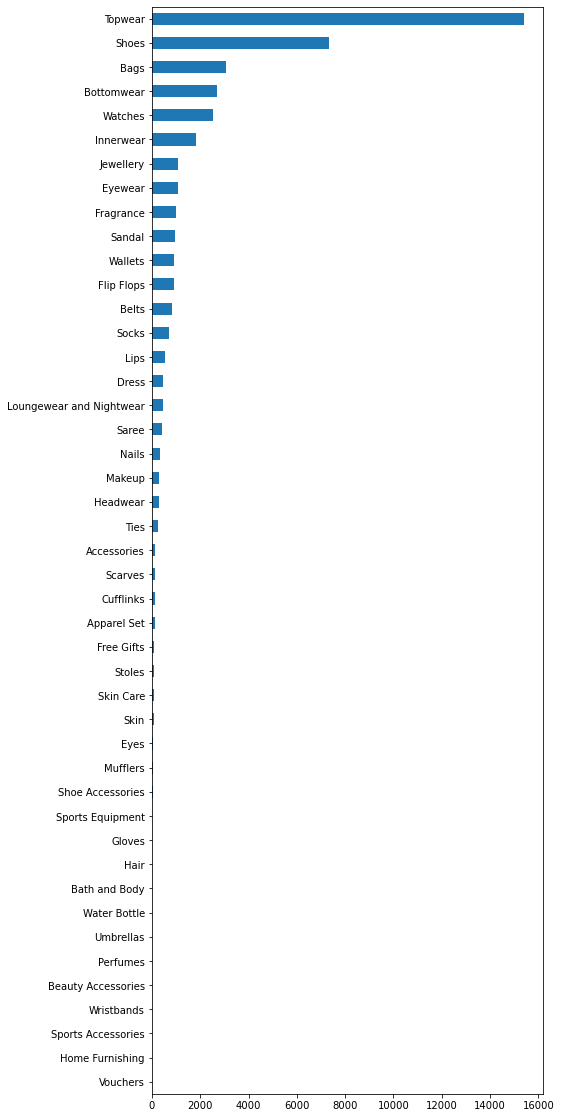

In [26]:
plt.figure(figsize=(7,20))
df.subCategory.value_counts().sort_values().plot(kind='barh')

In [8]:
df.subCategory.value_counts()

Topwear                     15402
Shoes                        7343
Bags                         3055
Bottomwear                   2694
Watches                      2542
Innerwear                    1808
Jewellery                    1079
Eyewear                      1073
Fragrance                    1011
Sandal                        963
Wallets                       933
Flip Flops                    913
Belts                         811
Socks                         698
Lips                          527
Dress                         478
Loungewear and Nightwear      470
Saree                         427
Nails                         329
Makeup                        307
Headwear                      293
Ties                          258
Accessories                   129
Scarves                       118
Cufflinks                     108
Apparel Set                   106
Free Gifts                    104
Stoles                         90
Skin Care                      77
Skin          

# 데이터 category 재분류

In [9]:
df.loc[df.subCategory=="Gloves","subCategory"] = "others"
#df.loc[(df['subCategory'] == 'Flip Flops'),'subCategory'] = 'Shoes'


In [10]:
df.loc[df.subCategory=="Watches","subCategory"] = "others"
#df.loc[(df['subCategory'] == 'Flip Flops'),'subCategory'] = 'Shoes'

In [11]:
df.loc[df.subCategory=="Bags","subCategory"] = "others"
#df.loc[(df['subCategory'] == 'Flip Flops'),'subCategory'] = 'Shoes'

In [12]:
df.loc[df.subCategory=="Bottomwear","subCategory"] = "others"
#df.loc[(df['subCategory'] == 'Flip Flops'),'subCategory'] = 'Shoes'

In [13]:
df.loc[df.subCategory=="Innerwear","subCategory"] = "others"
#df.loc[(df['subCategory'] == 'Flip Flops'),'subCategory'] = 'Shoes'

In [14]:
df.loc[df.subCategory=="Jewellery","subCategory"] = "others"
#df.loc[(df['subCategory'] == 'Flip Flops'),'subCategory'] = 'Shoes'

In [15]:
df.loc[df.subCategory=="Fragrance","subCategory"] = "others"
#df.loc[(df['subCategory'] == 'Flip Flops'),'subCategory'] = 'Shoes'

In [17]:
df.loc[df.subCategory=="Sandal","subCategory"] = "Shoes"
#df.loc[(df['subCategory'] == 'Flip Flops'),'subCategory'] = 'Shoes'

In [18]:
df.loc[df.subCategory=="Wallets","subCategory"] = "others"
#df.loc[(df['subCategory'] == 'Flip Flops'),'subCategory'] = 'Shoes'

In [19]:
df.loc[df.subCategory=="Flip Flops","subCategory"] = "Shoes"

In [20]:
df.loc[df.subCategory=="Eyewear","subCategory"] = "others"

In [21]:
df.loc[df.subCategory=="Belts","subCategory"] = "others"

In [22]:
#Lips
df.loc[df.subCategory=="Lips","subCategory"] = "others"

In [23]:
#Lips
df.loc[df.subCategory=="Socks","subCategory"] = "others"

In [24]:
#Lips
df.loc[df.subCategory=="Dress","subCategory"] = "others"

In [25]:
df.loc[df.subCategory=="Saree","subCategory"] = "others"

In [26]:
df.loc[df.subCategory=="Loungewear and Nightwear","subCategory"] = "others"

In [27]:
df.loc[df.subCategory=="Headwear","subCategory"] = "others"

In [28]:
df.loc[df.subCategory=="Ties","subCategory"] = "others"

In [29]:
df.loc[df.subCategory=="Makeup","subCategory"] = "others"

In [30]:
df.loc[df.subCategory=="Nails","subCategory"] = "others"

In [31]:
df.loc[df.subCategory=="Apparel Set","subCategory"] = "others"

In [32]:
df.loc[df.subCategory=="Accessories","subCategory"] = "others"

In [33]:
df.loc[df.subCategory=="Nails","subCategory"] = "others"

In [34]:
df.loc[df.subCategory=="Skin","subCategory"] = "others"

In [35]:
df.loc[df.subCategory=="Free Gifts","subCategory"] = "others"

In [36]:
df.loc[df.subCategory=="Scarves","subCategory"] = "others"

In [37]:
df.loc[df.subCategory=="Skin Care","subCategory"] = "others"

In [38]:
df.loc[df.subCategory=="Mufflers","subCategory"] = "others"

In [39]:
df.loc[df.subCategory=="Shoe Accessories","subCategory"] = "others"

In [40]:
df.loc[df.subCategory=="Eyes","subCategory"] = "others"

In [41]:
df.loc[df.subCategory=="Sports Accessories","subCategory"] = "others"

In [42]:
df.loc[df.subCategory=="Beauty Accessories","subCategory"] = "others"

In [43]:
df.loc[df.subCategory=="Water Bottle","subCategory"] = "others"

In [44]:
df.loc[df.subCategory=="Bath and Body","subCategory"] = "others"

In [48]:
df.loc[df.subCategory=="Stoles","subCategory"] = "others"

In [50]:
df.loc[df.subCategory=="Sports Equipment","subCategory"] = "others"

In [52]:
df.loc[df.subCategory=="Hair","subCategory"] = "others"

In [ ]:
df.loc[df.subCategory=="Perfumes","subCategory"] = "others"

In [54]:
df.loc[df.subCategory=="Umbrellas","subCategory"] = "others"

In [56]:
df.loc[df.subCategory=="Vouchers","subCategory"] = "others"

In [58]:
df.loc[df.subCategory=="Perfumes","subCategory"] = "others"

In [60]:
df.loc[df.subCategory=="Wristbands","subCategory"] = "others"
df.loc[df.subCategory=="Home Furnishing","subCategory"] = "others"

In [35]:
df.subCategory.unique()

array(['Topwear', 'Bottomwear', 'Watches', 'Socks', 'Shoes', 'Belts',
       'Flip Flops', 'Bags', 'Innerwear', 'Sandal', 'Shoe Accessories',
       'Fragrance', 'Jewellery', 'Lips', 'Saree', 'Eyewear', 'Nails',
       'Scarves', 'Dress', 'Loungewear and Nightwear', 'Wallets',
       'Apparel Set', 'Headwear', 'Mufflers', 'Skin Care', 'Makeup',
       'Free Gifts', 'Ties', 'Accessories', 'Skin', 'Beauty Accessories',
       'Water Bottle', 'Eyes', 'Bath and Body', 'Gloves',
       'Sports Accessories', 'Cufflinks', 'Sports Equipment', 'Stoles',
       'Hair', 'Perfumes', 'Home Furnishing', 'Umbrellas', 'Wristbands',
       'Vouchers'], dtype=object)

# Topwears, Shoes 제외한 데이터 전처리

In [44]:
#list_op = ['Innerwear', 'Sandal', 'Shoe Accessories',
#       'Fragrance', 'Jewellery', 'Lips', 'Saree', 'Eyewear', 'Nails',
#       'Scarves', 'Dress', 'Loungewear and Nightwear', 'Wallets',
#       'Apparel Set', 'Headwear', 'Mufflers', 'Skin Care', 'Makeup',
#       'Free Gifts', 'Ties', 'Accessories', 'Skin', 'Beauty Accessories',
#       'Water Bottle', 'Eyes', 'Bath and Body', 'Gloves',
#       'Sports Accessories', 'Cufflinks', 'Sports Equipment', 'Stoles',
#       'Hair', 'Perfumes', 'Home Furnishing', 'Umbrellas', 'Wristbands',
#       'Vouchers']
#list_op = ['Bottomwear','Watches','Socks','Belts']
list_op = ['Flip Flops']
for i in range(len(list_op)):
    df_drop = subset_df['subCategory'] != list_op[i]
    subset_df = subset_df[df_drop]


In [46]:
subset_df.subCategory.value_counts()

Topwear    15402
Shoes       7343
Name: subCategory, dtype: int64

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg
...,...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,17036.jpg
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,6461.jpg
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,18842.jpg
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume,46694.jpg


In [28]:
pd.DataFrame(df_drop).subCategory.value_counts()

True     41369
False     3055
Name: subCategory, dtype: int64

In [58]:
len(subset_df)

22745

# styles.csv에 있지 않은 파일 삭제

In [59]:
idx = subset_df[subset_df["image"]=="10000.jpg"].index
df_2 = subset_df.drop(idx)

In [60]:
idx = df_2[df_2["image"]=="10001.jpg"].index
df_2 = df_2.drop(idx)

In [61]:
idx = df_2[df_2["image"]=="39401.jpg"].index
df_2 = df_2.drop(idx)

In [62]:
idx = df_2[df_2["image"]=="39425.jpg"].index
df_2 = df_2.drop(idx)

In [63]:
#39403
idx = df_2[df_2["image"]=="39403.jpg"].index
df_2 = df_2.drop(idx)

In [64]:
#12347
idx = df_2[df_2["image"]=="12347.jpg"].index
df_2 = df_2.drop(idx)

In [65]:
#39410
idx = df_2[df_2["image"]=="39410.jpg"].index
df_2 = df_2.drop(idx)

# Train set, Test set 분류

In [86]:
from sklearn.model_selection import train_test_split


X = df_2.drop(["subCategory"],axis=1)
y = df_2["subCategory"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

y_train.head()

5856       Shoes
20691    Topwear
10699    Topwear
43987    Topwear
57       Topwear
Name: subCategory, dtype: object

# 뒤섞인 데이터 인덱스 초기화

In [87]:
X_train = X_train.reset_index(drop=True)
X_train

,id,gender,masterCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,45382,Women,Footwear,Flats,Black,Winter,2012.0,Casual,Rocia Women Black Sandals,45382.jpg
1,9875,Men,Apparel,Shirts,Purple,Fall,2011.0,Casual,Indigo Nation Men Price catch Purple Shirts,9875.jpg
2,7811,Men,Apparel,Tshirts,Navy Blue,Fall,2011.0,Casual,Proline Men Navy Polo T-shirt,7811.jpg
3,43543,Men,Apparel,Shirts,Lavender,Summer,2012.0,Casual,Scullers Men Checked Lavender Shirt,43543.jpg
4,4943,Men,Apparel,Shirts,White,Summer,2011.0,Casual,Gini and Jony Boy's Kaleb White Brown Kidswear,4943.jpg
...,...,...,...,...,...,...,...,...,...,...
18187,49640,Women,Apparel,Tops,Turquoise Blue,Summer,2012.0,Casual,Mineral Women Turquoise Blue Top,49640.jpg
18188,42517,Women,Apparel,Kurtas,Green,Summer,2012.0,Ethnic,Mother Earth Women Green Kurta,42517.jpg
18189,40656,Women,Apparel,Kurtas,Magenta,Summer,2012.0,Ethnic,Span Women Magenta Kurta,40656.jpg
18190,19588,Women,Apparel,Tops,White,Summer,2011.0,Casual,United Colors of Benetton Women Printed White Top,19588.jpg


In [89]:
y_train = y_train.reset_index(drop=True)
y_train
print(len(y_test))

4549


# image와 라벨 데이터 배열에 추가

In [90]:
def get_images(directory):
    Images = []
    Labels = []  
    label = 0
            
    for labels in y_test:
        if labels == 'Topwear':
            label = 0
        #elif labels == 'others':
            #label = 1
        elif labels == 'Shoes':
            label = 2
            
        Labels.append(label)
    
    print("append label!")
    i=0
    for image_file in X_test["image"]: 
        image = cv2.imread(directory+image_file)
        print(directory+image_file)
        print(image.shape)
        print(image_file)
        i = i+1
        print(i)
        image = cv2.resize(image,(60,80)) 
        Images.append(image)
        
    
    return shuffle(Images,Labels,random_state=817328462) 

def get_classlabel(class_code):
    labels = {2:'Shoes', 0:'Topwear'}
    
    return labels[class_code]


In [73]:
Images, Labels = get_images('./archive/images/')

append label!
./archive/images/45382.jpg
(80, 60, 3)
45382.jpg
1
./archive/images/9875.jpg
(80, 60, 3)
9875.jpg
2
./archive/images/7811.jpg
(80, 60, 3)
7811.jpg
3
./archive/images/43543.jpg
(80, 60, 3)
43543.jpg
4
./archive/images/4943.jpg
(80, 60, 3)
4943.jpg
5
./archive/images/8811.jpg
(80, 60, 3)
8811.jpg
6
./archive/images/52070.jpg
(80, 60, 3)
52070.jpg
7
./archive/images/27595.jpg
(80, 60, 3)
27595.jpg
8
./archive/images/13403.jpg
(80, 60, 3)
13403.jpg
9
./archive/images/57832.jpg
(80, 60, 3)
57832.jpg
10
./archive/images/12346.jpg
(80, 60, 3)
12346.jpg
11
./archive/images/38659.jpg
(80, 60, 3)
38659.jpg
12
./archive/images/12059.jpg
(80, 60, 3)
12059.jpg
13
./archive/images/20134.jpg
(80, 60, 3)
20134.jpg
14
./archive/images/9289.jpg
(80, 60, 3)
9289.jpg
15
./archive/images/18985.jpg
(80, 60, 3)
18985.jpg
16
./archive/images/31463.jpg
(80, 60, 3)
31463.jpg
17
./archive/images/9671.jpg
(80, 60, 3)
9671.jpg
18
./archive/images/7863.jpg
(80, 60, 3)
7863.jpg
19
./archive/images/5407

./archive/images/37941.jpg
(80, 60, 3)
37941.jpg
195
./archive/images/18280.jpg
(80, 60, 3)
18280.jpg
196
./archive/images/23941.jpg
(80, 60, 3)
23941.jpg
197
./archive/images/19751.jpg
(80, 60, 3)
19751.jpg
198
./archive/images/5797.jpg
(80, 60, 3)
5797.jpg
199
./archive/images/3964.jpg
(80, 60, 3)
3964.jpg
200
./archive/images/3865.jpg
(80, 60, 3)
3865.jpg
201
./archive/images/12234.jpg
(80, 60, 3)
12234.jpg
202
./archive/images/24368.jpg
(80, 60, 3)
24368.jpg
203
./archive/images/39002.jpg
(80, 60, 3)
39002.jpg
204
./archive/images/13761.jpg
(80, 60, 3)
13761.jpg
205
./archive/images/17898.jpg
(80, 60, 3)
17898.jpg
206
./archive/images/24538.jpg
(80, 60, 3)
24538.jpg
207
./archive/images/33944.jpg
(80, 60, 3)
33944.jpg
208
./archive/images/16137.jpg
(80, 60, 3)
16137.jpg
209
./archive/images/53149.jpg
(80, 60, 3)
53149.jpg
210
./archive/images/19391.jpg
(80, 60, 3)
19391.jpg
211
./archive/images/34068.jpg
(80, 60, 3)
34068.jpg
212
./archive/images/2266.jpg
(80, 60, 3)
2266.jpg
213
.

./archive/images/39627.jpg
(80, 60, 3)
39627.jpg
386
./archive/images/38791.jpg
(80, 60, 3)
38791.jpg
387
./archive/images/29241.jpg
(80, 60, 3)
29241.jpg
388
./archive/images/6547.jpg
(80, 60, 3)
6547.jpg
389
./archive/images/58731.jpg
(80, 60, 3)
58731.jpg
390
./archive/images/12460.jpg
(80, 60, 3)
12460.jpg
391
./archive/images/1579.jpg
(80, 60, 3)
1579.jpg
392
./archive/images/33549.jpg
(80, 60, 3)
33549.jpg
393
./archive/images/39473.jpg
(80, 60, 3)
39473.jpg
394
./archive/images/15268.jpg
(80, 60, 3)
15268.jpg
395
./archive/images/43578.jpg
(80, 60, 3)
43578.jpg
396
./archive/images/4276.jpg
(80, 60, 3)
4276.jpg
397
./archive/images/35048.jpg
(80, 60, 3)
35048.jpg
398
./archive/images/11386.jpg
(80, 60, 3)
11386.jpg
399
./archive/images/44854.jpg
(80, 60, 3)
44854.jpg
400
./archive/images/39252.jpg
(80, 60, 3)
39252.jpg
401
./archive/images/37775.jpg
(80, 60, 3)
37775.jpg
402
./archive/images/11447.jpg
(80, 60, 3)
11447.jpg
403
./archive/images/15627.jpg
(80, 60, 3)
15627.jpg
404

(80, 60, 3)
6434.jpg
589
./archive/images/46411.jpg
(80, 60, 3)
46411.jpg
590
./archive/images/8364.jpg
(80, 60, 3)
8364.jpg
591
./archive/images/26090.jpg
(80, 60, 3)
26090.jpg
592
./archive/images/53867.jpg
(80, 60, 3)
53867.jpg
593
./archive/images/3524.jpg
(80, 60, 3)
3524.jpg
594
./archive/images/8529.jpg
(80, 60, 3)
8529.jpg
595
./archive/images/27155.jpg
(80, 60, 3)
27155.jpg
596
./archive/images/6589.jpg
(80, 60, 3)
6589.jpg
597
./archive/images/48438.jpg
(80, 60, 3)
48438.jpg
598
./archive/images/29051.jpg
(80, 60, 3)
29051.jpg
599
./archive/images/32211.jpg
(80, 60, 3)
32211.jpg
600
./archive/images/43661.jpg
(80, 60, 3)
43661.jpg
601
./archive/images/16338.jpg
(80, 60, 3)
16338.jpg
602
./archive/images/34040.jpg
(80, 60, 3)
34040.jpg
603
./archive/images/54553.jpg
(80, 60, 3)
54553.jpg
604
./archive/images/15031.jpg
(80, 60, 3)
15031.jpg
605
./archive/images/22752.jpg
(80, 60, 3)
22752.jpg
606
./archive/images/39802.jpg
(80, 60, 3)
39802.jpg
607
./archive/images/59441.jpg
(8

./archive/images/34907.jpg
(80, 60, 3)
34907.jpg
752
./archive/images/33841.jpg
(80, 60, 3)
33841.jpg
753
./archive/images/5491.jpg
(80, 60, 3)
5491.jpg
754
./archive/images/4014.jpg
(80, 60, 3)
4014.jpg
755
./archive/images/2331.jpg
(80, 60, 3)
2331.jpg
756
./archive/images/11013.jpg
(80, 60, 3)
11013.jpg
757
./archive/images/2274.jpg
(80, 60, 3)
2274.jpg
758
./archive/images/13729.jpg
(80, 60, 3)
13729.jpg
759
./archive/images/54080.jpg
(80, 60, 3)
54080.jpg
760
./archive/images/51870.jpg
(80, 60, 3)
51870.jpg
761
./archive/images/45414.jpg
(80, 60, 3)
45414.jpg
762
./archive/images/3563.jpg
(80, 60, 3)
3563.jpg
763
./archive/images/27567.jpg
(80, 60, 3)
27567.jpg
764
./archive/images/10045.jpg
(80, 60, 3)
10045.jpg
765
./archive/images/24606.jpg
(80, 60, 3)
24606.jpg
766
./archive/images/38400.jpg
(80, 60, 3)
38400.jpg
767
./archive/images/36563.jpg
(80, 60, 3)
36563.jpg
768
./archive/images/8853.jpg
(80, 60, 3)
8853.jpg
769
./archive/images/47235.jpg
(80, 60, 3)
47235.jpg
770
./arc

./archive/images/10062.jpg
(80, 60, 3)
10062.jpg
955
./archive/images/24169.jpg
(80, 60, 3)
24169.jpg
956
./archive/images/12545.jpg
(80, 60, 3)
12545.jpg
957
./archive/images/26931.jpg
(80, 60, 3)
26931.jpg
958
./archive/images/7699.jpg
(80, 60, 3)
7699.jpg
959
./archive/images/14648.jpg
(80, 60, 3)
14648.jpg
960
./archive/images/9253.jpg
(80, 60, 3)
9253.jpg
961
./archive/images/32196.jpg
(80, 60, 3)
32196.jpg
962
./archive/images/38798.jpg
(80, 60, 3)
38798.jpg
963
./archive/images/58569.jpg
(80, 60, 3)
58569.jpg
964
./archive/images/33337.jpg
(80, 60, 3)
33337.jpg
965
./archive/images/24071.jpg
(80, 60, 3)
24071.jpg
966
./archive/images/6998.jpg
(80, 60, 3)
6998.jpg
967
./archive/images/48517.jpg
(80, 60, 3)
48517.jpg
968
./archive/images/37265.jpg
(80, 60, 3)
37265.jpg
969
./archive/images/4256.jpg
(80, 60, 3)
4256.jpg
970
./archive/images/13813.jpg
(80, 60, 3)
13813.jpg
971
./archive/images/22404.jpg
(80, 60, 3)
22404.jpg
972
./archive/images/7316.jpg
(80, 60, 3)
7316.jpg
973
./a

./archive/images/4068.jpg
(80, 60, 3)
4068.jpg
1145
./archive/images/7277.jpg
(80, 60, 3)
7277.jpg
1146
./archive/images/5673.jpg
(80, 60, 3)
5673.jpg
1147
./archive/images/45380.jpg
(80, 60, 3)
45380.jpg
1148
./archive/images/41743.jpg
(80, 60, 3)
41743.jpg
1149
./archive/images/23505.jpg
(80, 60, 3)
23505.jpg
1150
./archive/images/43457.jpg
(80, 60, 3)
43457.jpg
1151
./archive/images/43037.jpg
(80, 60, 3)
43037.jpg
1152
./archive/images/12631.jpg
(80, 60, 3)
12631.jpg
1153
./archive/images/28749.jpg
(80, 60, 3)
28749.jpg
1154
./archive/images/34943.jpg
(80, 60, 3)
34943.jpg
1155
./archive/images/17715.jpg
(80, 60, 3)
17715.jpg
1156
./archive/images/23134.jpg
(80, 60, 3)
23134.jpg
1157
./archive/images/27364.jpg
(80, 60, 3)
27364.jpg
1158
./archive/images/7528.jpg
(80, 60, 3)
7528.jpg
1159
./archive/images/16395.jpg
(80, 60, 3)
16395.jpg
1160
./archive/images/14650.jpg
(80, 60, 3)
14650.jpg
1161
./archive/images/13048.jpg
(80, 60, 3)
13048.jpg
1162
./archive/images/56986.jpg
(80, 60, 

./archive/images/7148.jpg
(80, 60, 3)
7148.jpg
1317
./archive/images/43221.jpg
(80, 60, 3)
43221.jpg
1318
./archive/images/12893.jpg
(80, 60, 3)
12893.jpg
1319
./archive/images/24523.jpg
(80, 60, 3)
24523.jpg
1320
./archive/images/23885.jpg
(80, 60, 3)
23885.jpg
1321
./archive/images/55652.jpg
(80, 60, 3)
55652.jpg
1322
./archive/images/25924.jpg
(80, 60, 3)
25924.jpg
1323
./archive/images/42535.jpg
(80, 60, 3)
42535.jpg
1324
./archive/images/22306.jpg
(80, 60, 3)
22306.jpg
1325
./archive/images/24024.jpg
(80, 60, 3)
24024.jpg
1326
./archive/images/28847.jpg
(80, 60, 3)
28847.jpg
1327
./archive/images/46253.jpg
(80, 60, 3)
46253.jpg
1328
./archive/images/37156.jpg
(80, 60, 3)
37156.jpg
1329
./archive/images/44649.jpg
(80, 60, 3)
44649.jpg
1330
./archive/images/4121.jpg
(80, 60, 3)
4121.jpg
1331
./archive/images/39339.jpg
(80, 60, 3)
39339.jpg
1332
./archive/images/11758.jpg
(80, 60, 3)
11758.jpg
1333
./archive/images/42992.jpg
(80, 60, 3)
42992.jpg
1334
./archive/images/2846.jpg
(80, 6

./archive/images/17609.jpg
(80, 60, 3)
17609.jpg
1476
./archive/images/21164.jpg
(80, 60, 3)
21164.jpg
1477
./archive/images/8808.jpg
(80, 60, 3)
8808.jpg
1478
./archive/images/7164.jpg
(80, 60, 3)
7164.jpg
1479
./archive/images/4161.jpg
(80, 60, 3)
4161.jpg
1480
./archive/images/50336.jpg
(80, 60, 3)
50336.jpg
1481
./archive/images/52127.jpg
(80, 60, 3)
52127.jpg
1482
./archive/images/13398.jpg
(80, 60, 3)
13398.jpg
1483
./archive/images/7499.jpg
(80, 60, 3)
7499.jpg
1484
./archive/images/43534.jpg
(80, 60, 3)
43534.jpg
1485
./archive/images/2034.jpg
(80, 60, 3)
2034.jpg
1486
./archive/images/4438.jpg
(80, 60, 3)
4438.jpg
1487
./archive/images/17021.jpg
(80, 60, 3)
17021.jpg
1488
./archive/images/7451.jpg
(80, 60, 3)
7451.jpg
1489
./archive/images/59673.jpg
(80, 60, 3)
59673.jpg
1490
./archive/images/2147.jpg
(80, 60, 3)
2147.jpg
1491
./archive/images/30738.jpg
(80, 60, 3)
30738.jpg
1492
./archive/images/42091.jpg
(80, 60, 3)
42091.jpg
1493
./archive/images/20253.jpg
(80, 60, 3)
20253

./archive/images/2376.jpg
(80, 60, 3)
2376.jpg
1650
./archive/images/5210.jpg
(80, 60, 3)
5210.jpg
1651
./archive/images/43505.jpg
(80, 60, 3)
43505.jpg
1652
./archive/images/29088.jpg
(80, 60, 3)
29088.jpg
1653
./archive/images/40589.jpg
(80, 60, 3)
40589.jpg
1654
./archive/images/26704.jpg
(80, 60, 3)
26704.jpg
1655
./archive/images/11800.jpg
(80, 60, 3)
11800.jpg
1656
./archive/images/14766.jpg
(80, 60, 3)
14766.jpg
1657
./archive/images/26642.jpg
(80, 60, 3)
26642.jpg
1658
./archive/images/2322.jpg
(80, 60, 3)
2322.jpg
1659
./archive/images/22763.jpg
(80, 60, 3)
22763.jpg
1660
./archive/images/42147.jpg
(80, 60, 3)
42147.jpg
1661
./archive/images/11464.jpg
(80, 60, 3)
11464.jpg
1662
./archive/images/5845.jpg
(80, 60, 3)
5845.jpg
1663
./archive/images/41999.jpg
(80, 60, 3)
41999.jpg
1664
./archive/images/7290.jpg
(80, 60, 3)
7290.jpg
1665
./archive/images/2607.jpg
(80, 60, 3)
2607.jpg
1666
./archive/images/24836.jpg
(80, 60, 3)
24836.jpg
1667
./archive/images/3055.jpg
(80, 60, 3)
30

./archive/images/12701.jpg
(80, 60, 3)
12701.jpg
1842
./archive/images/13675.jpg
(80, 60, 3)
13675.jpg
1843
./archive/images/26812.jpg
(80, 60, 3)
26812.jpg
1844
./archive/images/26309.jpg
(80, 60, 3)
26309.jpg
1845
./archive/images/21225.jpg
(80, 60, 3)
21225.jpg
1846
./archive/images/26539.jpg
(80, 60, 3)
26539.jpg
1847
./archive/images/35421.jpg
(80, 60, 3)
35421.jpg
1848
./archive/images/30937.jpg
(80, 60, 3)
30937.jpg
1849
./archive/images/45398.jpg
(80, 60, 3)
45398.jpg
1850
./archive/images/2180.jpg
(80, 60, 3)
2180.jpg
1851
./archive/images/16986.jpg
(80, 60, 3)
16986.jpg
1852
./archive/images/7629.jpg
(80, 60, 3)
7629.jpg
1853
./archive/images/38961.jpg
(80, 60, 3)
38961.jpg
1854
./archive/images/32424.jpg
(80, 60, 3)
32424.jpg
1855
./archive/images/15145.jpg
(80, 60, 3)
15145.jpg
1856
./archive/images/6064.jpg
(80, 60, 3)
6064.jpg
1857
./archive/images/29668.jpg
(80, 60, 3)
29668.jpg
1858
./archive/images/18849.jpg
(80, 60, 3)
18849.jpg
1859
./archive/images/53120.jpg
(80, 60

./archive/images/22829.jpg
(80, 60, 3)
22829.jpg
2024
./archive/images/25920.jpg
(80, 60, 3)
25920.jpg
2025
./archive/images/13884.jpg
(80, 60, 3)
13884.jpg
2026
./archive/images/27580.jpg
(80, 60, 3)
27580.jpg
2027
./archive/images/17813.jpg
(80, 60, 3)
17813.jpg
2028
./archive/images/4301.jpg
(80, 60, 3)
4301.jpg
2029
./archive/images/24524.jpg
(80, 60, 3)
24524.jpg
2030
./archive/images/34944.jpg
(80, 60, 3)
34944.jpg
2031
./archive/images/52109.jpg
(80, 60, 3)
52109.jpg
2032
./archive/images/4945.jpg
(80, 60, 3)
4945.jpg
2033
./archive/images/22757.jpg
(80, 60, 3)
22757.jpg
2034
./archive/images/5921.jpg
(80, 60, 3)
5921.jpg
2035
./archive/images/11981.jpg
(80, 60, 3)
11981.jpg
2036
./archive/images/3307.jpg
(80, 60, 3)
3307.jpg
2037
./archive/images/14315.jpg
(80, 60, 3)
14315.jpg
2038
./archive/images/3956.jpg
(80, 60, 3)
3956.jpg
2039
./archive/images/13294.jpg
(80, 60, 3)
13294.jpg
2040
./archive/images/18317.jpg
(80, 60, 3)
18317.jpg
2041
./archive/images/11537.jpg
(80, 60, 3)

./archive/images/46611.jpg
(80, 60, 3)
46611.jpg
2213
./archive/images/9151.jpg
(80, 60, 3)
9151.jpg
2214
./archive/images/22484.jpg
(80, 60, 3)
22484.jpg
2215
./archive/images/24513.jpg
(80, 60, 3)
24513.jpg
2216
./archive/images/23917.jpg
(80, 60, 3)
23917.jpg
2217
./archive/images/24242.jpg
(80, 60, 3)
24242.jpg
2218
./archive/images/17978.jpg
(80, 60, 3)
17978.jpg
2219
./archive/images/13563.jpg
(80, 60, 3)
13563.jpg
2220
./archive/images/21886.jpg
(80, 60, 3)
21886.jpg
2221
./archive/images/14569.jpg
(80, 60, 3)
14569.jpg
2222
./archive/images/6768.jpg
(80, 60, 3)
6768.jpg
2223
./archive/images/26228.jpg
(80, 60, 3)
26228.jpg
2224
./archive/images/17848.jpg
(80, 60, 3)
17848.jpg
2225
./archive/images/32223.jpg
(80, 60, 3)
32223.jpg
2226
./archive/images/9115.jpg
(80, 60, 3)
9115.jpg
2227
./archive/images/34636.jpg
(80, 60, 3)
34636.jpg
2228
./archive/images/1636.jpg
(80, 60, 3)
1636.jpg
2229
./archive/images/43047.jpg
(80, 60, 3)
43047.jpg
2230
./archive/images/42740.jpg
(80, 60, 

./archive/images/46275.jpg
(80, 60, 3)
46275.jpg
2394
./archive/images/31371.jpg
(80, 60, 3)
31371.jpg
2395
./archive/images/46113.jpg
(80, 60, 3)
46113.jpg
2396
./archive/images/3207.jpg
(80, 60, 3)
3207.jpg
2397
./archive/images/22334.jpg
(80, 60, 3)
22334.jpg
2398
./archive/images/1917.jpg
(80, 60, 3)
1917.jpg
2399
./archive/images/8419.jpg
(80, 60, 3)
8419.jpg
2400
./archive/images/14068.jpg
(80, 60, 3)
14068.jpg
2401
./archive/images/2489.jpg
(80, 60, 3)
2489.jpg
2402
./archive/images/54926.jpg
(80, 60, 3)
54926.jpg
2403
./archive/images/19147.jpg
(80, 60, 3)
19147.jpg
2404
./archive/images/52153.jpg
(80, 60, 3)
52153.jpg
2405
./archive/images/43232.jpg
(80, 60, 3)
43232.jpg
2406
./archive/images/40075.jpg
(80, 60, 3)
40075.jpg
2407
./archive/images/30753.jpg
(80, 60, 3)
30753.jpg
2408
./archive/images/37947.jpg
(80, 60, 3)
37947.jpg
2409
./archive/images/10829.jpg
(80, 60, 3)
10829.jpg
2410
./archive/images/22341.jpg
(80, 60, 3)
22341.jpg
2411
./archive/images/39254.jpg
(80, 60, 

./archive/images/6155.jpg
(80, 60, 3)
6155.jpg
2557
./archive/images/34385.jpg
(80, 60, 3)
34385.jpg
2558
./archive/images/12880.jpg
(80, 60, 3)
12880.jpg
2559
./archive/images/3934.jpg
(80, 60, 3)
3934.jpg
2560
./archive/images/53823.jpg
(80, 60, 3)
53823.jpg
2561
./archive/images/19426.jpg
(80, 60, 3)
19426.jpg
2562
./archive/images/47039.jpg
(80, 60, 3)
47039.jpg
2563
./archive/images/25420.jpg
(80, 60, 3)
25420.jpg
2564
./archive/images/38397.jpg
(80, 60, 3)
38397.jpg
2565
./archive/images/4523.jpg
(80, 60, 3)
4523.jpg
2566
./archive/images/39290.jpg
(80, 60, 3)
39290.jpg
2567
./archive/images/12841.jpg
(80, 60, 3)
12841.jpg
2568
./archive/images/3761.jpg
(80, 60, 3)
3761.jpg
2569
./archive/images/44864.jpg
(80, 60, 3)
44864.jpg
2570
./archive/images/10128.jpg
(80, 60, 3)
10128.jpg
2571
./archive/images/19772.jpg
(80, 60, 3)
19772.jpg
2572
./archive/images/54699.jpg
(80, 60, 3)
54699.jpg
2573
./archive/images/6677.jpg
(80, 60, 3)
6677.jpg
2574
./archive/images/10499.jpg
(80, 60, 3)

29184.jpg
2744
./archive/images/34089.jpg
(80, 60, 3)
34089.jpg
2745
./archive/images/23310.jpg
(80, 60, 3)
23310.jpg
2746
./archive/images/49375.jpg
(80, 60, 3)
49375.jpg
2747
./archive/images/7933.jpg
(80, 60, 3)
7933.jpg
2748
./archive/images/32841.jpg
(80, 60, 3)
32841.jpg
2749
./archive/images/12730.jpg
(80, 60, 3)
12730.jpg
2750
./archive/images/20214.jpg
(80, 60, 3)
20214.jpg
2751
./archive/images/44943.jpg
(80, 60, 3)
44943.jpg
2752
./archive/images/5975.jpg
(80, 60, 3)
5975.jpg
2753
./archive/images/11091.jpg
(80, 60, 3)
11091.jpg
2754
./archive/images/29605.jpg
(80, 60, 3)
29605.jpg
2755
./archive/images/13456.jpg
(80, 60, 3)
13456.jpg
2756
./archive/images/33536.jpg
(80, 60, 3)
33536.jpg
2757
./archive/images/45385.jpg
(80, 60, 3)
45385.jpg
2758
./archive/images/9757.jpg
(80, 60, 3)
9757.jpg
2759
./archive/images/12892.jpg
(80, 60, 3)
12892.jpg
2760
./archive/images/6229.jpg
(80, 60, 3)
6229.jpg
2761
./archive/images/12426.jpg
(80, 60, 3)
12426.jpg
2762
./archive/images/7396

./archive/images/58004.jpg
(80, 60, 3)
58004.jpg
2934
./archive/images/30324.jpg
(80, 60, 3)
30324.jpg
2935
./archive/images/2677.jpg
(80, 60, 3)
2677.jpg
2936
./archive/images/35999.jpg
(80, 60, 3)
35999.jpg
2937
./archive/images/43929.jpg
(80, 60, 3)
43929.jpg
2938
./archive/images/13483.jpg
(80, 60, 3)
13483.jpg
2939
./archive/images/54537.jpg
(80, 60, 3)
54537.jpg
2940
./archive/images/54200.jpg
(80, 60, 3)
54200.jpg
2941
./archive/images/50158.jpg
(80, 60, 3)
50158.jpg
2942
./archive/images/10048.jpg
(80, 60, 3)
10048.jpg
2943
./archive/images/22020.jpg
(80, 60, 3)
22020.jpg
2944
./archive/images/46335.jpg
(80, 60, 3)
46335.jpg
2945
./archive/images/36133.jpg
(80, 60, 3)
36133.jpg
2946
./archive/images/5787.jpg
(80, 60, 3)
5787.jpg
2947
./archive/images/44670.jpg
(80, 60, 3)
44670.jpg
2948
./archive/images/16812.jpg
(80, 60, 3)
16812.jpg
2949
./archive/images/45752.jpg
(80, 60, 3)
45752.jpg
2950
./archive/images/39607.jpg
(80, 60, 3)
39607.jpg
2951
./archive/images/13771.jpg
(80, 

./archive/images/7988.jpg
(80, 60, 3)
7988.jpg
3092
./archive/images/5883.jpg
(80, 60, 3)
5883.jpg
3093
./archive/images/23956.jpg
(80, 60, 3)
23956.jpg
3094
./archive/images/32918.jpg
(80, 60, 3)
32918.jpg
3095
./archive/images/11680.jpg
(80, 60, 3)
11680.jpg
3096
./archive/images/17801.jpg
(80, 60, 3)
17801.jpg
3097
./archive/images/20766.jpg
(80, 60, 3)
20766.jpg
3098
./archive/images/40437.jpg
(80, 60, 3)
40437.jpg
3099
./archive/images/7465.jpg
(80, 60, 3)
7465.jpg
3100
./archive/images/32811.jpg
(80, 60, 3)
32811.jpg
3101
./archive/images/9211.jpg
(80, 60, 3)
9211.jpg
3102
./archive/images/44672.jpg
(80, 60, 3)
44672.jpg
3103
./archive/images/57479.jpg
(80, 60, 3)
57479.jpg
3104
./archive/images/7296.jpg
(80, 60, 3)
7296.jpg
3105
./archive/images/13125.jpg
(80, 60, 3)
13125.jpg
3106
./archive/images/4749.jpg
(80, 60, 3)
4749.jpg
3107
./archive/images/54946.jpg
(80, 60, 3)
54946.jpg
3108
./archive/images/9055.jpg
(80, 60, 3)
9055.jpg
3109
./archive/images/6996.jpg
(80, 60, 3)
6996

./archive/images/27103.jpg
(80, 60, 3)
27103.jpg
3277
./archive/images/39159.jpg
(80, 60, 3)
39159.jpg
3278
./archive/images/5793.jpg
(80, 60, 3)
5793.jpg
3279
./archive/images/20158.jpg
(80, 60, 3)
20158.jpg
3280
./archive/images/16276.jpg
(80, 60, 3)
16276.jpg
3281
./archive/images/45405.jpg
(80, 60, 3)
45405.jpg
3282
./archive/images/34172.jpg
(80, 60, 3)
34172.jpg
3283
./archive/images/19620.jpg
(80, 60, 3)
19620.jpg
3284
./archive/images/20235.jpg
(80, 60, 3)
20235.jpg
3285
./archive/images/53159.jpg
(80, 60, 3)
53159.jpg
3286
./archive/images/10061.jpg
(80, 60, 3)
10061.jpg
3287
./archive/images/10345.jpg
(80, 60, 3)
10345.jpg
3288
./archive/images/34427.jpg
(80, 60, 3)
34427.jpg
3289
./archive/images/27892.jpg
(80, 60, 3)
27892.jpg
3290
./archive/images/40407.jpg
(80, 60, 3)
40407.jpg
3291
./archive/images/18245.jpg
(80, 60, 3)
18245.jpg
3292
./archive/images/2984.jpg
(80, 60, 3)
2984.jpg
3293
./archive/images/14915.jpg
(80, 60, 3)
14915.jpg
3294
./archive/images/16789.jpg
(80, 

./archive/images/26408.jpg
(80, 60, 3)
26408.jpg
3465
./archive/images/3723.jpg
(80, 60, 3)
3723.jpg
3466
./archive/images/13527.jpg
(80, 60, 3)
13527.jpg
3467
./archive/images/32415.jpg
(80, 60, 3)
32415.jpg
3468
./archive/images/4305.jpg
(80, 60, 3)
4305.jpg
3469
./archive/images/9207.jpg
(80, 60, 3)
9207.jpg
3470
./archive/images/3814.jpg
(80, 60, 3)
3814.jpg
3471
./archive/images/18931.jpg
(80, 60, 3)
18931.jpg
3472
./archive/images/22274.jpg
(80, 60, 3)
22274.jpg
3473
./archive/images/22624.jpg
(80, 60, 3)
22624.jpg
3474
./archive/images/5749.jpg
(80, 60, 3)
5749.jpg
3475
./archive/images/11020.jpg
(80, 60, 3)
11020.jpg
3476
./archive/images/54571.jpg
(80, 60, 3)
54571.jpg
3477
./archive/images/29320.jpg
(80, 60, 3)
29320.jpg
3478
./archive/images/43883.jpg
(80, 60, 3)
43883.jpg
3479
./archive/images/3254.jpg
(80, 60, 3)
3254.jpg
3480
./archive/images/34168.jpg
(80, 60, 3)
34168.jpg
3481
./archive/images/8073.jpg
(80, 60, 3)
8073.jpg
3482
./archive/images/26362.jpg
(80, 60, 3)
263

./archive/images/57154.jpg
(80, 60, 3)
57154.jpg
3661
./archive/images/22328.jpg
(80, 60, 3)
22328.jpg
3662
./archive/images/52080.jpg
(80, 60, 3)
52080.jpg
3663
./archive/images/26910.jpg
(80, 60, 3)
26910.jpg
3664
./archive/images/1880.jpg
(80, 60, 3)
1880.jpg
3665
./archive/images/34639.jpg
(80, 60, 3)
34639.jpg
3666
./archive/images/31211.jpg
(80, 60, 3)
31211.jpg
3667
./archive/images/19177.jpg
(80, 60, 3)
19177.jpg
3668
./archive/images/13750.jpg
(80, 60, 3)
13750.jpg
3669
./archive/images/13191.jpg
(80, 60, 3)
13191.jpg
3670
./archive/images/13863.jpg
(80, 60, 3)
13863.jpg
3671
./archive/images/13073.jpg
(80, 60, 3)
13073.jpg
3672
./archive/images/9470.jpg
(80, 60, 3)
9470.jpg
3673
./archive/images/28745.jpg
(80, 60, 3)
28745.jpg
3674
./archive/images/9127.jpg
(80, 60, 3)
9127.jpg
3675
./archive/images/12867.jpg
(80, 60, 3)
12867.jpg
3676
./archive/images/24284.jpg
(80, 60, 3)
24284.jpg
3677
./archive/images/30958.jpg
(80, 60, 3)
30958.jpg
3678
./archive/images/29289.jpg
(80, 60

(80, 60, 3)
6755.jpg
3848
./archive/images/12821.jpg
(80, 60, 3)
12821.jpg
3849
./archive/images/17285.jpg
(80, 60, 3)
17285.jpg
3850
./archive/images/5849.jpg
(80, 60, 3)
5849.jpg
3851
./archive/images/44473.jpg
(80, 60, 3)
44473.jpg
3852
./archive/images/27550.jpg
(80, 60, 3)
27550.jpg
3853
./archive/images/13379.jpg
(80, 60, 3)
13379.jpg
3854
./archive/images/34856.jpg
(80, 60, 3)
34856.jpg
3855
./archive/images/42108.jpg
(80, 60, 3)
42108.jpg
3856
./archive/images/22491.jpg
(80, 60, 3)
22491.jpg
3857
./archive/images/47124.jpg
(80, 60, 3)
47124.jpg
3858
./archive/images/30355.jpg
(80, 60, 3)
30355.jpg
3859
./archive/images/5434.jpg
(80, 60, 3)
5434.jpg
3860
./archive/images/8339.jpg
(80, 60, 3)
8339.jpg
3861
./archive/images/15572.jpg
(80, 60, 3)
15572.jpg
3862
./archive/images/49486.jpg
(80, 60, 3)
49486.jpg
3863
./archive/images/24707.jpg
(80, 60, 3)
24707.jpg
3864
./archive/images/13100.jpg
(80, 60, 3)
13100.jpg
3865
./archive/images/36416.jpg
(80, 60, 3)
36416.jpg
3866
./archiv

./archive/images/10797.jpg
(80, 60, 3)
10797.jpg
4056
./archive/images/59115.jpg
(80, 60, 3)
59115.jpg
4057
./archive/images/19639.jpg
(80, 60, 3)
19639.jpg
4058
./archive/images/8855.jpg
(80, 60, 3)
8855.jpg
4059
./archive/images/4633.jpg
(80, 60, 3)
4633.jpg
4060
./archive/images/18536.jpg
(80, 60, 3)
18536.jpg
4061
./archive/images/20255.jpg
(80, 60, 3)
20255.jpg
4062
./archive/images/3191.jpg
(80, 60, 3)
3191.jpg
4063
./archive/images/8040.jpg
(80, 60, 3)
8040.jpg
4064
./archive/images/33838.jpg
(80, 60, 3)
33838.jpg
4065
./archive/images/20685.jpg
(80, 60, 3)
20685.jpg
4066
./archive/images/9784.jpg
(80, 60, 3)
9784.jpg
4067
./archive/images/12975.jpg
(80, 60, 3)
12975.jpg
4068
./archive/images/59925.jpg
(80, 60, 3)
59925.jpg
4069
./archive/images/4883.jpg
(80, 60, 3)
4883.jpg
4070
./archive/images/10007.jpg
(80, 60, 3)
10007.jpg
4071
./archive/images/50423.jpg
(80, 60, 3)
50423.jpg
4072
./archive/images/22063.jpg
(80, 60, 3)
22063.jpg
4073
./archive/images/27165.jpg
(80, 60, 3)
2

./archive/images/26239.jpg
(80, 60, 3)
26239.jpg
4261
./archive/images/20190.jpg
(80, 60, 3)
20190.jpg
4262
./archive/images/30794.jpg
(80, 60, 3)
30794.jpg
4263
./archive/images/18992.jpg
(80, 60, 3)
18992.jpg
4264
./archive/images/4138.jpg
(80, 60, 3)
4138.jpg
4265
./archive/images/31109.jpg
(80, 60, 3)
31109.jpg
4266
./archive/images/16043.jpg
(80, 60, 3)
16043.jpg
4267
./archive/images/26489.jpg
(80, 60, 3)
26489.jpg
4268
./archive/images/41980.jpg
(80, 60, 3)
41980.jpg
4269
./archive/images/43493.jpg
(80, 60, 3)
43493.jpg
4270
./archive/images/12271.jpg
(80, 60, 3)
12271.jpg
4271
./archive/images/3131.jpg
(80, 60, 3)
3131.jpg
4272
./archive/images/26638.jpg
(80, 60, 3)
26638.jpg
4273
./archive/images/47543.jpg
(80, 60, 3)
47543.jpg
4274
./archive/images/19977.jpg
(80, 60, 3)
19977.jpg
4275
./archive/images/42777.jpg
(80, 60, 3)
42777.jpg
4276
./archive/images/51461.jpg
(80, 60, 3)
51461.jpg
4277
./archive/images/6140.jpg
(80, 60, 3)
6140.jpg
4278
./archive/images/6207.jpg
(80, 60,

./archive/images/23874.jpg
(80, 60, 3)
23874.jpg
4415
./archive/images/30880.jpg
(80, 60, 3)
30880.jpg
4416
./archive/images/44848.jpg
(80, 60, 3)
44848.jpg
4417
./archive/images/15189.jpg
(80, 60, 3)
15189.jpg
4418
./archive/images/43638.jpg
(80, 60, 3)
43638.jpg
4419
./archive/images/46613.jpg
(80, 60, 3)
46613.jpg
4420
./archive/images/14298.jpg
(80, 60, 3)
14298.jpg
4421
./archive/images/6016.jpg
(80, 60, 3)
6016.jpg
4422
./archive/images/42097.jpg
(80, 60, 3)
42097.jpg
4423
./archive/images/8003.jpg
(80, 60, 3)
8003.jpg
4424
./archive/images/57851.jpg
(80, 60, 3)
57851.jpg
4425
./archive/images/33030.jpg
(80, 60, 3)
33030.jpg
4426
./archive/images/4095.jpg
(80, 60, 3)
4095.jpg
4427
./archive/images/6197.jpg
(80, 60, 3)
6197.jpg
4428
./archive/images/18630.jpg
(80, 60, 3)
18630.jpg
4429
./archive/images/19607.jpg
(80, 60, 3)
19607.jpg
4430
./archive/images/34222.jpg
(80, 60, 3)
34222.jpg
4431
./archive/images/20631.jpg
(80, 60, 3)
20631.jpg
4432
./archive/images/11038.jpg
(80, 60, 

(80, 60, 3)
24055.jpg
4572
./archive/images/20262.jpg
(80, 60, 3)
20262.jpg
4573
./archive/images/22093.jpg
(80, 60, 3)
22093.jpg
4574
./archive/images/38810.jpg
(80, 60, 3)
38810.jpg
4575
./archive/images/8969.jpg
(80, 60, 3)
8969.jpg
4576
./archive/images/39966.jpg
(80, 60, 3)
39966.jpg
4577
./archive/images/10309.jpg
(80, 60, 3)
10309.jpg
4578
./archive/images/32189.jpg
(80, 60, 3)
32189.jpg
4579
./archive/images/37934.jpg
(80, 60, 3)
37934.jpg
4580
./archive/images/25697.jpg
(80, 60, 3)
25697.jpg
4581
./archive/images/27360.jpg
(80, 60, 3)
27360.jpg
4582
./archive/images/8087.jpg
(80, 60, 3)
8087.jpg
4583
./archive/images/19239.jpg
(80, 60, 3)
19239.jpg
4584
./archive/images/36234.jpg
(80, 60, 3)
36234.jpg
4585
./archive/images/34099.jpg
(80, 60, 3)
34099.jpg
4586
./archive/images/6915.jpg
(80, 60, 3)
6915.jpg
4587
./archive/images/36559.jpg
(80, 60, 3)
36559.jpg
4588
./archive/images/37757.jpg
(80, 60, 3)
37757.jpg
4589
./archive/images/8269.jpg
(80, 60, 3)
8269.jpg
4590
./archive

./archive/images/43411.jpg
(80, 60, 3)
43411.jpg
4730
./archive/images/15987.jpg
(80, 60, 3)
15987.jpg
4731
./archive/images/22743.jpg
(80, 60, 3)
22743.jpg
4732
./archive/images/51319.jpg
(80, 60, 3)
51319.jpg
4733
./archive/images/4217.jpg
(80, 60, 3)
4217.jpg
4734
./archive/images/21863.jpg
(80, 60, 3)
21863.jpg
4735
./archive/images/11891.jpg
(80, 60, 3)
11891.jpg
4736
./archive/images/29808.jpg
(80, 60, 3)
29808.jpg
4737
./archive/images/19685.jpg
(80, 60, 3)
19685.jpg
4738
./archive/images/33162.jpg
(80, 60, 3)
33162.jpg
4739
./archive/images/28548.jpg
(80, 60, 3)
28548.jpg
4740
./archive/images/22848.jpg
(80, 60, 3)
22848.jpg
4741
./archive/images/30860.jpg
(80, 60, 3)
30860.jpg
4742
./archive/images/8345.jpg
(80, 60, 3)
8345.jpg
4743
./archive/images/24535.jpg
(80, 60, 3)
24535.jpg
4744
./archive/images/54742.jpg
(80, 60, 3)
54742.jpg
4745
./archive/images/21120.jpg
(80, 60, 3)
21120.jpg
4746
./archive/images/47227.jpg
(80, 60, 3)
47227.jpg
4747
./archive/images/22209.jpg
(80, 

./archive/images/20697.jpg
(80, 60, 3)
20697.jpg
4895
./archive/images/17809.jpg
(80, 60, 3)
17809.jpg
4896
./archive/images/12952.jpg
(80, 60, 3)
12952.jpg
4897
./archive/images/39981.jpg
(80, 60, 3)
39981.jpg
4898
./archive/images/4282.jpg
(80, 60, 3)
4282.jpg
4899
./archive/images/15170.jpg
(80, 60, 3)
15170.jpg
4900
./archive/images/16318.jpg
(80, 60, 3)
16318.jpg
4901
./archive/images/5818.jpg
(80, 60, 3)
5818.jpg
4902
./archive/images/40269.jpg
(80, 60, 3)
40269.jpg
4903
./archive/images/22059.jpg
(80, 60, 3)
22059.jpg
4904
./archive/images/18578.jpg
(80, 60, 3)
18578.jpg
4905
./archive/images/48455.jpg
(80, 60, 3)
48455.jpg
4906
./archive/images/21930.jpg
(80, 60, 3)
21930.jpg
4907
./archive/images/15650.jpg
(80, 60, 3)
15650.jpg
4908
./archive/images/7027.jpg
(80, 60, 3)
7027.jpg
4909
./archive/images/46263.jpg
(80, 60, 3)
46263.jpg
4910
./archive/images/30781.jpg
(80, 60, 3)
30781.jpg
4911
./archive/images/49620.jpg
(80, 60, 3)
49620.jpg
4912
./archive/images/15243.jpg
(80, 60

42664.jpg
5050
./archive/images/3535.jpg
(80, 60, 3)
3535.jpg
5051
./archive/images/22112.jpg
(80, 60, 3)
22112.jpg
5052
./archive/images/59927.jpg
(80, 60, 3)
59927.jpg
5053
./archive/images/46361.jpg
(80, 60, 3)
46361.jpg
5054
./archive/images/5618.jpg
(80, 60, 3)
5618.jpg
5055
./archive/images/9547.jpg
(80, 60, 3)
9547.jpg
5056
./archive/images/22596.jpg
(80, 60, 3)
22596.jpg
5057
./archive/images/24888.jpg
(80, 60, 3)
24888.jpg
5058
./archive/images/40194.jpg
(80, 60, 3)
40194.jpg
5059
./archive/images/40453.jpg
(80, 60, 3)
40453.jpg
5060
./archive/images/54087.jpg
(80, 60, 3)
54087.jpg
5061
./archive/images/17484.jpg
(80, 60, 3)
17484.jpg
5062
./archive/images/6614.jpg
(80, 60, 3)
6614.jpg
5063
./archive/images/32780.jpg
(80, 60, 3)
32780.jpg
5064
./archive/images/3521.jpg
(80, 60, 3)
3521.jpg
5065
./archive/images/15300.jpg
(80, 60, 3)
15300.jpg
5066
./archive/images/20020.jpg
(80, 60, 3)
20020.jpg
5067
./archive/images/52052.jpg
(80, 60, 3)
52052.jpg
5068
./archive/images/10795.

./archive/images/1536.jpg
(80, 60, 3)
1536.jpg
5219
./archive/images/46367.jpg
(80, 60, 3)
46367.jpg
5220
./archive/images/43529.jpg
(80, 60, 3)
43529.jpg
5221
./archive/images/48365.jpg
(80, 60, 3)
48365.jpg
5222
./archive/images/9683.jpg
(80, 60, 3)
9683.jpg
5223
./archive/images/42399.jpg
(80, 60, 3)
42399.jpg
5224
./archive/images/35705.jpg
(80, 60, 3)
35705.jpg
5225
./archive/images/28617.jpg
(80, 60, 3)
28617.jpg
5226
./archive/images/34112.jpg
(80, 60, 3)
34112.jpg
5227
./archive/images/43928.jpg
(80, 60, 3)
43928.jpg
5228
./archive/images/6014.jpg
(80, 60, 3)
6014.jpg
5229
./archive/images/4123.jpg
(80, 60, 3)
4123.jpg
5230
./archive/images/45328.jpg
(80, 60, 3)
45328.jpg
5231
./archive/images/15607.jpg
(80, 60, 3)
15607.jpg
5232
./archive/images/15740.jpg
(80, 60, 3)
15740.jpg
5233
./archive/images/53278.jpg
(80, 60, 3)
53278.jpg
5234
./archive/images/41444.jpg
(80, 60, 3)
41444.jpg
5235
./archive/images/22164.jpg
(80, 60, 3)
22164.jpg
5236
./archive/images/26450.jpg
(80, 60, 

./archive/images/47554.jpg
(80, 60, 3)
47554.jpg
5389
./archive/images/15833.jpg
(80, 60, 3)
15833.jpg
5390
./archive/images/10572.jpg
(80, 60, 3)
10572.jpg
5391
./archive/images/9537.jpg
(80, 60, 3)
9537.jpg
5392
./archive/images/39852.jpg
(80, 60, 3)
39852.jpg
5393
./archive/images/7201.jpg
(80, 60, 3)
7201.jpg
5394
./archive/images/20222.jpg
(80, 60, 3)
20222.jpg
5395
./archive/images/10307.jpg
(80, 60, 3)
10307.jpg
5396
./archive/images/41594.jpg
(80, 60, 3)
41594.jpg
5397
./archive/images/47207.jpg
(80, 60, 3)
47207.jpg
5398
./archive/images/32738.jpg
(80, 60, 3)
32738.jpg
5399
./archive/images/21163.jpg
(80, 60, 3)
21163.jpg
5400
./archive/images/11148.jpg
(80, 60, 3)
11148.jpg
5401
./archive/images/7586.jpg
(80, 60, 3)
7586.jpg
5402
./archive/images/32850.jpg
(80, 60, 3)
32850.jpg
5403
./archive/images/23149.jpg
(80, 60, 3)
23149.jpg
5404
./archive/images/21226.jpg
(80, 60, 3)
21226.jpg
5405
./archive/images/43592.jpg
(80, 60, 3)
43592.jpg
5406
./archive/images/18933.jpg
(80, 60

(80, 60, 3)
40406.jpg
5554
./archive/images/15475.jpg
(80, 60, 3)
15475.jpg
5555
./archive/images/35799.jpg
(80, 60, 3)
35799.jpg
5556
./archive/images/37926.jpg
(80, 60, 3)
37926.jpg
5557
./archive/images/31090.jpg
(80, 60, 3)
31090.jpg
5558
./archive/images/35886.jpg
(80, 60, 3)
35886.jpg
5559
./archive/images/26086.jpg
(80, 60, 3)
26086.jpg
5560
./archive/images/20204.jpg
(80, 60, 3)
20204.jpg
5561
./archive/images/15545.jpg
(80, 60, 3)
15545.jpg
5562
./archive/images/6040.jpg
(80, 60, 3)
6040.jpg
5563
./archive/images/34291.jpg
(80, 60, 3)
34291.jpg
5564
./archive/images/42171.jpg
(80, 60, 3)
42171.jpg
5565
./archive/images/5012.jpg
(80, 60, 3)
5012.jpg
5566
./archive/images/5423.jpg
(80, 60, 3)
5423.jpg
5567
./archive/images/26385.jpg
(80, 60, 3)
26385.jpg
5568
./archive/images/29196.jpg
(80, 60, 3)
29196.jpg
5569
./archive/images/16229.jpg
(80, 60, 3)
16229.jpg
5570
./archive/images/14479.jpg
(80, 60, 3)
14479.jpg
5571
./archive/images/59911.jpg
(80, 60, 3)
59911.jpg
5572
./archi

./archive/images/53307.jpg
(80, 60, 3)
53307.jpg
5758
./archive/images/3719.jpg
(80, 60, 3)
3719.jpg
5759
./archive/images/39333.jpg
(80, 60, 3)
39333.jpg
5760
./archive/images/39661.jpg
(80, 60, 3)
39661.jpg
5761
./archive/images/3231.jpg
(80, 60, 3)
3231.jpg
5762
./archive/images/17659.jpg
(80, 60, 3)
17659.jpg
5763
./archive/images/47608.jpg
(80, 60, 3)
47608.jpg
5764
./archive/images/22134.jpg
(80, 60, 3)
22134.jpg
5765
./archive/images/54908.jpg
(80, 60, 3)
54908.jpg
5766
./archive/images/30938.jpg
(80, 60, 3)
30938.jpg
5767
./archive/images/58694.jpg
(80, 60, 3)
58694.jpg
5768
./archive/images/8847.jpg
(80, 60, 3)
8847.jpg
5769
./archive/images/27646.jpg
(80, 60, 3)
27646.jpg
5770
./archive/images/39903.jpg
(80, 60, 3)
39903.jpg
5771
./archive/images/16928.jpg
(80, 60, 3)
16928.jpg
5772
./archive/images/23802.jpg
(80, 60, 3)
23802.jpg
5773
./archive/images/17250.jpg
(80, 60, 3)
17250.jpg
5774
./archive/images/13316.jpg
(80, 60, 3)
13316.jpg
5775
./archive/images/37811.jpg
(80, 60

./archive/images/28846.jpg
(80, 60, 3)
28846.jpg
5922
./archive/images/39976.jpg
(80, 60, 3)
39976.jpg
5923
./archive/images/43348.jpg
(80, 60, 3)
43348.jpg
5924
./archive/images/41741.jpg
(80, 60, 3)
41741.jpg
5925
./archive/images/14002.jpg
(80, 60, 3)
14002.jpg
5926
./archive/images/43518.jpg
(80, 60, 3)
43518.jpg
5927
./archive/images/12895.jpg
(80, 60, 3)
12895.jpg
5928
./archive/images/15418.jpg
(80, 60, 3)
15418.jpg
5929
./archive/images/36825.jpg
(80, 60, 3)
36825.jpg
5930
./archive/images/8976.jpg
(80, 60, 3)
8976.jpg
5931
./archive/images/5729.jpg
(80, 60, 3)
5729.jpg
5932
./archive/images/23307.jpg
(80, 60, 3)
23307.jpg
5933
./archive/images/43480.jpg
(80, 60, 3)
43480.jpg
5934
./archive/images/28996.jpg
(80, 60, 3)
28996.jpg
5935
./archive/images/3926.jpg
(80, 60, 3)
3926.jpg
5936
./archive/images/10156.jpg
(80, 60, 3)
10156.jpg
5937
./archive/images/9619.jpg
(80, 60, 3)
9619.jpg
5938
./archive/images/34568.jpg
(80, 60, 3)
34568.jpg
5939
./archive/images/2497.jpg
(80, 60, 3

./archive/images/54964.jpg
(80, 60, 3)
54964.jpg
6087
./archive/images/30314.jpg
(80, 60, 3)
30314.jpg
6088
./archive/images/28715.jpg
(80, 60, 3)
28715.jpg
6089
./archive/images/51419.jpg
(80, 60, 3)
51419.jpg
6090
./archive/images/48247.jpg
(80, 60, 3)
48247.jpg
6091
./archive/images/43255.jpg
(80, 60, 3)
43255.jpg
6092
./archive/images/3665.jpg
(80, 60, 3)
3665.jpg
6093
./archive/images/5364.jpg
(80, 60, 3)
5364.jpg
6094
./archive/images/41601.jpg
(80, 60, 3)
41601.jpg
6095
./archive/images/20369.jpg
(80, 60, 3)
20369.jpg
6096
./archive/images/34357.jpg
(80, 60, 3)
34357.jpg
6097
./archive/images/37257.jpg
(80, 60, 3)
37257.jpg
6098
./archive/images/4352.jpg
(80, 60, 3)
4352.jpg
6099
./archive/images/13407.jpg
(80, 60, 3)
13407.jpg
6100
./archive/images/57510.jpg
(80, 60, 3)
57510.jpg
6101
./archive/images/37190.jpg
(80, 60, 3)
37190.jpg
6102
./archive/images/53754.jpg
(80, 60, 3)
53754.jpg
6103
./archive/images/3597.jpg
(80, 60, 3)
3597.jpg
6104
./archive/images/4317.jpg
(80, 60, 3

./archive/images/38613.jpg
(80, 60, 3)
38613.jpg
6247
./archive/images/15489.jpg
(80, 60, 3)
15489.jpg
6248
./archive/images/19014.jpg
(80, 60, 3)
19014.jpg
6249
./archive/images/44852.jpg
(80, 60, 3)
44852.jpg
6250
./archive/images/55618.jpg
(80, 60, 3)
55618.jpg
6251
./archive/images/3205.jpg
(80, 60, 3)
3205.jpg
6252
./archive/images/30331.jpg
(80, 60, 3)
30331.jpg
6253
./archive/images/39199.jpg
(80, 60, 3)
39199.jpg
6254
./archive/images/29019.jpg
(80, 60, 3)
29019.jpg
6255
./archive/images/40023.jpg
(80, 60, 3)
40023.jpg
6256
./archive/images/34321.jpg
(80, 60, 3)
34321.jpg
6257
./archive/images/34406.jpg
(80, 60, 3)
34406.jpg
6258
./archive/images/15095.jpg
(80, 60, 3)
15095.jpg
6259
./archive/images/7265.jpg
(80, 60, 3)
7265.jpg
6260
./archive/images/26466.jpg
(80, 60, 3)
26466.jpg
6261
./archive/images/5723.jpg
(80, 60, 3)
5723.jpg
6262
./archive/images/11841.jpg
(80, 60, 3)
11841.jpg
6263
./archive/images/37774.jpg
(80, 60, 3)
37774.jpg
6264
./archive/images/19718.jpg
(80, 60

./archive/images/15509.jpg
(80, 60, 3)
15509.jpg
6402
./archive/images/4868.jpg
(80, 60, 3)
4868.jpg
6403
./archive/images/39867.jpg
(80, 60, 3)
39867.jpg
6404
./archive/images/26448.jpg
(80, 60, 3)
26448.jpg
6405
./archive/images/2975.jpg
(80, 60, 3)
2975.jpg
6406
./archive/images/20856.jpg
(80, 60, 3)
20856.jpg
6407
./archive/images/5560.jpg
(80, 60, 3)
5560.jpg
6408
./archive/images/24032.jpg
(80, 60, 3)
24032.jpg
6409
./archive/images/7395.jpg
(80, 60, 3)
7395.jpg
6410
./archive/images/44844.jpg
(80, 60, 3)
44844.jpg
6411
./archive/images/23869.jpg
(80, 60, 3)
23869.jpg
6412
./archive/images/31680.jpg
(80, 60, 3)
31680.jpg
6413
./archive/images/27107.jpg
(80, 60, 3)
27107.jpg
6414
./archive/images/26880.jpg
(80, 60, 3)
26880.jpg
6415
./archive/images/54115.jpg
(80, 60, 3)
54115.jpg
6416
./archive/images/57178.jpg
(80, 60, 3)
57178.jpg
6417
./archive/images/50167.jpg
(80, 60, 3)
50167.jpg
6418
./archive/images/13703.jpg
(80, 60, 3)
13703.jpg
6419
./archive/images/25541.jpg
(80, 60, 

./archive/images/5083.jpg
(80, 60, 3)
5083.jpg
6567
./archive/images/30316.jpg
(80, 60, 3)
30316.jpg
6568
./archive/images/45416.jpg
(80, 60, 3)
45416.jpg
6569
./archive/images/55590.jpg
(80, 60, 3)
55590.jpg
6570
./archive/images/13509.jpg
(80, 60, 3)
13509.jpg
6571
./archive/images/20288.jpg
(80, 60, 3)
20288.jpg
6572
./archive/images/55657.jpg
(80, 60, 3)
55657.jpg
6573
./archive/images/7779.jpg
(80, 60, 3)
7779.jpg
6574
./archive/images/16496.jpg
(80, 60, 3)
16496.jpg
6575
./archive/images/37154.jpg
(80, 60, 3)
37154.jpg
6576
./archive/images/26697.jpg
(80, 60, 3)
26697.jpg
6577
./archive/images/34235.jpg
(80, 60, 3)
34235.jpg
6578
./archive/images/56696.jpg
(80, 60, 3)
56696.jpg
6579
./archive/images/6237.jpg
(80, 60, 3)
6237.jpg
6580
./archive/images/2640.jpg
(80, 60, 3)
2640.jpg
6581
./archive/images/18257.jpg
(80, 60, 3)
18257.jpg
6582
./archive/images/41441.jpg
(80, 60, 3)
41441.jpg
6583
./archive/images/25424.jpg
(80, 60, 3)
25424.jpg
6584
./archive/images/7207.jpg
(80, 60, 3

./archive/images/5712.jpg
(80, 60, 3)
5712.jpg
6729
./archive/images/33037.jpg
(80, 60, 3)
33037.jpg
6730
./archive/images/34170.jpg
(80, 60, 3)
34170.jpg
6731
./archive/images/15168.jpg
(80, 60, 3)
15168.jpg
6732
./archive/images/2065.jpg
(80, 60, 3)
2065.jpg
6733
./archive/images/6734.jpg
(80, 60, 3)
6734.jpg
6734
./archive/images/23207.jpg
(80, 60, 3)
23207.jpg
6735
./archive/images/40941.jpg
(80, 60, 3)
40941.jpg
6736
./archive/images/40622.jpg
(80, 60, 3)
40622.jpg
6737
./archive/images/13329.jpg
(80, 60, 3)
13329.jpg
6738
./archive/images/26234.jpg
(80, 60, 3)
26234.jpg
6739
./archive/images/27848.jpg
(80, 60, 3)
27848.jpg
6740
./archive/images/16388.jpg
(80, 60, 3)
16388.jpg
6741
./archive/images/16223.jpg
(80, 60, 3)
16223.jpg
6742
./archive/images/56968.jpg
(80, 60, 3)
56968.jpg
6743
./archive/images/8867.jpg
(80, 60, 3)
8867.jpg
6744
./archive/images/8468.jpg
(80, 60, 3)
8468.jpg
6745
./archive/images/38647.jpg
(80, 60, 3)
38647.jpg
6746
./archive/images/21567.jpg
(80, 60, 3)

./archive/images/47447.jpg
(80, 60, 3)
47447.jpg
6891
./archive/images/25893.jpg
(80, 60, 3)
25893.jpg
6892
./archive/images/16042.jpg
(80, 60, 3)
16042.jpg
6893
./archive/images/24518.jpg
(80, 60, 3)
24518.jpg
6894
./archive/images/17040.jpg
(80, 60, 3)
17040.jpg
6895
./archive/images/3023.jpg
(80, 60, 3)
3023.jpg
6896
./archive/images/17807.jpg
(80, 60, 3)
17807.jpg
6897
./archive/images/39620.jpg
(80, 60, 3)
39620.jpg
6898
./archive/images/34587.jpg
(80, 60, 3)
34587.jpg
6899
./archive/images/18642.jpg
(80, 60, 3)
18642.jpg
6900
./archive/images/11835.jpg
(80, 60, 3)
11835.jpg
6901
./archive/images/46841.jpg
(80, 60, 3)
46841.jpg
6902
./archive/images/59933.jpg
(80, 60, 3)
59933.jpg
6903
./archive/images/39722.jpg
(80, 60, 3)
39722.jpg
6904
./archive/images/32219.jpg
(80, 60, 3)
32219.jpg
6905
./archive/images/51400.jpg
(80, 60, 3)
51400.jpg
6906
./archive/images/24590.jpg
(80, 60, 3)
24590.jpg
6907
./archive/images/13135.jpg
(80, 60, 3)
13135.jpg
6908
./archive/images/34072.jpg
(80

./archive/images/21030.jpg
(80, 60, 3)
21030.jpg
7067
./archive/images/5339.jpg
(80, 60, 3)
5339.jpg
7068
./archive/images/8290.jpg
(80, 60, 3)
8290.jpg
7069
./archive/images/17268.jpg
(80, 60, 3)
17268.jpg
7070
./archive/images/1869.jpg
(80, 60, 3)
1869.jpg
7071
./archive/images/26494.jpg
(80, 60, 3)
26494.jpg
7072
./archive/images/30329.jpg
(80, 60, 3)
30329.jpg
7073
./archive/images/18639.jpg
(80, 60, 3)
18639.jpg
7074
./archive/images/59126.jpg
(80, 60, 3)
59126.jpg
7075
./archive/images/19978.jpg
(80, 60, 3)
19978.jpg
7076
./archive/images/17915.jpg
(80, 60, 3)
17915.jpg
7077
./archive/images/31144.jpg
(80, 60, 3)
31144.jpg
7078
./archive/images/42655.jpg
(80, 60, 3)
42655.jpg
7079
./archive/images/37785.jpg
(80, 60, 3)
37785.jpg
7080
./archive/images/58681.jpg
(80, 60, 3)
58681.jpg
7081
./archive/images/2286.jpg
(80, 60, 3)
2286.jpg
7082
./archive/images/28649.jpg
(80, 60, 3)
28649.jpg
7083
./archive/images/30294.jpg
(80, 60, 3)
30294.jpg
7084
./archive/images/58815.jpg
(80, 60, 

./archive/images/4037.jpg
(80, 60, 3)
4037.jpg
7226
./archive/images/11757.jpg
(80, 60, 3)
11757.jpg
7227
./archive/images/3299.jpg
(80, 60, 3)
3299.jpg
7228
./archive/images/3051.jpg
(80, 60, 3)
3051.jpg
7229
./archive/images/20377.jpg
(80, 60, 3)
20377.jpg
7230
./archive/images/10635.jpg
(80, 60, 3)
10635.jpg
7231
./archive/images/16153.jpg
(80, 60, 3)
16153.jpg
7232
./archive/images/6918.jpg
(80, 60, 3)
6918.jpg
7233
./archive/images/10188.jpg
(80, 60, 3)
10188.jpg
7234
./archive/images/11799.jpg
(80, 60, 3)
11799.jpg
7235
./archive/images/58662.jpg
(80, 60, 3)
58662.jpg
7236
./archive/images/39991.jpg
(80, 60, 3)
39991.jpg
7237
./archive/images/12226.jpg
(80, 60, 3)
12226.jpg
7238
./archive/images/5654.jpg
(80, 60, 3)
5654.jpg
7239
./archive/images/17763.jpg
(80, 60, 3)
17763.jpg
7240
./archive/images/12480.jpg
(80, 60, 3)
12480.jpg
7241
./archive/images/11441.jpg
(80, 60, 3)
11441.jpg
7242
./archive/images/4757.jpg
(80, 60, 3)
4757.jpg
7243
./archive/images/19650.jpg
(80, 60, 3)
1

./archive/images/41669.jpg
(80, 60, 3)
41669.jpg
7424
./archive/images/24854.jpg
(80, 60, 3)
24854.jpg
7425
./archive/images/33996.jpg
(80, 60, 3)
33996.jpg
7426
./archive/images/39645.jpg
(80, 60, 3)
39645.jpg
7427
./archive/images/44948.jpg
(80, 60, 3)
44948.jpg
7428
./archive/images/40674.jpg
(80, 60, 3)
40674.jpg
7429
./archive/images/21594.jpg
(80, 60, 3)
21594.jpg
7430
./archive/images/10189.jpg
(80, 60, 3)
10189.jpg
7431
./archive/images/3696.jpg
(80, 60, 3)
3696.jpg
7432
./archive/images/26185.jpg
(80, 60, 3)
26185.jpg
7433
./archive/images/48242.jpg
(80, 60, 3)
48242.jpg
7434
./archive/images/21391.jpg
(80, 60, 3)
21391.jpg
7435
./archive/images/10276.jpg
(80, 60, 3)
10276.jpg
7436
./archive/images/40156.jpg
(80, 60, 3)
40156.jpg
7437
./archive/images/19733.jpg
(80, 60, 3)
19733.jpg
7438
./archive/images/46015.jpg
(80, 60, 3)
46015.jpg
7439
./archive/images/8492.jpg
(80, 60, 3)
8492.jpg
7440
./archive/images/8433.jpg
(80, 60, 3)
8433.jpg
7441
./archive/images/41764.jpg
(80, 60

./archive/images/20021.jpg
(80, 60, 3)
20021.jpg
7597
./archive/images/8900.jpg
(80, 60, 3)
8900.jpg
7598
./archive/images/7836.jpg
(80, 60, 3)
7836.jpg
7599
./archive/images/3845.jpg
(80, 60, 3)
3845.jpg
7600
./archive/images/44219.jpg
(80, 60, 3)
44219.jpg
7601
./archive/images/20198.jpg
(80, 60, 3)
20198.jpg
7602
./archive/images/33141.jpg
(80, 60, 3)
33141.jpg
7603
./archive/images/35883.jpg
(80, 60, 3)
35883.jpg
7604
./archive/images/5409.jpg
(80, 60, 3)
5409.jpg
7605
./archive/images/39980.jpg
(80, 60, 3)
39980.jpg
7606
./archive/images/14384.jpg
(80, 60, 3)
14384.jpg
7607
./archive/images/39857.jpg
(80, 60, 3)
39857.jpg
7608
./archive/images/22245.jpg
(80, 60, 3)
22245.jpg
7609
./archive/images/22168.jpg
(80, 60, 3)
22168.jpg
7610
./archive/images/43479.jpg
(80, 60, 3)
43479.jpg
7611
./archive/images/3496.jpg
(80, 60, 3)
3496.jpg
7612
./archive/images/56985.jpg
(80, 60, 3)
56985.jpg
7613
./archive/images/11816.jpg
(80, 60, 3)
11816.jpg
7614
./archive/images/24468.jpg
(80, 60, 3)

5129.jpg
7753
./archive/images/57496.jpg
(80, 60, 3)
57496.jpg
7754
./archive/images/4891.jpg
(80, 60, 3)
4891.jpg
7755
./archive/images/4097.jpg
(80, 60, 3)
4097.jpg
7756
./archive/images/6465.jpg
(80, 60, 3)
6465.jpg
7757
./archive/images/10058.jpg
(80, 60, 3)
10058.jpg
7758
./archive/images/16130.jpg
(80, 60, 3)
16130.jpg
7759
./archive/images/13641.jpg
(80, 60, 3)
13641.jpg
7760
./archive/images/17762.jpg
(80, 60, 3)
17762.jpg
7761
./archive/images/2297.jpg
(80, 60, 3)
2297.jpg
7762
./archive/images/16708.jpg
(80, 60, 3)
16708.jpg
7763
./archive/images/13650.jpg
(80, 60, 3)
13650.jpg
7764
./archive/images/13364.jpg
(80, 60, 3)
13364.jpg
7765
./archive/images/7409.jpg
(80, 60, 3)
7409.jpg
7766
./archive/images/3220.jpg
(80, 60, 3)
3220.jpg
7767
./archive/images/13207.jpg
(80, 60, 3)
13207.jpg
7768
./archive/images/9649.jpg
(80, 60, 3)
9649.jpg
7769
./archive/images/57030.jpg
(80, 60, 3)
57030.jpg
7770
./archive/images/14380.jpg
(80, 60, 3)
14380.jpg
7771
./archive/images/43598.jpg
(

./archive/images/42749.jpg
(80, 60, 3)
42749.jpg
7927
./archive/images/14646.jpg
(80, 60, 3)
14646.jpg
7928
./archive/images/41987.jpg
(80, 60, 3)
41987.jpg
7929
./archive/images/10993.jpg
(80, 60, 3)
10993.jpg
7930
./archive/images/12931.jpg
(80, 60, 3)
12931.jpg
7931
./archive/images/27266.jpg
(80, 60, 3)
27266.jpg
7932
./archive/images/14372.jpg
(80, 60, 3)
14372.jpg
7933
./archive/images/31977.jpg
(80, 60, 3)
31977.jpg
7934
./archive/images/25453.jpg
(80, 60, 3)
25453.jpg
7935
./archive/images/11250.jpg
(80, 60, 3)
11250.jpg
7936
./archive/images/4956.jpg
(80, 60, 3)
4956.jpg
7937
./archive/images/45347.jpg
(80, 60, 3)
45347.jpg
7938
./archive/images/12979.jpg
(80, 60, 3)
12979.jpg
7939
./archive/images/9157.jpg
(80, 60, 3)
9157.jpg
7940
./archive/images/18737.jpg
(80, 60, 3)
18737.jpg
7941
./archive/images/42733.jpg
(80, 60, 3)
42733.jpg
7942
./archive/images/41586.jpg
(80, 60, 3)
41586.jpg
7943
./archive/images/24256.jpg
(80, 60, 3)
24256.jpg
7944
./archive/images/18564.jpg
(80, 

./archive/images/26915.jpg
(80, 60, 3)
26915.jpg
8098
./archive/images/47576.jpg
(80, 60, 3)
47576.jpg
8099
./archive/images/17680.jpg
(80, 60, 3)
17680.jpg
8100
./archive/images/15903.jpg
(80, 60, 3)
15903.jpg
8101
./archive/images/2685.jpg
(80, 60, 3)
2685.jpg
8102
./archive/images/17003.jpg
(80, 60, 3)
17003.jpg
8103
./archive/images/5174.jpg
(80, 60, 3)
5174.jpg
8104
./archive/images/3560.jpg
(80, 60, 3)
3560.jpg
8105
./archive/images/25446.jpg
(80, 60, 3)
25446.jpg
8106
./archive/images/3788.jpg
(80, 60, 3)
3788.jpg
8107
./archive/images/37789.jpg
(80, 60, 3)
37789.jpg
8108
./archive/images/20229.jpg
(80, 60, 3)
20229.jpg
8109
./archive/images/36240.jpg
(80, 60, 3)
36240.jpg
8110
./archive/images/15585.jpg
(80, 60, 3)
15585.jpg
8111
./archive/images/10565.jpg
(80, 60, 3)
10565.jpg
8112
./archive/images/23177.jpg
(80, 60, 3)
23177.jpg
8113
./archive/images/50718.jpg
(80, 60, 3)
50718.jpg
8114
./archive/images/15162.jpg
(80, 60, 3)
15162.jpg
8115
./archive/images/9778.jpg
(80, 60, 3

./archive/images/10776.jpg
(80, 60, 3)
10776.jpg
8267
./archive/images/33952.jpg
(80, 60, 3)
33952.jpg
8268
./archive/images/44668.jpg
(80, 60, 3)
44668.jpg
8269
./archive/images/12773.jpg
(80, 60, 3)
12773.jpg
8270
./archive/images/4157.jpg
(80, 60, 3)
4157.jpg
8271
./archive/images/40960.jpg
(80, 60, 3)
40960.jpg
8272
./archive/images/7364.jpg
(80, 60, 3)
7364.jpg
8273
./archive/images/18633.jpg
(80, 60, 3)
18633.jpg
8274
./archive/images/4129.jpg
(80, 60, 3)
4129.jpg
8275
./archive/images/4166.jpg
(80, 60, 3)
4166.jpg
8276
./archive/images/4896.jpg
(80, 60, 3)
4896.jpg
8277
./archive/images/6854.jpg
(80, 60, 3)
6854.jpg
8278
./archive/images/22196.jpg
(80, 60, 3)
22196.jpg
8279
./archive/images/7001.jpg
(80, 60, 3)
7001.jpg
8280
./archive/images/14505.jpg
(80, 60, 3)
14505.jpg
8281
./archive/images/22953.jpg
(80, 60, 3)
22953.jpg
8282
./archive/images/21153.jpg
(80, 60, 3)
21153.jpg
8283
./archive/images/57430.jpg
(80, 60, 3)
57430.jpg
8284
./archive/images/24192.jpg
(80, 60, 3)
241

./archive/images/12609.jpg
(80, 60, 3)
12609.jpg
8443
./archive/images/20761.jpg
(80, 60, 3)
20761.jpg
8444
./archive/images/42988.jpg
(80, 60, 3)
42988.jpg
8445
./archive/images/45810.jpg
(80, 60, 3)
45810.jpg
8446
./archive/images/42656.jpg
(80, 60, 3)
42656.jpg
8447
./archive/images/53144.jpg
(80, 60, 3)
53144.jpg
8448
./archive/images/5353.jpg
(80, 60, 3)
5353.jpg
8449
./archive/images/14301.jpg
(80, 60, 3)
14301.jpg
8450
./archive/images/50746.jpg
(80, 60, 3)
50746.jpg
8451
./archive/images/4088.jpg
(80, 60, 3)
4088.jpg
8452
./archive/images/7842.jpg
(80, 60, 3)
7842.jpg
8453
./archive/images/24708.jpg
(80, 60, 3)
24708.jpg
8454
./archive/images/58654.jpg
(80, 60, 3)
58654.jpg
8455
./archive/images/6698.jpg
(80, 60, 3)
6698.jpg
8456
./archive/images/4439.jpg
(80, 60, 3)
4439.jpg
8457
./archive/images/49769.jpg
(80, 60, 3)
49769.jpg
8458
./archive/images/51370.jpg
(80, 60, 3)
51370.jpg
8459
./archive/images/24387.jpg
(80, 60, 3)
24387.jpg
8460
./archive/images/43582.jpg
(80, 60, 3)

./archive/images/44738.jpg
(80, 60, 3)
44738.jpg
8648
./archive/images/54979.jpg
(80, 60, 3)
54979.jpg
8649
./archive/images/26801.jpg
(80, 60, 3)
26801.jpg
8650
./archive/images/51756.jpg
(80, 60, 3)
51756.jpg
8651
./archive/images/27275.jpg
(80, 60, 3)
27275.jpg
8652
./archive/images/4494.jpg
(80, 60, 3)
4494.jpg
8653
./archive/images/19745.jpg
(80, 60, 3)
19745.jpg
8654
./archive/images/12358.jpg
(80, 60, 3)
12358.jpg
8655
./archive/images/42661.jpg
(80, 60, 3)
42661.jpg
8656
./archive/images/26905.jpg
(80, 60, 3)
26905.jpg
8657
./archive/images/10348.jpg
(80, 60, 3)
10348.jpg
8658
./archive/images/14047.jpg
(80, 60, 3)
14047.jpg
8659
./archive/images/9882.jpg
(80, 60, 3)
9882.jpg
8660
./archive/images/2963.jpg
(80, 60, 3)
2963.jpg
8661
./archive/images/38335.jpg
(80, 60, 3)
38335.jpg
8662
./archive/images/19831.jpg
(80, 60, 3)
19831.jpg
8663
./archive/images/3516.jpg
(80, 60, 3)
3516.jpg
8664
./archive/images/42248.jpg
(80, 60, 3)
42248.jpg
8665
./archive/images/19191.jpg
(80, 60, 

11517.jpg
8821
./archive/images/18520.jpg
(80, 60, 3)
18520.jpg
8822
./archive/images/17655.jpg
(80, 60, 3)
17655.jpg
8823
./archive/images/23323.jpg
(80, 60, 3)
23323.jpg
8824
./archive/images/13187.jpg
(80, 60, 3)
13187.jpg
8825
./archive/images/31462.jpg
(80, 60, 3)
31462.jpg
8826
./archive/images/4465.jpg
(80, 60, 3)
4465.jpg
8827
./archive/images/2740.jpg
(80, 60, 3)
2740.jpg
8828
./archive/images/24693.jpg
(80, 60, 3)
24693.jpg
8829
./archive/images/3667.jpg
(80, 60, 3)
3667.jpg
8830
./archive/images/19409.jpg
(80, 60, 3)
19409.jpg
8831
./archive/images/11172.jpg
(80, 60, 3)
11172.jpg
8832
./archive/images/24555.jpg
(80, 60, 3)
24555.jpg
8833
./archive/images/10681.jpg
(80, 60, 3)
10681.jpg
8834
./archive/images/6926.jpg
(80, 60, 3)
6926.jpg
8835
./archive/images/28492.jpg
(80, 53, 3)
28492.jpg
8836
./archive/images/18312.jpg
(80, 60, 3)
18312.jpg
8837
./archive/images/40639.jpg
(80, 60, 3)
40639.jpg
8838
./archive/images/23982.jpg
(80, 60, 3)
23982.jpg
8839
./archive/images/1646

./archive/images/20233.jpg
(80, 60, 3)
20233.jpg
9006
./archive/images/7864.jpg
(80, 60, 3)
7864.jpg
9007
./archive/images/7666.jpg
(80, 60, 3)
7666.jpg
9008
./archive/images/21425.jpg
(80, 60, 3)
21425.jpg
9009
./archive/images/2052.jpg
(80, 60, 3)
2052.jpg
9010
./archive/images/15726.jpg
(80, 60, 3)
15726.jpg
9011
./archive/images/59761.jpg
(80, 60, 3)
59761.jpg
9012
./archive/images/8605.jpg
(80, 60, 3)
8605.jpg
9013
./archive/images/4422.jpg
(80, 60, 3)
4422.jpg
9014
./archive/images/39978.jpg
(80, 60, 3)
39978.jpg
9015
./archive/images/9940.jpg
(80, 60, 3)
9940.jpg
9016
./archive/images/47643.jpg
(80, 60, 3)
47643.jpg
9017
./archive/images/5953.jpg
(80, 60, 3)
5953.jpg
9018
./archive/images/9658.jpg
(80, 60, 3)
9658.jpg
9019
./archive/images/37777.jpg
(80, 60, 3)
37777.jpg
9020
./archive/images/7948.jpg
(80, 60, 3)
7948.jpg
9021
./archive/images/14448.jpg
(80, 60, 3)
14448.jpg
9022
./archive/images/5731.jpg
(80, 60, 3)
5731.jpg
9023
./archive/images/12699.jpg
(80, 60, 3)
12699.jpg

./archive/images/7041.jpg
(80, 60, 3)
7041.jpg
9172
./archive/images/10803.jpg
(80, 60, 3)
10803.jpg
9173
./archive/images/13040.jpg
(80, 60, 3)
13040.jpg
9174
./archive/images/17499.jpg
(80, 60, 3)
17499.jpg
9175
./archive/images/56649.jpg
(80, 60, 3)
56649.jpg
9176
./archive/images/17195.jpg
(80, 60, 3)
17195.jpg
9177
./archive/images/18539.jpg
(80, 60, 3)
18539.jpg
9178
./archive/images/26049.jpg
(80, 60, 3)
26049.jpg
9179
./archive/images/39062.jpg
(80, 60, 3)
39062.jpg
9180
./archive/images/30879.jpg
(80, 60, 3)
30879.jpg
9181
./archive/images/12327.jpg
(80, 60, 3)
12327.jpg
9182
./archive/images/33210.jpg
(80, 60, 3)
33210.jpg
9183
./archive/images/16400.jpg
(80, 60, 3)
16400.jpg
9184
./archive/images/3768.jpg
(80, 60, 3)
3768.jpg
9185
./archive/images/29035.jpg
(80, 60, 3)
29035.jpg
9186
./archive/images/21466.jpg
(80, 60, 3)
21466.jpg
9187
./archive/images/8002.jpg
(80, 60, 3)
8002.jpg
9188
./archive/images/53637.jpg
(80, 60, 3)
53637.jpg
9189
./archive/images/19701.jpg
(80, 60

./archive/images/21423.jpg
(80, 60, 3)
21423.jpg
9375
./archive/images/22158.jpg
(80, 60, 3)
22158.jpg
9376
./archive/images/16341.jpg
(80, 60, 3)
16341.jpg
9377
./archive/images/29157.jpg
(80, 60, 3)
29157.jpg
9378
./archive/images/6882.jpg
(80, 60, 3)
6882.jpg
9379
./archive/images/46806.jpg
(80, 60, 3)
46806.jpg
9380
./archive/images/5054.jpg
(80, 60, 3)
5054.jpg
9381
./archive/images/33169.jpg
(80, 60, 3)
33169.jpg
9382
./archive/images/14736.jpg
(80, 60, 3)
14736.jpg
9383
./archive/images/1860.jpg
(80, 60, 3)
1860.jpg
9384
./archive/images/39464.jpg
(80, 60, 3)
39464.jpg
9385
./archive/images/15718.jpg
(80, 60, 3)
15718.jpg
9386
./archive/images/45866.jpg
(80, 60, 3)
45866.jpg
9387
./archive/images/23197.jpg
(80, 60, 3)
23197.jpg
9388
./archive/images/6015.jpg
(80, 60, 3)
6015.jpg
9389
./archive/images/16546.jpg
(80, 60, 3)
16546.jpg
9390
./archive/images/24743.jpg
(80, 60, 3)
24743.jpg
9391
./archive/images/29260.jpg
(80, 60, 3)
29260.jpg
9392
./archive/images/47563.jpg
(80, 60, 

9532
./archive/images/16532.jpg
(80, 60, 3)
16532.jpg
9533
./archive/images/28964.jpg
(80, 60, 3)
28964.jpg
9534
./archive/images/30778.jpg
(80, 60, 3)
30778.jpg
9535
./archive/images/24717.jpg
(80, 60, 3)
24717.jpg
9536
./archive/images/12233.jpg
(80, 60, 3)
12233.jpg
9537
./archive/images/11741.jpg
(80, 60, 3)
11741.jpg
9538
./archive/images/41467.jpg
(80, 60, 3)
41467.jpg
9539
./archive/images/24036.jpg
(80, 60, 3)
24036.jpg
9540
./archive/images/35693.jpg
(80, 60, 3)
35693.jpg
9541
./archive/images/22692.jpg
(80, 60, 3)
22692.jpg
9542
./archive/images/34273.jpg
(80, 60, 3)
34273.jpg
9543
./archive/images/2910.jpg
(80, 60, 3)
2910.jpg
9544
./archive/images/20757.jpg
(80, 60, 3)
20757.jpg
9545
./archive/images/30322.jpg
(80, 60, 3)
30322.jpg
9546
./archive/images/26402.jpg
(80, 60, 3)
26402.jpg
9547
./archive/images/45583.jpg
(80, 60, 3)
45583.jpg
9548
./archive/images/3591.jpg
(80, 60, 3)
3591.jpg
9549
./archive/images/7153.jpg
(80, 60, 3)
7153.jpg
9550
./archive/images/44494.jpg
(8

./archive/images/24300.jpg
(80, 60, 3)
24300.jpg
9701
./archive/images/43613.jpg
(80, 60, 3)
43613.jpg
9702
./archive/images/24546.jpg
(80, 60, 3)
24546.jpg
9703
./archive/images/15981.jpg
(80, 60, 3)
15981.jpg
9704
./archive/images/7325.jpg
(80, 60, 3)
7325.jpg
9705
./archive/images/21745.jpg
(80, 60, 3)
21745.jpg
9706
./archive/images/15835.jpg
(80, 60, 3)
15835.jpg
9707
./archive/images/42043.jpg
(80, 60, 3)
42043.jpg
9708
./archive/images/10324.jpg
(80, 60, 3)
10324.jpg
9709
./archive/images/9466.jpg
(80, 60, 3)
9466.jpg
9710
./archive/images/28634.jpg
(80, 60, 3)
28634.jpg
9711
./archive/images/27076.jpg
(80, 60, 3)
27076.jpg
9712
./archive/images/32413.jpg
(80, 60, 3)
32413.jpg
9713
./archive/images/24501.jpg
(80, 60, 3)
24501.jpg
9714
./archive/images/53115.jpg
(80, 60, 3)
53115.jpg
9715
./archive/images/6952.jpg
(80, 60, 3)
6952.jpg
9716
./archive/images/4193.jpg
(80, 60, 3)
4193.jpg
9717
./archive/images/2050.jpg
(80, 60, 3)
2050.jpg
9718
./archive/images/48504.jpg
(80, 60, 3)

./archive/images/10816.jpg
(80, 60, 3)
10816.jpg
9877
./archive/images/10176.jpg
(80, 60, 3)
10176.jpg
9878
./archive/images/30870.jpg
(80, 60, 3)
30870.jpg
9879
./archive/images/57898.jpg
(80, 60, 3)
57898.jpg
9880
./archive/images/17723.jpg
(80, 60, 3)
17723.jpg
9881
./archive/images/7503.jpg
(80, 60, 3)
7503.jpg
9882
./archive/images/43927.jpg
(80, 60, 3)
43927.jpg
9883
./archive/images/59300.jpg
(80, 60, 3)
59300.jpg
9884
./archive/images/57163.jpg
(80, 60, 3)
57163.jpg
9885
./archive/images/5949.jpg
(80, 60, 3)
5949.jpg
9886
./archive/images/16195.jpg
(80, 60, 3)
16195.jpg
9887
./archive/images/20315.jpg
(80, 60, 3)
20315.jpg
9888
./archive/images/35787.jpg
(80, 60, 3)
35787.jpg
9889
./archive/images/38636.jpg
(80, 60, 3)
38636.jpg
9890
./archive/images/36614.jpg
(80, 60, 3)
36614.jpg
9891
./archive/images/31956.jpg
(80, 60, 3)
31956.jpg
9892
./archive/images/48361.jpg
(80, 60, 3)
48361.jpg
9893
./archive/images/45856.jpg
(80, 60, 3)
45856.jpg
9894
./archive/images/47032.jpg
(80, 

./archive/images/26045.jpg
(80, 60, 3)
26045.jpg
10032
./archive/images/42708.jpg
(80, 60, 3)
42708.jpg
10033
./archive/images/3280.jpg
(80, 60, 3)
3280.jpg
10034
./archive/images/2626.jpg
(80, 60, 3)
2626.jpg
10035
./archive/images/13648.jpg
(80, 60, 3)
13648.jpg
10036
./archive/images/24912.jpg
(80, 60, 3)
24912.jpg
10037
./archive/images/47678.jpg
(80, 60, 3)
47678.jpg
10038
./archive/images/39592.jpg
(80, 60, 3)
39592.jpg
10039
./archive/images/43584.jpg
(80, 60, 3)
43584.jpg
10040
./archive/images/14704.jpg
(80, 60, 3)
14704.jpg
10041
./archive/images/46102.jpg
(80, 60, 3)
46102.jpg
10042
./archive/images/23174.jpg
(80, 60, 3)
23174.jpg
10043
./archive/images/32597.jpg
(80, 60, 3)
32597.jpg
10044
./archive/images/3011.jpg
(80, 60, 3)
3011.jpg
10045
./archive/images/9071.jpg
(80, 60, 3)
9071.jpg
10046
./archive/images/14675.jpg
(80, 60, 3)
14675.jpg
10047
./archive/images/14288.jpg
(80, 60, 3)
14288.jpg
10048
./archive/images/5952.jpg
(80, 60, 3)
5952.jpg
10049
./archive/images/286

./archive/images/36475.jpg
(80, 60, 3)
36475.jpg
10207
./archive/images/3202.jpg
(80, 60, 3)
3202.jpg
10208
./archive/images/44940.jpg
(80, 60, 3)
44940.jpg
10209
./archive/images/22736.jpg
(80, 60, 3)
22736.jpg
10210
./archive/images/11784.jpg
(80, 60, 3)
11784.jpg
10211
./archive/images/20868.jpg
(80, 60, 3)
20868.jpg
10212
./archive/images/22704.jpg
(80, 60, 3)
22704.jpg
10213
./archive/images/22057.jpg
(80, 60, 3)
22057.jpg
10214
./archive/images/30844.jpg
(80, 60, 3)
30844.jpg
10215
./archive/images/23077.jpg
(80, 60, 3)
23077.jpg
10216
./archive/images/12625.jpg
(80, 60, 3)
12625.jpg
10217
./archive/images/3165.jpg
(80, 60, 3)
3165.jpg
10218
./archive/images/49434.jpg
(80, 60, 3)
49434.jpg
10219
./archive/images/54522.jpg
(80, 60, 3)
54522.jpg
10220
./archive/images/12650.jpg
(80, 60, 3)
12650.jpg
10221
./archive/images/14987.jpg
(80, 60, 3)
14987.jpg
10222
./archive/images/30845.jpg
(80, 60, 3)
30845.jpg
10223
./archive/images/8307.jpg
(80, 60, 3)
8307.jpg
10224
./archive/images

./archive/images/11465.jpg
(80, 60, 3)
11465.jpg
10365
./archive/images/31555.jpg
(80, 60, 3)
31555.jpg
10366
./archive/images/24215.jpg
(80, 60, 3)
24215.jpg
10367
./archive/images/11603.jpg
(80, 60, 3)
11603.jpg
10368
./archive/images/49604.jpg
(80, 60, 3)
49604.jpg
10369
./archive/images/24724.jpg
(80, 60, 3)
24724.jpg
10370
./archive/images/6185.jpg
(80, 60, 3)
6185.jpg
10371
./archive/images/15187.jpg
(80, 60, 3)
15187.jpg
10372
./archive/images/18625.jpg
(80, 60, 3)
18625.jpg
10373
./archive/images/30935.jpg
(80, 60, 3)
30935.jpg
10374
./archive/images/50844.jpg
(80, 60, 3)
50844.jpg
10375
./archive/images/27534.jpg
(80, 60, 3)
27534.jpg
10376
./archive/images/10857.jpg
(80, 60, 3)
10857.jpg
10377
./archive/images/11910.jpg
(80, 60, 3)
11910.jpg
10378
./archive/images/3208.jpg
(80, 60, 3)
3208.jpg
10379
./archive/images/10446.jpg
(80, 60, 3)
10446.jpg
10380
./archive/images/2786.jpg
(80, 60, 3)
2786.jpg
10381
./archive/images/16154.jpg
(80, 60, 3)
16154.jpg
10382
./archive/images

./archive/images/18568.jpg
(80, 60, 3)
18568.jpg
10557
./archive/images/56820.jpg
(80, 60, 3)
56820.jpg
10558
./archive/images/47228.jpg
(80, 60, 3)
47228.jpg
10559
./archive/images/5802.jpg
(80, 60, 3)
5802.jpg
10560
./archive/images/24499.jpg
(80, 60, 3)
24499.jpg
10561
./archive/images/16547.jpg
(80, 60, 3)
16547.jpg
10562
./archive/images/39192.jpg
(80, 60, 3)
39192.jpg
10563
./archive/images/43702.jpg
(80, 60, 3)
43702.jpg
10564
./archive/images/22131.jpg
(80, 60, 3)
22131.jpg
10565
./archive/images/14717.jpg
(80, 60, 3)
14717.jpg
10566
./archive/images/9196.jpg
(80, 60, 3)
9196.jpg
10567
./archive/images/28993.jpg
(80, 60, 3)
28993.jpg
10568
./archive/images/44874.jpg
(80, 60, 3)
44874.jpg
10569
./archive/images/28567.jpg
(80, 60, 3)
28567.jpg
10570
./archive/images/30301.jpg
(80, 60, 3)
30301.jpg
10571
./archive/images/2639.jpg
(80, 60, 3)
2639.jpg
10572
./archive/images/42531.jpg
(80, 60, 3)
42531.jpg
10573
./archive/images/12926.jpg
(80, 60, 3)
12926.jpg
10574
./archive/images

./archive/images/24610.jpg
(80, 60, 3)
24610.jpg
10723
./archive/images/31219.jpg
(80, 60, 3)
31219.jpg
10724
./archive/images/22501.jpg
(80, 60, 3)
22501.jpg
10725
./archive/images/33693.jpg
(80, 60, 3)
33693.jpg
10726
./archive/images/19735.jpg
(80, 60, 3)
19735.jpg
10727
./archive/images/12617.jpg
(80, 60, 3)
12617.jpg
10728
./archive/images/54120.jpg
(80, 60, 3)
54120.jpg
10729
./archive/images/57116.jpg
(80, 60, 3)
57116.jpg
10730
./archive/images/52121.jpg
(80, 60, 3)
52121.jpg
10731
./archive/images/18616.jpg
(80, 60, 3)
18616.jpg
10732
./archive/images/12102.jpg
(80, 60, 3)
12102.jpg
10733
./archive/images/22857.jpg
(80, 60, 3)
22857.jpg
10734
./archive/images/17767.jpg
(80, 60, 3)
17767.jpg
10735
./archive/images/9512.jpg
(80, 60, 3)
9512.jpg
10736
./archive/images/11456.jpg
(80, 60, 3)
11456.jpg
10737
./archive/images/54965.jpg
(80, 60, 3)
54965.jpg
10738
./archive/images/7690.jpg
(80, 60, 3)
7690.jpg
10739
./archive/images/36716.jpg
(80, 60, 3)
36716.jpg
10740
./archive/imag

./archive/images/29267.jpg
(80, 60, 3)
29267.jpg
10879
./archive/images/19005.jpg
(80, 60, 3)
19005.jpg
10880
./archive/images/33055.jpg
(80, 60, 3)
33055.jpg
10881
./archive/images/13225.jpg
(80, 60, 3)
13225.jpg
10882
./archive/images/11874.jpg
(80, 60, 3)
11874.jpg
10883
./archive/images/12073.jpg
(80, 60, 3)
12073.jpg
10884
./archive/images/33156.jpg
(80, 60, 3)
33156.jpg
10885
./archive/images/10619.jpg
(80, 60, 3)
10619.jpg
10886
./archive/images/18292.jpg
(80, 60, 3)
18292.jpg
10887
./archive/images/12928.jpg
(80, 60, 3)
12928.jpg
10888
./archive/images/8405.jpg
(80, 60, 3)
8405.jpg
10889
./archive/images/7775.jpg
(80, 60, 3)
7775.jpg
10890
./archive/images/54133.jpg
(80, 60, 3)
54133.jpg
10891
./archive/images/26103.jpg
(80, 60, 3)
26103.jpg
10892
./archive/images/22193.jpg
(80, 60, 3)
22193.jpg
10893
./archive/images/20259.jpg
(80, 60, 3)
20259.jpg
10894
./archive/images/30647.jpg
(80, 60, 3)
30647.jpg
10895
./archive/images/2350.jpg
(80, 60, 3)
2350.jpg
10896
./archive/images

./archive/images/22276.jpg
(80, 60, 3)
22276.jpg
11078
./archive/images/35041.jpg
(80, 60, 3)
35041.jpg
11079
./archive/images/57177.jpg
(80, 60, 3)
57177.jpg
11080
./archive/images/22750.jpg
(80, 60, 3)
22750.jpg
11081
./archive/images/8379.jpg
(80, 60, 3)
8379.jpg
11082
./archive/images/5216.jpg
(80, 60, 3)
5216.jpg
11083
./archive/images/59930.jpg
(80, 60, 3)
59930.jpg
11084
./archive/images/33138.jpg
(80, 60, 3)
33138.jpg
11085
./archive/images/6128.jpg
(80, 60, 3)
6128.jpg
11086
./archive/images/5884.jpg
(80, 60, 3)
5884.jpg
11087
./archive/images/13934.jpg
(80, 60, 3)
13934.jpg
11088
./archive/images/16899.jpg
(80, 60, 3)
16899.jpg
11089
./archive/images/13414.jpg
(80, 60, 3)
13414.jpg
11090
./archive/images/31215.jpg
(80, 60, 3)
31215.jpg
11091
./archive/images/35876.jpg
(80, 60, 3)
35876.jpg
11092
./archive/images/28550.jpg
(80, 60, 3)
28550.jpg
11093
./archive/images/33518.jpg
(80, 60, 3)
33518.jpg
11094
./archive/images/15163.jpg
(80, 60, 3)
15163.jpg
11095
./archive/images/8

./archive/images/34435.jpg
(80, 60, 3)
34435.jpg
11233
./archive/images/2964.jpg
(80, 60, 3)
2964.jpg
11234
./archive/images/40657.jpg
(80, 60, 3)
40657.jpg
11235
./archive/images/58687.jpg
(80, 60, 3)
58687.jpg
11236
./archive/images/13525.jpg
(80, 60, 3)
13525.jpg
11237
./archive/images/22050.jpg
(80, 60, 3)
22050.jpg
11238
./archive/images/12225.jpg
(80, 60, 3)
12225.jpg
11239
./archive/images/7768.jpg
(80, 60, 3)
7768.jpg
11240
./archive/images/21130.jpg
(80, 60, 3)
21130.jpg
11241
./archive/images/10378.jpg
(80, 60, 3)
10378.jpg
11242
./archive/images/16035.jpg
(80, 60, 3)
16035.jpg
11243
./archive/images/26702.jpg
(80, 60, 3)
26702.jpg
11244
./archive/images/7177.jpg
(80, 60, 3)
7177.jpg
11245
./archive/images/51446.jpg
(80, 60, 3)
51446.jpg
11246
./archive/images/39462.jpg
(80, 60, 3)
39462.jpg
11247
./archive/images/4057.jpg
(80, 60, 3)
4057.jpg
11248
./archive/images/7834.jpg
(80, 60, 3)
7834.jpg
11249
./archive/images/23967.jpg
(80, 60, 3)
23967.jpg
11250
./archive/images/174

./archive/images/21720.jpg
(80, 60, 3)
21720.jpg
11425
./archive/images/18560.jpg
(80, 60, 3)
18560.jpg
11426
./archive/images/20897.jpg
(80, 60, 3)
20897.jpg
11427
./archive/images/18958.jpg
(80, 60, 3)
18958.jpg
11428
./archive/images/33029.jpg
(80, 60, 3)
33029.jpg
11429
./archive/images/45568.jpg
(80, 60, 3)
45568.jpg
11430
./archive/images/38493.jpg
(80, 60, 3)
38493.jpg
11431
./archive/images/9689.jpg
(80, 60, 3)
9689.jpg
11432
./archive/images/39153.jpg
(80, 60, 3)
39153.jpg
11433
./archive/images/31015.jpg
(80, 60, 3)
31015.jpg
11434
./archive/images/8082.jpg
(80, 60, 3)
8082.jpg
11435
./archive/images/14363.jpg
(80, 60, 3)
14363.jpg
11436
./archive/images/19372.jpg
(80, 60, 3)
19372.jpg
11437
./archive/images/46270.jpg
(80, 60, 3)
46270.jpg
11438
./archive/images/4470.jpg
(80, 60, 3)
4470.jpg
11439
./archive/images/46998.jpg
(80, 60, 3)
46998.jpg
11440
./archive/images/18276.jpg
(80, 60, 3)
18276.jpg
11441
./archive/images/7990.jpg
(80, 60, 3)
7990.jpg
11442
./archive/images/3

(80, 60, 3)
46082.jpg
11612
./archive/images/17007.jpg
(80, 60, 3)
17007.jpg
11613
./archive/images/5385.jpg
(80, 60, 3)
5385.jpg
11614
./archive/images/31550.jpg
(80, 60, 3)
31550.jpg
11615
./archive/images/6865.jpg
(80, 60, 3)
6865.jpg
11616
./archive/images/11802.jpg
(80, 60, 3)
11802.jpg
11617
./archive/images/13917.jpg
(80, 60, 3)
13917.jpg
11618
./archive/images/25827.jpg
(80, 60, 3)
25827.jpg
11619
./archive/images/2269.jpg
(80, 60, 3)
2269.jpg
11620
./archive/images/15459.jpg
(80, 60, 3)
15459.jpg
11621
./archive/images/34298.jpg
(80, 60, 3)
34298.jpg
11622
./archive/images/47541.jpg
(80, 60, 3)
47541.jpg
11623
./archive/images/16194.jpg
(80, 60, 3)
16194.jpg
11624
./archive/images/52090.jpg
(80, 60, 3)
52090.jpg
11625
./archive/images/39697.jpg
(80, 60, 3)
39697.jpg
11626
./archive/images/53826.jpg
(80, 60, 3)
53826.jpg
11627
./archive/images/10288.jpg
(80, 60, 3)
10288.jpg
11628
./archive/images/41785.jpg
(80, 60, 3)
41785.jpg
11629
./archive/images/26938.jpg
(80, 60, 3)
2693

./archive/images/26893.jpg
(80, 60, 3)
26893.jpg
11788
./archive/images/35660.jpg
(80, 60, 3)
35660.jpg
11789
./archive/images/30139.jpg
(80, 60, 3)
30139.jpg
11790
./archive/images/18858.jpg
(80, 60, 3)
18858.jpg
11791
./archive/images/22034.jpg
(80, 60, 3)
22034.jpg
11792
./archive/images/33762.jpg
(80, 60, 3)
33762.jpg
11793
./archive/images/17826.jpg
(80, 60, 3)
17826.jpg
11794
./archive/images/13871.jpg
(80, 60, 3)
13871.jpg
11795
./archive/images/17917.jpg
(80, 60, 3)
17917.jpg
11796
./archive/images/40664.jpg
(80, 60, 3)
40664.jpg
11797
./archive/images/59119.jpg
(80, 60, 3)
59119.jpg
11798
./archive/images/8447.jpg
(80, 60, 3)
8447.jpg
11799
./archive/images/3793.jpg
(80, 60, 3)
3793.jpg
11800
./archive/images/9053.jpg
(80, 60, 3)
9053.jpg
11801
./archive/images/33521.jpg
(80, 60, 3)
33521.jpg
11802
./archive/images/19634.jpg
(80, 60, 3)
19634.jpg
11803
./archive/images/24947.jpg
(80, 60, 3)
24947.jpg
11804
./archive/images/54129.jpg
(80, 60, 3)
54129.jpg
11805
./archive/images

11960
./archive/images/11996.jpg
(80, 60, 3)
11996.jpg
11961
./archive/images/55784.jpg
(80, 60, 3)
55784.jpg
11962
./archive/images/14644.jpg
(80, 60, 3)
14644.jpg
11963
./archive/images/25007.jpg
(80, 60, 3)
25007.jpg
11964
./archive/images/27091.jpg
(80, 60, 3)
27091.jpg
11965
./archive/images/57146.jpg
(80, 60, 3)
57146.jpg
11966
./archive/images/3973.jpg
(80, 60, 3)
3973.jpg
11967
./archive/images/9432.jpg
(80, 60, 3)
9432.jpg
11968
./archive/images/3160.jpg
(80, 60, 3)
3160.jpg
11969
./archive/images/45352.jpg
(80, 60, 3)
45352.jpg
11970
./archive/images/54598.jpg
(80, 60, 3)
54598.jpg
11971
./archive/images/13911.jpg
(80, 60, 3)
13911.jpg
11972
./archive/images/2402.jpg
(80, 60, 3)
2402.jpg
11973
./archive/images/21893.jpg
(80, 60, 3)
21893.jpg
11974
./archive/images/46115.jpg
(80, 60, 3)
46115.jpg
11975
./archive/images/44862.jpg
(80, 60, 3)
44862.jpg
11976
./archive/images/58661.jpg
(80, 60, 3)
58661.jpg
11977
./archive/images/12303.jpg
(80, 60, 3)
12303.jpg
11978
./archive/im

./archive/images/2030.jpg
(80, 60, 3)
2030.jpg
12137
./archive/images/34163.jpg
(80, 60, 3)
34163.jpg
12138
./archive/images/9999.jpg
(80, 60, 3)
9999.jpg
12139
./archive/images/21099.jpg
(80, 60, 3)
21099.jpg
12140
./archive/images/43495.jpg
(80, 60, 3)
43495.jpg
12141
./archive/images/14433.jpg
(80, 60, 3)
14433.jpg
12142
./archive/images/22588.jpg
(80, 60, 3)
22588.jpg
12143
./archive/images/41495.jpg
(80, 60, 3)
41495.jpg
12144
./archive/images/40642.jpg
(80, 60, 3)
40642.jpg
12145
./archive/images/22098.jpg
(80, 60, 3)
22098.jpg
12146
./archive/images/34710.jpg
(80, 60, 3)
34710.jpg
12147
./archive/images/32922.jpg
(80, 60, 3)
32922.jpg
12148
./archive/images/5142.jpg
(80, 60, 3)
5142.jpg
12149
./archive/images/38542.jpg
(80, 60, 3)
38542.jpg
12150
./archive/images/40633.jpg
(80, 60, 3)
40633.jpg
12151
./archive/images/41822.jpg
(80, 60, 3)
41822.jpg
12152
./archive/images/24551.jpg
(80, 60, 3)
24551.jpg
12153
./archive/images/37145.jpg
(80, 60, 3)
37145.jpg
12154
./archive/images

./archive/images/21034.jpg
(80, 60, 3)
21034.jpg
12323
./archive/images/27090.jpg
(80, 60, 3)
27090.jpg
12324
./archive/images/11273.jpg
(80, 60, 3)
11273.jpg
12325
./archive/images/14104.jpg
(80, 60, 3)
14104.jpg
12326
./archive/images/20704.jpg
(80, 60, 3)
20704.jpg
12327
./archive/images/56725.jpg
(80, 60, 3)
56725.jpg
12328
./archive/images/18270.jpg
(80, 60, 3)
18270.jpg
12329
./archive/images/34689.jpg
(80, 60, 3)
34689.jpg
12330
./archive/images/50176.jpg
(80, 60, 3)
50176.jpg
12331
./archive/images/52140.jpg
(80, 60, 3)
52140.jpg
12332
./archive/images/36425.jpg
(80, 60, 3)
36425.jpg
12333
./archive/images/11986.jpg
(80, 60, 3)
11986.jpg
12334
./archive/images/5956.jpg
(80, 60, 3)
5956.jpg
12335
./archive/images/12881.jpg
(80, 60, 3)
12881.jpg
12336
./archive/images/13987.jpg
(80, 60, 3)
13987.jpg
12337
./archive/images/33975.jpg
(80, 60, 3)
33975.jpg
12338
./archive/images/52120.jpg
(80, 60, 3)
52120.jpg
12339
./archive/images/44626.jpg
(80, 60, 3)
44626.jpg
12340
./archive/im

./archive/images/2317.jpg
(80, 60, 3)
2317.jpg
12509
./archive/images/17899.jpg
(80, 60, 3)
17899.jpg
12510
./archive/images/37596.jpg
(80, 60, 3)
37596.jpg
12511
./archive/images/45605.jpg
(80, 60, 3)
45605.jpg
12512
./archive/images/23833.jpg
(80, 60, 3)
23833.jpg
12513
./archive/images/15997.jpg
(80, 60, 3)
15997.jpg
12514
./archive/images/14547.jpg
(80, 60, 3)
14547.jpg
12515
./archive/images/25457.jpg
(80, 60, 3)
25457.jpg
12516
./archive/images/17611.jpg
(80, 60, 3)
17611.jpg
12517
./archive/images/7255.jpg
(80, 60, 3)
7255.jpg
12518
./archive/images/7278.jpg
(80, 60, 3)
7278.jpg
12519
./archive/images/29048.jpg
(80, 60, 3)
29048.jpg
12520
./archive/images/1888.jpg
(80, 60, 3)
1888.jpg
12521
./archive/images/6884.jpg
(80, 60, 3)
6884.jpg
12522
./archive/images/3270.jpg
(80, 60, 3)
3270.jpg
12523
./archive/images/36590.jpg
(80, 60, 3)
36590.jpg
12524
./archive/images/17279.jpg
(80, 60, 3)
17279.jpg
12525
./archive/images/5153.jpg
(80, 60, 3)
5153.jpg
12526
./archive/images/44234.j

./archive/images/32412.jpg
(80, 60, 3)
32412.jpg
12681
./archive/images/40020.jpg
(80, 60, 3)
40020.jpg
12682
./archive/images/1905.jpg
(80, 60, 3)
1905.jpg
12683
./archive/images/12007.jpg
(80, 60, 3)
12007.jpg
12684
./archive/images/2385.jpg
(80, 60, 3)
2385.jpg
12685
./archive/images/19399.jpg
(80, 60, 3)
19399.jpg
12686
./archive/images/35700.jpg
(80, 60, 3)
35700.jpg
12687
./archive/images/43484.jpg
(80, 60, 3)
43484.jpg
12688
./archive/images/6772.jpg
(80, 60, 3)
6772.jpg
12689
./archive/images/3082.jpg
(80, 60, 3)
3082.jpg
12690
./archive/images/29632.jpg
(80, 60, 3)
29632.jpg
12691
./archive/images/46258.jpg
(80, 60, 3)
46258.jpg
12692
./archive/images/19090.jpg
(80, 60, 3)
19090.jpg
12693
./archive/images/11831.jpg
(80, 60, 3)
11831.jpg
12694
./archive/images/7383.jpg
(80, 60, 3)
7383.jpg
12695
./archive/images/15053.jpg
(80, 60, 3)
15053.jpg
12696
./archive/images/10117.jpg
(80, 60, 3)
10117.jpg
12697
./archive/images/29295.jpg
(80, 60, 3)
29295.jpg
12698
./archive/images/435

./archive/images/28620.jpg
(80, 60, 3)
28620.jpg
12857
./archive/images/4131.jpg
(80, 60, 3)
4131.jpg
12858
./archive/images/18537.jpg
(80, 60, 3)
18537.jpg
12859
./archive/images/38528.jpg
(80, 60, 3)
38528.jpg
12860
./archive/images/7797.jpg
(80, 60, 3)
7797.jpg
12861
./archive/images/50357.jpg
(80, 60, 3)
50357.jpg
12862
./archive/images/17035.jpg
(80, 60, 3)
17035.jpg
12863
./archive/images/19058.jpg
(80, 60, 3)
19058.jpg
12864
./archive/images/19080.jpg
(80, 60, 3)
19080.jpg
12865
./archive/images/17701.jpg
(80, 60, 3)
17701.jpg
12866
./archive/images/10303.jpg
(80, 60, 3)
10303.jpg
12867
./archive/images/6576.jpg
(80, 60, 3)
6576.jpg
12868
./archive/images/31277.jpg
(80, 60, 3)
31277.jpg
12869
./archive/images/16385.jpg
(80, 60, 3)
16385.jpg
12870
./archive/images/8378.jpg
(80, 60, 3)
8378.jpg
12871
./archive/images/31790.jpg
(80, 60, 3)
31790.jpg
12872
./archive/images/21405.jpg
(80, 60, 3)
21405.jpg
12873
./archive/images/14627.jpg
(80, 60, 3)
14627.jpg
12874
./archive/images/3

./archive/images/19089.jpg
(80, 60, 3)
19089.jpg
13039
./archive/images/23206.jpg
(80, 60, 3)
23206.jpg
13040
./archive/images/18234.jpg
(80, 60, 3)
18234.jpg
13041
./archive/images/11089.jpg
(80, 60, 3)
11089.jpg
13042
./archive/images/58500.jpg
(80, 60, 3)
58500.jpg
13043
./archive/images/9392.jpg
(80, 60, 3)
9392.jpg
13044
./archive/images/15567.jpg
(80, 60, 3)
15567.jpg
13045
./archive/images/31176.jpg
(80, 60, 3)
31176.jpg
13046
./archive/images/11966.jpg
(80, 60, 3)
11966.jpg
13047
./archive/images/3641.jpg
(80, 60, 3)
3641.jpg
13048
./archive/images/57516.jpg
(80, 60, 3)
57516.jpg
13049
./archive/images/3137.jpg
(80, 60, 3)
3137.jpg
13050
./archive/images/27299.jpg
(80, 60, 3)
27299.jpg
13051
./archive/images/30333.jpg
(80, 60, 3)
30333.jpg
13052
./archive/images/21369.jpg
(80, 60, 3)
21369.jpg
13053
./archive/images/33939.jpg
(80, 60, 3)
33939.jpg
13054
./archive/images/23936.jpg
(80, 60, 3)
23936.jpg
13055
./archive/images/4316.jpg
(80, 60, 3)
4316.jpg
13056
./archive/images/5

13192
./archive/images/12188.jpg
(80, 60, 3)
12188.jpg
13193
./archive/images/13203.jpg
(80, 60, 3)
13203.jpg
13194
./archive/images/9959.jpg
(80, 60, 3)
9959.jpg
13195
./archive/images/9971.jpg
(80, 60, 3)
9971.jpg
13196
./archive/images/43693.jpg
(80, 60, 3)
43693.jpg
13197
./archive/images/45366.jpg
(80, 60, 3)
45366.jpg
13198
./archive/images/18404.jpg
(80, 60, 3)
18404.jpg
13199
./archive/images/26959.jpg
(80, 60, 3)
26959.jpg
13200
./archive/images/59826.jpg
(80, 60, 3)
59826.jpg
13201
./archive/images/38600.jpg
(80, 60, 3)
38600.jpg
13202
./archive/images/2749.jpg
(80, 60, 3)
2749.jpg
13203
./archive/images/20836.jpg
(80, 60, 3)
20836.jpg
13204
./archive/images/57102.jpg
(80, 60, 3)
57102.jpg
13205
./archive/images/9640.jpg
(80, 60, 3)
9640.jpg
13206
./archive/images/26803.jpg
(80, 60, 3)
26803.jpg
13207
./archive/images/3285.jpg
(80, 60, 3)
3285.jpg
13208
./archive/images/5468.jpg
(80, 60, 3)
5468.jpg
13209
./archive/images/4215.jpg
(80, 60, 3)
4215.jpg
13210
./archive/images/4

9036.jpg
13348
./archive/images/12471.jpg
(80, 60, 3)
12471.jpg
13349
./archive/images/6325.jpg
(80, 60, 3)
6325.jpg
13350
./archive/images/6906.jpg
(80, 60, 3)
6906.jpg
13351
./archive/images/39683.jpg
(80, 60, 3)
39683.jpg
13352
./archive/images/47285.jpg
(80, 60, 3)
47285.jpg
13353
./archive/images/54933.jpg
(80, 60, 3)
54933.jpg
13354
./archive/images/39625.jpg
(80, 60, 3)
39625.jpg
13355
./archive/images/43648.jpg
(80, 60, 3)
43648.jpg
13356
./archive/images/54564.jpg
(80, 60, 3)
54564.jpg
13357
./archive/images/42087.jpg
(80, 60, 3)
42087.jpg
13358
./archive/images/52136.jpg
(80, 60, 3)
52136.jpg
13359
./archive/images/42423.jpg
(80, 60, 3)
42423.jpg
13360
./archive/images/33574.jpg
(80, 60, 3)
33574.jpg
13361
./archive/images/15990.jpg
(80, 60, 3)
15990.jpg
13362
./archive/images/18844.jpg
(80, 60, 3)
18844.jpg
13363
./archive/images/7812.jpg
(80, 60, 3)
7812.jpg
13364
./archive/images/12709.jpg
(80, 60, 3)
12709.jpg
13365
./archive/images/24459.jpg
(80, 60, 3)
24459.jpg
13366
.

./archive/images/54573.jpg
(80, 60, 3)
54573.jpg
13509
./archive/images/19853.jpg
(80, 60, 3)
19853.jpg
13510
./archive/images/11009.jpg
(80, 60, 3)
11009.jpg
13511
./archive/images/34106.jpg
(80, 60, 3)
34106.jpg
13512
./archive/images/54959.jpg
(80, 60, 3)
54959.jpg
13513
./archive/images/22504.jpg
(80, 60, 3)
22504.jpg
13514
./archive/images/14058.jpg
(80, 60, 3)
14058.jpg
13515
./archive/images/7865.jpg
(80, 60, 3)
7865.jpg
13516
./archive/images/17614.jpg
(80, 60, 3)
17614.jpg
13517
./archive/images/38805.jpg
(80, 60, 3)
38805.jpg
13518
./archive/images/31218.jpg
(80, 60, 3)
31218.jpg
13519
./archive/images/8612.jpg
(80, 60, 3)
8612.jpg
13520
./archive/images/34103.jpg
(80, 60, 3)
34103.jpg
13521
./archive/images/33204.jpg
(80, 60, 3)
33204.jpg
13522
./archive/images/34234.jpg
(80, 60, 3)
34234.jpg
13523
./archive/images/18892.jpg
(80, 60, 3)
18892.jpg
13524
./archive/images/31155.jpg
(80, 60, 3)
31155.jpg
13525
./archive/images/11072.jpg
(80, 60, 3)
11072.jpg
13526
./archive/imag

./archive/images/11540.jpg
(80, 60, 3)
11540.jpg
13679
./archive/images/39212.jpg
(80, 60, 3)
39212.jpg
13680
./archive/images/9710.jpg
(80, 60, 3)
9710.jpg
13681
./archive/images/30932.jpg
(80, 60, 3)
30932.jpg
13682
./archive/images/33059.jpg
(80, 60, 3)
33059.jpg
13683
./archive/images/2922.jpg
(80, 60, 3)
2922.jpg
13684
./archive/images/42117.jpg
(80, 60, 3)
42117.jpg
13685
./archive/images/14061.jpg
(80, 60, 3)
14061.jpg
13686
./archive/images/33237.jpg
(80, 60, 3)
33237.jpg
13687
./archive/images/19302.jpg
(80, 60, 3)
19302.jpg
13688
./archive/images/2289.jpg
(80, 60, 3)
2289.jpg
13689
./archive/images/54070.jpg
(80, 60, 3)
54070.jpg
13690
./archive/images/19093.jpg
(80, 60, 3)
19093.jpg
13691
./archive/images/20370.jpg
(80, 60, 3)
20370.jpg
13692
./archive/images/36463.jpg
(80, 60, 3)
36463.jpg
13693
./archive/images/14007.jpg
(80, 60, 3)
14007.jpg
13694
./archive/images/8359.jpg
(80, 60, 3)
8359.jpg
13695
./archive/images/15227.jpg
(80, 60, 3)
15227.jpg
13696
./archive/images/2

7292.jpg
13852
./archive/images/7215.jpg
(80, 60, 3)
7215.jpg
13853
./archive/images/44947.jpg
(80, 60, 3)
44947.jpg
13854
./archive/images/55616.jpg
(80, 60, 3)
55616.jpg
13855
./archive/images/3246.jpg
(80, 60, 3)
3246.jpg
13856
./archive/images/9885.jpg
(80, 60, 3)
9885.jpg
13857
./archive/images/9792.jpg
(80, 60, 3)
9792.jpg
13858
./archive/images/21588.jpg
(80, 60, 3)
21588.jpg
13859
./archive/images/2853.jpg
(80, 60, 3)
2853.jpg
13860
./archive/images/38775.jpg
(80, 60, 3)
38775.jpg
13861
./archive/images/17676.jpg
(80, 60, 3)
17676.jpg
13862
./archive/images/47626.jpg
(80, 60, 3)
47626.jpg
13863
./archive/images/2025.jpg
(80, 60, 3)
2025.jpg
13864
./archive/images/39478.jpg
(80, 60, 3)
39478.jpg
13865
./archive/images/30957.jpg
(80, 60, 3)
30957.jpg
13866
./archive/images/5347.jpg
(80, 60, 3)
5347.jpg
13867
./archive/images/37344.jpg
(80, 60, 3)
37344.jpg
13868
./archive/images/56902.jpg
(80, 60, 3)
56902.jpg
13869
./archive/images/15229.jpg
(80, 60, 3)
15229.jpg
13870
./archive

./archive/images/34451.jpg
(80, 60, 3)
34451.jpg
14022
./archive/images/57895.jpg
(80, 60, 3)
57895.jpg
14023
./archive/images/53829.jpg
(80, 60, 3)
53829.jpg
14024
./archive/images/16455.jpg
(80, 60, 3)
16455.jpg
14025
./archive/images/4746.jpg
(80, 60, 3)
4746.jpg
14026
./archive/images/33707.jpg
(80, 60, 3)
33707.jpg
14027
./archive/images/22136.jpg
(80, 60, 3)
22136.jpg
14028
./archive/images/15872.jpg
(80, 60, 3)
15872.jpg
14029
./archive/images/30784.jpg
(80, 60, 3)
30784.jpg
14030
./archive/images/15514.jpg
(80, 60, 3)
15514.jpg
14031
./archive/images/53429.jpg
(80, 60, 3)
53429.jpg
14032
./archive/images/3462.jpg
(80, 60, 3)
3462.jpg
14033
./archive/images/42425.jpg
(80, 60, 3)
42425.jpg
14034
./archive/images/20317.jpg
(80, 60, 3)
20317.jpg
14035
./archive/images/42698.jpg
(80, 60, 3)
42698.jpg
14036
./archive/images/29705.jpg
(80, 60, 3)
29705.jpg
14037
./archive/images/35570.jpg
(80, 60, 3)
35570.jpg
14038
./archive/images/19858.jpg
(80, 60, 3)
19858.jpg
14039
./archive/imag

./archive/images/5425.jpg
(80, 60, 3)
5425.jpg
14188
./archive/images/57064.jpg
(80, 60, 3)
57064.jpg
14189
./archive/images/50334.jpg
(80, 60, 3)
50334.jpg
14190
./archive/images/20216.jpg
(80, 60, 3)
20216.jpg
14191
./archive/images/39165.jpg
(80, 60, 3)
39165.jpg
14192
./archive/images/23092.jpg
(80, 60, 3)
23092.jpg
14193
./archive/images/14318.jpg
(80, 60, 3)
14318.jpg
14194
./archive/images/34573.jpg
(80, 60, 3)
34573.jpg
14195
./archive/images/11434.jpg
(80, 60, 3)
11434.jpg
14196
./archive/images/31869.jpg
(80, 60, 3)
31869.jpg
14197
./archive/images/33492.jpg
(80, 60, 3)
33492.jpg
14198
./archive/images/15623.jpg
(80, 60, 3)
15623.jpg
14199
./archive/images/46244.jpg
(80, 60, 3)
46244.jpg
14200
./archive/images/8238.jpg
(80, 60, 3)
8238.jpg
14201
./archive/images/33971.jpg
(80, 60, 3)
33971.jpg
14202
./archive/images/22755.jpg
(80, 60, 3)
22755.jpg
14203
./archive/images/21472.jpg
(80, 60, 3)
21472.jpg
14204
./archive/images/12557.jpg
(80, 60, 3)
12557.jpg
14205
./archive/imag

./archive/images/15526.jpg
(80, 60, 3)
15526.jpg
14365
./archive/images/9711.jpg
(80, 60, 3)
9711.jpg
14366
./archive/images/57081.jpg
(80, 60, 3)
57081.jpg
14367
./archive/images/44693.jpg
(80, 60, 3)
44693.jpg
14368
./archive/images/26297.jpg
(80, 60, 3)
26297.jpg
14369
./archive/images/22543.jpg
(80, 60, 3)
22543.jpg
14370
./archive/images/36331.jpg
(80, 60, 3)
36331.jpg
14371
./archive/images/48420.jpg
(80, 60, 3)
48420.jpg
14372
./archive/images/4324.jpg
(80, 60, 3)
4324.jpg
14373
./archive/images/12517.jpg
(80, 60, 3)
12517.jpg
14374
./archive/images/44768.jpg
(80, 60, 3)
44768.jpg
14375
./archive/images/13755.jpg
(80, 60, 3)
13755.jpg
14376
./archive/images/5812.jpg
(80, 60, 3)
5812.jpg
14377
./archive/images/6586.jpg
(80, 60, 3)
6586.jpg
14378
./archive/images/53398.jpg
(80, 60, 3)
53398.jpg
14379
./archive/images/59885.jpg
(80, 60, 3)
59885.jpg
14380
./archive/images/29027.jpg
(80, 60, 3)
29027.jpg
14381
./archive/images/39560.jpg
(80, 60, 3)
39560.jpg
14382
./archive/images/2

./archive/images/9403.jpg
(80, 60, 3)
9403.jpg
14562
./archive/images/43041.jpg
(80, 60, 3)
43041.jpg
14563
./archive/images/25012.jpg
(80, 60, 3)
25012.jpg
14564
./archive/images/18926.jpg
(80, 60, 3)
18926.jpg
14565
./archive/images/44689.jpg
(80, 60, 3)
44689.jpg
14566
./archive/images/7195.jpg
(80, 60, 3)
7195.jpg
14567
./archive/images/22479.jpg
(80, 60, 3)
22479.jpg
14568
./archive/images/30222.jpg
(80, 60, 3)
30222.jpg
14569
./archive/images/16461.jpg
(80, 60, 3)
16461.jpg
14570
./archive/images/12878.jpg
(80, 60, 3)
12878.jpg
14571
./archive/images/11078.jpg
(80, 60, 3)
11078.jpg
14572
./archive/images/48407.jpg
(80, 60, 3)
48407.jpg
14573
./archive/images/6413.jpg
(80, 60, 3)
6413.jpg
14574
./archive/images/17235.jpg
(80, 60, 3)
17235.jpg
14575
./archive/images/7376.jpg
(80, 60, 3)
7376.jpg
14576
./archive/images/10025.jpg
(80, 60, 3)
10025.jpg
14577
./archive/images/18940.jpg
(80, 60, 3)
18940.jpg
14578
./archive/images/6080.jpg
(80, 60, 3)
6080.jpg
14579
./archive/images/322

./archive/images/57284.jpg
(80, 60, 3)
57284.jpg
14721
./archive/images/27931.jpg
(80, 60, 3)
27931.jpg
14722
./archive/images/26425.jpg
(80, 60, 3)
26425.jpg
14723
./archive/images/49511.jpg
(80, 60, 3)
49511.jpg
14724
./archive/images/6595.jpg
(80, 60, 3)
6595.jpg
14725
./archive/images/18937.jpg
(80, 60, 3)
18937.jpg
14726
./archive/images/3290.jpg
(80, 60, 3)
3290.jpg
14727
./archive/images/45418.jpg
(80, 60, 3)
45418.jpg
14728
./archive/images/46803.jpg
(80, 60, 3)
46803.jpg
14729
./archive/images/2391.jpg
(80, 60, 3)
2391.jpg
14730
./archive/images/32854.jpg
(80, 60, 3)
32854.jpg
14731
./archive/images/24375.jpg
(80, 60, 3)
24375.jpg
14732
./archive/images/33949.jpg
(80, 60, 3)
33949.jpg
14733
./archive/images/21602.jpg
(80, 60, 3)
21602.jpg
14734
./archive/images/35655.jpg
(80, 60, 3)
35655.jpg
14735
./archive/images/6036.jpg
(80, 60, 3)
6036.jpg
14736
./archive/images/57068.jpg
(80, 60, 3)
57068.jpg
14737
./archive/images/9014.jpg
(80, 60, 3)
9014.jpg
14738
./archive/images/164

./archive/images/8437.jpg
(80, 60, 3)
8437.jpg
14886
./archive/images/3941.jpg
(80, 60, 3)
3941.jpg
14887
./archive/images/17798.jpg
(80, 60, 3)
17798.jpg
14888
./archive/images/38531.jpg
(80, 60, 3)
38531.jpg
14889
./archive/images/57192.jpg
(80, 60, 3)
57192.jpg
14890
./archive/images/14097.jpg
(80, 60, 3)
14097.jpg
14891
./archive/images/7302.jpg
(80, 60, 3)
7302.jpg
14892
./archive/images/28744.jpg
(80, 60, 3)
28744.jpg
14893
./archive/images/28471.jpg
(80, 60, 3)
28471.jpg
14894
./archive/images/26957.jpg
(80, 60, 3)
26957.jpg
14895
./archive/images/46827.jpg
(80, 60, 3)
46827.jpg
14896
./archive/images/52137.jpg
(80, 60, 3)
52137.jpg
14897
./archive/images/43889.jpg
(80, 60, 3)
43889.jpg
14898
./archive/images/6070.jpg
(80, 60, 3)
6070.jpg
14899
./archive/images/27100.jpg
(80, 60, 3)
27100.jpg
14900
./archive/images/26459.jpg
(80, 60, 3)
26459.jpg
14901
./archive/images/16131.jpg
(80, 60, 3)
16131.jpg
14902
./archive/images/8071.jpg
(80, 60, 3)
8071.jpg
14903
./archive/images/995

./archive/images/16457.jpg
(80, 60, 3)
16457.jpg
15059
./archive/images/12908.jpg
(80, 60, 3)
12908.jpg
15060
./archive/images/22746.jpg
(80, 60, 3)
22746.jpg
15061
./archive/images/28529.jpg
(80, 60, 3)
28529.jpg
15062
./archive/images/20148.jpg
(80, 60, 3)
20148.jpg
15063
./archive/images/30867.jpg
(80, 60, 3)
30867.jpg
15064
./archive/images/39301.jpg
(80, 60, 3)
39301.jpg
15065
./archive/images/23058.jpg
(80, 60, 3)
23058.jpg
15066
./archive/images/30140.jpg
(80, 60, 3)
30140.jpg
15067
./archive/images/7583.jpg
(80, 60, 3)
7583.jpg
15068
./archive/images/32652.jpg
(80, 60, 3)
32652.jpg
15069
./archive/images/15741.jpg
(80, 60, 3)
15741.jpg
15070
./archive/images/28908.jpg
(80, 60, 3)
28908.jpg
15071
./archive/images/13439.jpg
(80, 60, 3)
13439.jpg
15072
./archive/images/19159.jpg
(80, 60, 3)
19159.jpg
15073
./archive/images/39715.jpg
(80, 60, 3)
39715.jpg
15074
./archive/images/23144.jpg
(80, 60, 3)
23144.jpg
15075
./archive/images/15992.jpg
(80, 60, 3)
15992.jpg
15076
./archive/im

./archive/images/13465.jpg
(80, 60, 3)
13465.jpg
15227
./archive/images/6095.jpg
(80, 60, 3)
6095.jpg
15228
./archive/images/30951.jpg
(80, 60, 3)
30951.jpg
15229
./archive/images/11036.jpg
(80, 60, 3)
11036.jpg
15230
./archive/images/17940.jpg
(80, 60, 3)
17940.jpg
15231
./archive/images/4810.jpg
(80, 60, 3)
4810.jpg
15232
./archive/images/6799.jpg
(80, 60, 3)
6799.jpg
15233
./archive/images/16911.jpg
(80, 60, 3)
16911.jpg
15234
./archive/images/45367.jpg
(80, 60, 3)
45367.jpg
15235
./archive/images/18420.jpg
(80, 60, 3)
18420.jpg
15236
./archive/images/8469.jpg
(80, 60, 3)
8469.jpg
15237
./archive/images/24272.jpg
(80, 60, 3)
24272.jpg
15238
./archive/images/6981.jpg
(80, 60, 3)
6981.jpg
15239
./archive/images/23220.jpg
(80, 60, 3)
23220.jpg
15240
./archive/images/51439.jpg
(80, 60, 3)
51439.jpg
15241
./archive/images/24400.jpg
(80, 60, 3)
24400.jpg
15242
./archive/images/13354.jpg
(80, 60, 3)
13354.jpg
15243
./archive/images/32191.jpg
(80, 60, 3)
32191.jpg
15244
./archive/images/129

./archive/images/18716.jpg
(80, 60, 3)
18716.jpg
15392
./archive/images/51444.jpg
(80, 60, 3)
51444.jpg
15393
./archive/images/49420.jpg
(80, 60, 3)
49420.jpg
15394
./archive/images/59036.jpg
(80, 60, 3)
59036.jpg
15395
./archive/images/9236.jpg
(80, 60, 3)
9236.jpg
15396
./archive/images/2336.jpg
(80, 60, 3)
2336.jpg
15397
./archive/images/39228.jpg
(80, 60, 3)
39228.jpg
15398
./archive/images/36498.jpg
(80, 60, 3)
36498.jpg
15399
./archive/images/12197.jpg
(80, 60, 3)
12197.jpg
15400
./archive/images/7888.jpg
(80, 60, 3)
7888.jpg
15401
./archive/images/19453.jpg
(80, 60, 3)
19453.jpg
15402
./archive/images/38602.jpg
(80, 60, 3)
38602.jpg
15403
./archive/images/9659.jpg
(80, 60, 3)
9659.jpg
15404
./archive/images/55619.jpg
(80, 60, 3)
55619.jpg
15405
./archive/images/36482.jpg
(80, 60, 3)
36482.jpg
15406
./archive/images/25842.jpg
(80, 60, 3)
25842.jpg
15407
./archive/images/37944.jpg
(80, 60, 3)
37944.jpg
15408
./archive/images/28614.jpg
(80, 60, 3)
28614.jpg
15409
./archive/images/1

./archive/images/5547.jpg
(80, 60, 3)
5547.jpg
15554
./archive/images/12209.jpg
(80, 60, 3)
12209.jpg
15555
./archive/images/20902.jpg
(80, 60, 3)
20902.jpg
15556
./archive/images/31267.jpg
(80, 60, 3)
31267.jpg
15557
./archive/images/21568.jpg
(80, 60, 3)
21568.jpg
15558
./archive/images/14385.jpg
(80, 60, 3)
14385.jpg
15559
./archive/images/39454.jpg
(80, 60, 3)
39454.jpg
15560
./archive/images/15029.jpg
(80, 60, 3)
15029.jpg
15561
./archive/images/57160.jpg
(80, 60, 3)
57160.jpg
15562
./archive/images/5392.jpg
(80, 60, 3)
5392.jpg
15563
./archive/images/17171.jpg
(80, 60, 3)
17171.jpg
15564
./archive/images/53124.jpg
(80, 60, 3)
53124.jpg
15565
./archive/images/8004.jpg
(80, 60, 3)
8004.jpg
15566
./archive/images/58460.jpg
(80, 60, 3)
58460.jpg
15567
./archive/images/34364.jpg
(80, 60, 3)
34364.jpg
15568
./archive/images/13094.jpg
(80, 60, 3)
13094.jpg
15569
./archive/images/6049.jpg
(80, 60, 3)
6049.jpg
15570
./archive/images/39412.jpg
(80, 60, 3)
39412.jpg
15571
./archive/images/7

(80, 60, 3)
18609.jpg
15726
./archive/images/16434.jpg
(80, 60, 3)
16434.jpg
15727
./archive/images/54702.jpg
(80, 60, 3)
54702.jpg
15728
./archive/images/23832.jpg
(80, 60, 3)
23832.jpg
15729
./archive/images/45339.jpg
(80, 60, 3)
45339.jpg
15730
./archive/images/3467.jpg
(80, 60, 3)
3467.jpg
15731
./archive/images/59172.jpg
(80, 60, 3)
59172.jpg
15732
./archive/images/51423.jpg
(80, 60, 3)
51423.jpg
15733
./archive/images/47121.jpg
(80, 60, 3)
47121.jpg
15734
./archive/images/31685.jpg
(80, 60, 3)
31685.jpg
15735
./archive/images/31158.jpg
(80, 60, 3)
31158.jpg
15736
./archive/images/31452.jpg
(80, 60, 3)
31452.jpg
15737
./archive/images/8334.jpg
(80, 60, 3)
8334.jpg
15738
./archive/images/32224.jpg
(80, 60, 3)
32224.jpg
15739
./archive/images/30611.jpg
(80, 60, 3)
30611.jpg
15740
./archive/images/47168.jpg
(80, 60, 3)
47168.jpg
15741
./archive/images/56925.jpg
(80, 60, 3)
56925.jpg
15742
./archive/images/8408.jpg
(80, 60, 3)
8408.jpg
15743
./archive/images/10342.jpg
(80, 60, 3)
1034

./archive/images/8165.jpg
(80, 60, 3)
8165.jpg
15889
./archive/images/20155.jpg
(80, 60, 3)
20155.jpg
15890
./archive/images/36443.jpg
(80, 60, 3)
36443.jpg
15891
./archive/images/17202.jpg
(80, 60, 3)
17202.jpg
15892
./archive/images/58700.jpg
(80, 60, 3)
58700.jpg
15893
./archive/images/36415.jpg
(80, 60, 3)
36415.jpg
15894
./archive/images/56704.jpg
(80, 60, 3)
56704.jpg
15895
./archive/images/3367.jpg
(80, 60, 3)
3367.jpg
15896
./archive/images/17257.jpg
(80, 60, 3)
17257.jpg
15897
./archive/images/12202.jpg
(80, 60, 3)
12202.jpg
15898
./archive/images/34634.jpg
(80, 60, 3)
34634.jpg
15899
./archive/images/28644.jpg
(80, 60, 3)
28644.jpg
15900
./archive/images/13031.jpg
(80, 60, 3)
13031.jpg
15901
./archive/images/18982.jpg
(80, 60, 3)
18982.jpg
15902
./archive/images/36852.jpg
(80, 60, 3)
36852.jpg
15903
./archive/images/3298.jpg
(80, 60, 3)
3298.jpg
15904
./archive/images/7569.jpg
(80, 60, 3)
7569.jpg
15905
./archive/images/26179.jpg
(80, 60, 3)
26179.jpg
15906
./archive/images/4

./archive/images/36230.jpg
(80, 60, 3)
36230.jpg
16063
./archive/images/17190.jpg
(80, 60, 3)
17190.jpg
16064
./archive/images/24006.jpg
(80, 60, 3)
24006.jpg
16065
./archive/images/19579.jpg
(80, 60, 3)
19579.jpg
16066
./archive/images/34484.jpg
(80, 60, 3)
34484.jpg
16067
./archive/images/19629.jpg
(80, 60, 3)
19629.jpg
16068
./archive/images/41592.jpg
(80, 60, 3)
41592.jpg
16069
./archive/images/17616.jpg
(80, 60, 3)
17616.jpg
16070
./archive/images/24910.jpg
(80, 60, 3)
24910.jpg
16071
./archive/images/39773.jpg
(80, 60, 3)
39773.jpg
16072
./archive/images/50422.jpg
(80, 60, 3)
50422.jpg
16073
./archive/images/6886.jpg
(80, 60, 3)
6886.jpg
16074
./archive/images/37544.jpg
(80, 60, 3)
37544.jpg
16075
./archive/images/56808.jpg
(80, 60, 3)
56808.jpg
16076
./archive/images/18761.jpg
(80, 60, 3)
18761.jpg
16077
./archive/images/9656.jpg
(80, 60, 3)
9656.jpg
16078
./archive/images/19681.jpg
(80, 60, 3)
19681.jpg
16079
./archive/images/42995.jpg
(80, 60, 3)
42995.jpg
16080
./archive/imag

./archive/images/37760.jpg
(80, 60, 3)
37760.jpg
16230
./archive/images/5280.jpg
(80, 60, 3)
5280.jpg
16231
./archive/images/20258.jpg
(80, 60, 3)
20258.jpg
16232
./archive/images/11534.jpg
(80, 60, 3)
11534.jpg
16233
./archive/images/19532.jpg
(80, 60, 3)
19532.jpg
16234
./archive/images/36473.jpg
(80, 60, 3)
36473.jpg
16235
./archive/images/13394.jpg
(80, 60, 3)
13394.jpg
16236
./archive/images/11113.jpg
(80, 60, 3)
11113.jpg
16237
./archive/images/13552.jpg
(80, 60, 3)
13552.jpg
16238
./archive/images/15236.jpg
(80, 60, 3)
15236.jpg
16239
./archive/images/57854.jpg
(80, 60, 3)
57854.jpg
16240
./archive/images/44760.jpg
(80, 60, 3)
44760.jpg
16241
./archive/images/6529.jpg
(80, 60, 3)
6529.jpg
16242
./archive/images/42649.jpg
(80, 60, 3)
42649.jpg
16243
./archive/images/15144.jpg
(80, 60, 3)
15144.jpg
16244
./archive/images/15003.jpg
(80, 60, 3)
15003.jpg
16245
./archive/images/11657.jpg
(80, 60, 3)
11657.jpg
16246
./archive/images/7127.jpg
(80, 60, 3)
7127.jpg
16247
./archive/images

./archive/images/5993.jpg
(80, 60, 3)
5993.jpg
16431
./archive/images/46259.jpg
(80, 60, 3)
46259.jpg
16432
./archive/images/22849.jpg
(80, 60, 3)
22849.jpg
16433
./archive/images/44683.jpg
(80, 60, 3)
44683.jpg
16434
./archive/images/19004.jpg
(80, 60, 3)
19004.jpg
16435
./archive/images/47225.jpg
(80, 60, 3)
47225.jpg
16436
./archive/images/11553.jpg
(80, 60, 3)
11553.jpg
16437
./archive/images/52073.jpg
(80, 60, 3)
52073.jpg
16438
./archive/images/4776.jpg
(80, 60, 3)
4776.jpg
16439
./archive/images/13067.jpg
(80, 60, 3)
13067.jpg
16440
./archive/images/26787.jpg
(80, 60, 3)
26787.jpg
16441
./archive/images/36298.jpg
(80, 60, 3)
36298.jpg
16442
./archive/images/57201.jpg
(80, 60, 3)
57201.jpg
16443
./archive/images/23130.jpg
(80, 60, 3)
23130.jpg
16444
./archive/images/27872.jpg
(80, 60, 3)
27872.jpg
16445
./archive/images/29227.jpg
(80, 60, 3)
29227.jpg
16446
./archive/images/19067.jpg
(80, 60, 3)
19067.jpg
16447
./archive/images/7795.jpg
(80, 60, 3)
7795.jpg
16448
./archive/images

./archive/images/46828.jpg
(80, 60, 3)
46828.jpg
16610
./archive/images/50324.jpg
(80, 60, 3)
50324.jpg
16611
./archive/images/24525.jpg
(80, 60, 3)
24525.jpg
16612
./archive/images/34333.jpg
(80, 60, 3)
34333.jpg
16613
./archive/images/10160.jpg
(80, 60, 3)
10160.jpg
16614
./archive/images/12016.jpg
(80, 60, 3)
12016.jpg
16615
./archive/images/2280.jpg
(80, 60, 3)
2280.jpg
16616
./archive/images/12667.jpg
(80, 60, 3)
12667.jpg
16617
./archive/images/4644.jpg
(80, 60, 3)
4644.jpg
16618
./archive/images/27352.jpg
(80, 60, 3)
27352.jpg
16619
./archive/images/10008.jpg
(80, 60, 3)
10008.jpg
16620
./archive/images/3616.jpg
(80, 60, 3)
3616.jpg
16621
./archive/images/2196.jpg
(80, 60, 3)
2196.jpg
16622
./archive/images/7411.jpg
(80, 60, 3)
7411.jpg
16623
./archive/images/29672.jpg
(80, 60, 3)
29672.jpg
16624
./archive/images/2700.jpg
(80, 60, 3)
2700.jpg
16625
./archive/images/54961.jpg
(80, 60, 3)
54961.jpg
16626
./archive/images/13896.jpg
(80, 60, 3)
13896.jpg
16627
./archive/images/25779

./archive/images/59055.jpg
(80, 60, 3)
59055.jpg
16781
./archive/images/41840.jpg
(80, 60, 3)
41840.jpg
16782
./archive/images/11104.jpg
(80, 60, 3)
11104.jpg
16783
./archive/images/14703.jpg
(80, 60, 3)
14703.jpg
16784
./archive/images/26177.jpg
(80, 60, 3)
26177.jpg
16785
./archive/images/9120.jpg
(80, 60, 3)
9120.jpg
16786
./archive/images/25415.jpg
(80, 60, 3)
25415.jpg
16787
./archive/images/49581.jpg
(80, 60, 3)
49581.jpg
16788
./archive/images/11278.jpg
(80, 60, 3)
11278.jpg
16789
./archive/images/29841.jpg
(80, 60, 3)
29841.jpg
16790
./archive/images/2260.jpg
(80, 60, 3)
2260.jpg
16791
./archive/images/39638.jpg
(80, 60, 3)
39638.jpg
16792
./archive/images/11428.jpg
(80, 60, 3)
11428.jpg
16793
./archive/images/9712.jpg
(80, 60, 3)
9712.jpg
16794
./archive/images/17572.jpg
(80, 60, 3)
17572.jpg
16795
./archive/images/3456.jpg
(80, 60, 3)
3456.jpg
16796
./archive/images/52114.jpg
(80, 60, 3)
52114.jpg
16797
./archive/images/15157.jpg
(80, 60, 3)
15157.jpg
16798
./archive/images/1

./archive/images/2032.jpg
(80, 60, 3)
2032.jpg
16964
./archive/images/32255.jpg
(80, 60, 3)
32255.jpg
16965
./archive/images/4151.jpg
(80, 60, 3)
4151.jpg
16966
./archive/images/5470.jpg
(80, 60, 3)
5470.jpg
16967
./archive/images/53822.jpg
(80, 60, 3)
53822.jpg
16968
./archive/images/34146.jpg
(80, 60, 3)
34146.jpg
16969
./archive/images/38634.jpg
(80, 60, 3)
38634.jpg
16970
./archive/images/6085.jpg
(80, 60, 3)
6085.jpg
16971
./archive/images/4639.jpg
(80, 60, 3)
4639.jpg
16972
./archive/images/27372.jpg
(80, 60, 3)
27372.jpg
16973
./archive/images/36436.jpg
(80, 60, 3)
36436.jpg
16974
./archive/images/24943.jpg
(80, 60, 3)
24943.jpg
16975
./archive/images/13539.jpg
(80, 60, 3)
13539.jpg
16976
./archive/images/34164.jpg
(80, 60, 3)
34164.jpg
16977
./archive/images/7960.jpg
(80, 60, 3)
7960.jpg
16978
./archive/images/17754.jpg
(80, 60, 3)
17754.jpg
16979
./archive/images/43682.jpg
(80, 60, 3)
43682.jpg
16980
./archive/images/9471.jpg
(80, 60, 3)
9471.jpg
16981
./archive/images/4459.jp

./archive/images/31385.jpg
(80, 60, 3)
31385.jpg
17138
./archive/images/7660.jpg
(80, 60, 3)
7660.jpg
17139
./archive/images/30134.jpg
(80, 60, 3)
30134.jpg
17140
./archive/images/31657.jpg
(80, 60, 3)
31657.jpg
17141
./archive/images/56407.jpg
(80, 60, 3)
56407.jpg
17142
./archive/images/5780.jpg
(80, 60, 3)
5780.jpg
17143
./archive/images/56912.jpg
(80, 60, 3)
56912.jpg
17144
./archive/images/17664.jpg
(80, 60, 3)
17664.jpg
17145
./archive/images/34393.jpg
(80, 60, 3)
34393.jpg
17146
./archive/images/36465.jpg
(80, 60, 3)
36465.jpg
17147
./archive/images/41595.jpg
(80, 60, 3)
41595.jpg
17148
./archive/images/13905.jpg
(80, 60, 3)
13905.jpg
17149
./archive/images/14741.jpg
(80, 60, 3)
14741.jpg
17150
./archive/images/3266.jpg
(80, 60, 3)
3266.jpg
17151
./archive/images/4159.jpg
(80, 60, 3)
4159.jpg
17152
./archive/images/11590.jpg
(80, 60, 3)
11590.jpg
17153
./archive/images/44699.jpg
(80, 60, 3)
44699.jpg
17154
./archive/images/24526.jpg
(80, 60, 3)
24526.jpg
17155
./archive/images/4

./archive/images/7605.jpg
(80, 60, 3)
7605.jpg
17291
./archive/images/46076.jpg
(80, 60, 3)
46076.jpg
17292
./archive/images/29572.jpg
(80, 60, 3)
29572.jpg
17293
./archive/images/28874.jpg
(80, 60, 3)
28874.jpg
17294
./archive/images/9642.jpg
(80, 60, 3)
9642.jpg
17295
./archive/images/24920.jpg
(80, 60, 3)
24920.jpg
17296
./archive/images/6195.jpg
(80, 60, 3)
6195.jpg
17297
./archive/images/48065.jpg
(80, 60, 3)
48065.jpg
17298
./archive/images/15055.jpg
(80, 60, 3)
15055.jpg
17299
./archive/images/20265.jpg
(80, 60, 3)
20265.jpg
17300
./archive/images/26788.jpg
(80, 60, 3)
26788.jpg
17301
./archive/images/29343.jpg
(80, 60, 3)
29343.jpg
17302
./archive/images/9049.jpg
(80, 60, 3)
9049.jpg
17303
./archive/images/13373.jpg
(80, 60, 3)
13373.jpg
17304
./archive/images/4137.jpg
(80, 60, 3)
4137.jpg
17305
./archive/images/22162.jpg
(80, 60, 3)
22162.jpg
17306
./archive/images/9181.jpg
(80, 60, 3)
9181.jpg
17307
./archive/images/2857.jpg
(80, 60, 3)
2857.jpg
17308
./archive/images/45733.j

./archive/images/33935.jpg
(80, 60, 3)
33935.jpg
17459
./archive/images/6314.jpg
(80, 60, 3)
6314.jpg
17460
./archive/images/8809.jpg
(80, 60, 3)
8809.jpg
17461
./archive/images/14649.jpg
(80, 60, 3)
14649.jpg
17462
./archive/images/6979.jpg
(80, 60, 3)
6979.jpg
17463
./archive/images/2007.jpg
(80, 60, 3)
2007.jpg
17464
./archive/images/52049.jpg
(80, 60, 3)
52049.jpg
17465
./archive/images/5810.jpg
(80, 60, 3)
5810.jpg
17466
./archive/images/15210.jpg
(80, 60, 3)
15210.jpg
17467
./archive/images/16320.jpg
(80, 60, 3)
16320.jpg
17468
./archive/images/2184.jpg
(80, 60, 3)
2184.jpg
17469
./archive/images/4572.jpg
(80, 60, 3)
4572.jpg
17470
./archive/images/17012.jpg
(80, 60, 3)
17012.jpg
17471
./archive/images/44764.jpg
(80, 60, 3)
44764.jpg
17472
./archive/images/1625.jpg
(80, 60, 3)
1625.jpg
17473
./archive/images/11014.jpg
(80, 60, 3)
11014.jpg
17474
./archive/images/22859.jpg
(80, 60, 3)
22859.jpg
17475
./archive/images/45737.jpg
(80, 60, 3)
45737.jpg
17476
./archive/images/13859.jpg

./archive/images/14100.jpg
(80, 60, 3)
14100.jpg
17621
./archive/images/36717.jpg
(80, 60, 3)
36717.jpg
17622
./archive/images/46247.jpg
(80, 60, 3)
46247.jpg
17623
./archive/images/15505.jpg
(80, 60, 3)
15505.jpg
17624
./archive/images/18229.jpg
(80, 60, 3)
18229.jpg
17625
./archive/images/41767.jpg
(80, 60, 3)
41767.jpg
17626
./archive/images/18286.jpg
(80, 60, 3)
18286.jpg
17627
./archive/images/9605.jpg
(80, 60, 3)
9605.jpg
17628
./archive/images/34914.jpg
(80, 60, 3)
34914.jpg
17629
./archive/images/25796.jpg
(80, 60, 3)
25796.jpg
17630
./archive/images/51418.jpg
(80, 60, 3)
51418.jpg
17631
./archive/images/15100.jpg
(80, 60, 3)
15100.jpg
17632
./archive/images/27853.jpg
(80, 60, 3)
27853.jpg
17633
./archive/images/9927.jpg
(80, 60, 3)
9927.jpg
17634
./archive/images/16129.jpg
(80, 60, 3)
16129.jpg
17635
./archive/images/38247.jpg
(80, 60, 3)
38247.jpg
17636
./archive/images/16397.jpg
(80, 60, 3)
16397.jpg
17637
./archive/images/17542.jpg
(80, 60, 3)
17542.jpg
17638
./archive/imag

./archive/images/28542.jpg
(80, 60, 3)
28542.jpg
17781
./archive/images/19015.jpg
(80, 60, 3)
19015.jpg
17782
./archive/images/4579.jpg
(80, 60, 3)
4579.jpg
17783
./archive/images/26559.jpg
(80, 60, 3)
26559.jpg
17784
./archive/images/29838.jpg
(80, 60, 3)
29838.jpg
17785
./archive/images/11707.jpg
(80, 60, 3)
11707.jpg
17786
./archive/images/59371.jpg
(80, 60, 3)
59371.jpg
17787
./archive/images/27202.jpg
(80, 60, 3)
27202.jpg
17788
./archive/images/4420.jpg
(80, 60, 3)
4420.jpg
17789
./archive/images/7529.jpg
(80, 60, 3)
7529.jpg
17790
./archive/images/7342.jpg
(80, 60, 3)
7342.jpg
17791
./archive/images/34812.jpg
(80, 60, 3)
34812.jpg
17792
./archive/images/6118.jpg
(80, 60, 3)
6118.jpg
17793
./archive/images/14754.jpg
(80, 60, 3)
14754.jpg
17794
./archive/images/42094.jpg
(80, 60, 3)
42094.jpg
17795
./archive/images/5165.jpg
(80, 60, 3)
5165.jpg
17796
./archive/images/50346.jpg
(80, 60, 3)
50346.jpg
17797
./archive/images/26951.jpg
(80, 60, 3)
26951.jpg
17798
./archive/images/19984

./archive/images/14338.jpg
(80, 60, 3)
14338.jpg
17972
./archive/images/4054.jpg
(80, 60, 3)
4054.jpg
17973
./archive/images/6733.jpg
(80, 60, 3)
6733.jpg
17974
./archive/images/14308.jpg
(80, 60, 3)
14308.jpg
17975
./archive/images/4894.jpg
(80, 60, 3)
4894.jpg
17976
./archive/images/24480.jpg
(80, 60, 3)
24480.jpg
17977
./archive/images/17168.jpg
(80, 60, 3)
17168.jpg
17978
./archive/images/17628.jpg
(80, 60, 3)
17628.jpg
17979
./archive/images/34231.jpg
(80, 60, 3)
34231.jpg
17980
./archive/images/57007.jpg
(80, 60, 3)
57007.jpg
17981
./archive/images/44417.jpg
(80, 60, 3)
44417.jpg
17982
./archive/images/6198.jpg
(80, 60, 3)
6198.jpg
17983
./archive/images/10361.jpg
(80, 60, 3)
10361.jpg
17984
./archive/images/24363.jpg
(80, 60, 3)
24363.jpg
17985
./archive/images/16210.jpg
(80, 60, 3)
16210.jpg
17986
./archive/images/53417.jpg
(80, 60, 3)
53417.jpg
17987
./archive/images/28642.jpg
(80, 60, 3)
28642.jpg
17988
./archive/images/35755.jpg
(80, 60, 3)
35755.jpg
17989
./archive/images/9

./archive/images/41452.jpg
(80, 60, 3)
41452.jpg
18130
./archive/images/15502.jpg
(80, 60, 3)
15502.jpg
18131
./archive/images/48513.jpg
(80, 60, 3)
48513.jpg
18132
./archive/images/31156.jpg
(80, 60, 3)
31156.jpg
18133
./archive/images/4189.jpg
(80, 60, 3)
4189.jpg
18134
./archive/images/3935.jpg
(80, 60, 3)
3935.jpg
18135
./archive/images/20297.jpg
(80, 60, 3)
20297.jpg
18136
./archive/images/15885.jpg
(80, 60, 3)
15885.jpg
18137
./archive/images/59051.jpg
(80, 60, 3)
59051.jpg
18138
./archive/images/19716.jpg
(80, 60, 3)
19716.jpg
18139
./archive/images/40158.jpg
(80, 60, 3)
40158.jpg
18140
./archive/images/43350.jpg
(80, 60, 3)
43350.jpg
18141
./archive/images/41768.jpg
(80, 60, 3)
41768.jpg
18142
./archive/images/17042.jpg
(80, 60, 3)
17042.jpg
18143
./archive/images/36720.jpg
(80, 60, 3)
36720.jpg
18144
./archive/images/14414.jpg
(80, 60, 3)
14414.jpg
18145
./archive/images/16337.jpg
(80, 60, 3)
16337.jpg
18146
./archive/images/2826.jpg
(80, 60, 3)
2826.jpg
18147
./archive/images

In [74]:
#len(Labels)
len(Images)

18192

# image, 라벨 데이터 numpy 변환

In [75]:
Images = np.array(Images)
Labels = np.array(Labels)

In [76]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (18192, 80, 60, 3)
Shape of Labels: (18192,)


# 모델 생성

In [77]:
def get_model():
      
    pre_trained_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(80, 60, 3))
    pre_trained_vgg.trainable = False
    pre_trained_vgg.summary()
    
    model_2 = models.Sequential()
    model_2.add(pre_trained_vgg)
    model_2.add(layers.Flatten())
    model_2.add(layers.Dense(4096, activation='relu'))
    model_2.add(layers.Dense(2048, activation='relu'))
    model_2.add(layers.Dense(1024, activation='relu'))
    model_2.add(layers.Dense(3, activation='softmax'))
 
    #model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
    model_2.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
    model_2.summary()
    
    
    return model_2

# 모델 로그 생성, 모델 훈련

In [78]:
list_logs = []
class LossAndErrorPrintingCallback(tf.keras.callbacks.Callback):

      def on_train_batch_end(self, batch, logs=None):
        print('For batch {}, loss is {:7.2f}.'.format(batch, logs['loss']))
        list_logs.append(logs["loss"])



model = get_model()
trained = model.fit(Images, Labels,
          batch_size=100,
          epochs=3,
          validation_split=0.30,
          verbose=0,
          callbacks=[LossAndErrorPrintingCallback()])


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 80, 60, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 80, 60, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 80, 60, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 40, 30, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 40, 30, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 40, 30, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 20, 15, 128)       0     

For batch 6, loss is    0.01.
For batch 7, loss is    0.01.
For batch 8, loss is    0.01.
For batch 9, loss is    0.01.
For batch 10, loss is    0.01.
For batch 11, loss is    0.01.
For batch 12, loss is    0.01.
For batch 13, loss is    0.01.
For batch 14, loss is    0.01.
For batch 15, loss is    0.01.
For batch 16, loss is    0.01.
For batch 17, loss is    0.01.
For batch 18, loss is    0.01.
For batch 19, loss is    0.01.
For batch 20, loss is    0.01.
For batch 21, loss is    0.01.
For batch 22, loss is    0.01.
For batch 23, loss is    0.01.
For batch 24, loss is    0.01.
For batch 25, loss is    0.01.
For batch 26, loss is    0.01.
For batch 27, loss is    0.01.
For batch 28, loss is    0.01.
For batch 29, loss is    0.01.
For batch 30, loss is    0.01.
For batch 31, loss is    0.00.
For batch 32, loss is    0.00.
For batch 33, loss is    0.00.
For batch 34, loss is    0.00.
For batch 35, loss is    0.00.
For batch 36, loss is    0.00.
For batch 37, loss is    0.00.
For batch 38

# iter = 1, loss 출력

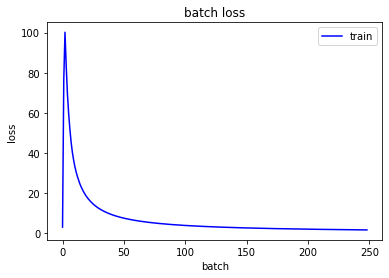

In [83]:
#list_logs, 28
x = np.arange(0,249)
y = list_logs

plt.plot(x,y,'b',label='train')
plt.xlabel('batch')
plt.ylabel('loss')
plt.title('batch loss')
plt.legend(loc='upper right')
plt.show()

plt.show()
#print(len(list_logs))
#print(len(x))

# 모델 훈련

In [520]:
Images_numpy = np.array(Images)
len(Images_numpy)
Labels_numpy = np.array(Labels)
print(Labels_numpy)
trained = model.fit(Images_numpy,Labels_numpy,epochs=35,validation_split=0.30)

[0 1 2 ... 2 0 0]
Epoch 1/35
88/88 [==============================] - 153s 2s/step - loss: 0.1467 - sparse_categorical_accuracy: 0.9796 - val_loss: 0.0651 - val_sparse_categorical_accuracy: 0.9842
Epoch 2/35
88/88 [==============================] - 166s 2s/step - loss: 0.0942 - sparse_categorical_accuracy: 0.9845 - val_loss: 0.1162 - val_sparse_categorical_accuracy: 0.9808
Epoch 3/35
88/88 [==============================] - 159s 2s/step - loss: 0.0984 - sparse_categorical_accuracy: 0.9916 - val_loss: 0.2613 - val_sparse_categorical_accuracy: 0.9717
Epoch 4/35
88/88 [==============================] - 160s 2s/step - loss: 0.0371 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.5328 - val_sparse_categorical_accuracy: 0.9125
Epoch 5/35
88/88 [==============================] - 159s 2s/step - loss: 0.0898 - sparse_categorical_accuracy: 0.9850 - val_loss: 0.4156 - val_sparse_categorical_accuracy: 0.9725
Epoch 6/35
88/88 [==============================] - 160s 2s/step - loss: 0.0305 - spars

In [84]:
print(trained.history['val_sparse_categorical_accuracy'])

[0.9683864712715149]


# accuracy 출력(epoch=3)

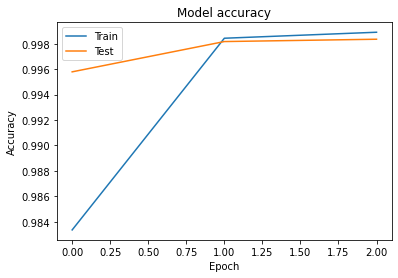

In [79]:
plot.plot(trained.history['sparse_categorical_accuracy'])
plot.plot(trained.history['val_sparse_categorical_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

# loss 출력(epoch=3)

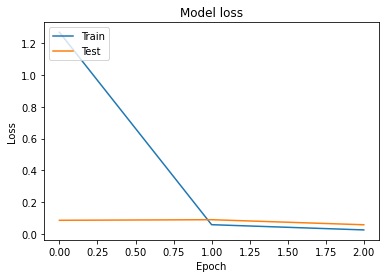

In [80]:
plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

# test image, label 데이터 배열에 저장

In [91]:
Images_test, Labels_test = get_images('./archive/images/')

append label!
./archive/images/8338.jpg
(80, 60, 3)
8338.jpg
1
./archive/images/14534.jpg
(80, 60, 3)
14534.jpg
2
./archive/images/15839.jpg
(80, 60, 3)
15839.jpg
3
./archive/images/20790.jpg
(80, 60, 3)
20790.jpg
4
./archive/images/21923.jpg
(80, 60, 3)
21923.jpg
5
./archive/images/35894.jpg
(80, 60, 3)
35894.jpg
6
./archive/images/11925.jpg
(80, 60, 3)
11925.jpg
7
./archive/images/34579.jpg
(80, 60, 3)
34579.jpg
8
./archive/images/21407.jpg
(80, 60, 3)
21407.jpg
9
./archive/images/25962.jpg
(80, 60, 3)
25962.jpg
10
./archive/images/44493.jpg
(80, 60, 3)
44493.jpg
11
./archive/images/3745.jpg
(80, 60, 3)
3745.jpg
12
./archive/images/59887.jpg
(80, 60, 3)
59887.jpg
13
./archive/images/29258.jpg
(80, 60, 3)
29258.jpg
14
./archive/images/3660.jpg
(80, 60, 3)
3660.jpg
15
./archive/images/5011.jpg
(80, 60, 3)
5011.jpg
16
./archive/images/28517.jpg
(80, 60, 3)
28517.jpg
17
./archive/images/13045.jpg
(80, 60, 3)
13045.jpg
18
./archive/images/13928.jpg
(80, 60, 3)
13928.jpg
19
./archive/image

(80, 60, 3)
12533.jpg
185
./archive/images/57013.jpg
(80, 60, 3)
57013.jpg
186
./archive/images/47589.jpg
(80, 60, 3)
47589.jpg
187
./archive/images/22475.jpg
(80, 60, 3)
22475.jpg
188
./archive/images/49509.jpg
(80, 60, 3)
49509.jpg
189
./archive/images/39718.jpg
(80, 60, 3)
39718.jpg
190
./archive/images/36440.jpg
(80, 60, 3)
36440.jpg
191
./archive/images/24702.jpg
(80, 60, 3)
24702.jpg
192
./archive/images/3426.jpg
(80, 60, 3)
3426.jpg
193
./archive/images/24384.jpg
(80, 60, 3)
24384.jpg
194
./archive/images/22275.jpg
(80, 60, 3)
22275.jpg
195
./archive/images/4257.jpg
(80, 60, 3)
4257.jpg
196
./archive/images/2403.jpg
(80, 60, 3)
2403.jpg
197
./archive/images/22132.jpg
(80, 60, 3)
22132.jpg
198
./archive/images/8996.jpg
(80, 60, 3)
8996.jpg
199
./archive/images/31789.jpg
(80, 60, 3)
31789.jpg
200
./archive/images/4904.jpg
(80, 60, 3)
4904.jpg
201
./archive/images/16445.jpg
(80, 60, 3)
16445.jpg
202
./archive/images/56933.jpg
(80, 60, 3)
56933.jpg
203
./archive/images/33287.jpg
(80

./archive/images/6764.jpg
(80, 60, 3)
6764.jpg
354
./archive/images/16470.jpg
(80, 60, 3)
16470.jpg
355
./archive/images/3840.jpg
(80, 60, 3)
3840.jpg
356
./archive/images/44779.jpg
(80, 60, 3)
44779.jpg
357
./archive/images/19820.jpg
(80, 60, 3)
19820.jpg
358
./archive/images/27584.jpg
(80, 60, 3)
27584.jpg
359
./archive/images/4530.jpg
(80, 60, 3)
4530.jpg
360
./archive/images/31363.jpg
(80, 60, 3)
31363.jpg
361
./archive/images/22863.jpg
(80, 60, 3)
22863.jpg
362
./archive/images/4024.jpg
(80, 60, 3)
4024.jpg
363
./archive/images/16635.jpg
(80, 60, 3)
16635.jpg
364
./archive/images/54109.jpg
(80, 60, 3)
54109.jpg
365
./archive/images/18726.jpg
(80, 60, 3)
18726.jpg
366
./archive/images/15617.jpg
(80, 60, 3)
15617.jpg
367
./archive/images/17184.jpg
(80, 60, 3)
17184.jpg
368
./archive/images/38794.jpg
(80, 60, 3)
38794.jpg
369
./archive/images/37608.jpg
(80, 60, 3)
37608.jpg
370
./archive/images/12074.jpg
(80, 60, 3)
12074.jpg
371
./archive/images/40396.jpg
(80, 60, 3)
40396.jpg
372
.

./archive/images/56898.jpg
(80, 60, 3)
56898.jpg
522
./archive/images/40096.jpg
(80, 60, 3)
40096.jpg
523
./archive/images/39251.jpg
(80, 60, 3)
39251.jpg
524
./archive/images/44855.jpg
(80, 60, 3)
44855.jpg
525
./archive/images/34750.jpg
(80, 60, 3)
34750.jpg
526
./archive/images/4858.jpg
(80, 60, 3)
4858.jpg
527
./archive/images/3518.jpg
(80, 60, 3)
3518.jpg
528
./archive/images/15355.jpg
(80, 60, 3)
15355.jpg
529
./archive/images/40162.jpg
(80, 60, 3)
40162.jpg
530
./archive/images/8743.jpg
(80, 60, 3)
8743.jpg
531
./archive/images/6897.jpg
(80, 60, 3)
6897.jpg
532
./archive/images/15907.jpg
(80, 60, 3)
15907.jpg
533
./archive/images/19846.jpg
(80, 60, 3)
19846.jpg
534
./archive/images/42017.jpg
(80, 60, 3)
42017.jpg
535
./archive/images/4079.jpg
(80, 60, 3)
4079.jpg
536
./archive/images/28554.jpg
(80, 60, 3)
28554.jpg
537
./archive/images/42220.jpg
(80, 60, 3)
42220.jpg
538
./archive/images/19810.jpg
(80, 60, 3)
19810.jpg
539
./archive/images/13553.jpg
(80, 60, 3)
13553.jpg
540
./a

./archive/images/54937.jpg
(80, 60, 3)
54937.jpg
684
./archive/images/7377.jpg
(80, 60, 3)
7377.jpg
685
./archive/images/27034.jpg
(80, 60, 3)
27034.jpg
686
./archive/images/22483.jpg
(80, 60, 3)
22483.jpg
687
./archive/images/24133.jpg
(80, 60, 3)
24133.jpg
688
./archive/images/22320.jpg
(80, 60, 3)
22320.jpg
689
./archive/images/4549.jpg
(80, 60, 3)
4549.jpg
690
./archive/images/22468.jpg
(80, 60, 3)
22468.jpg
691
./archive/images/11689.jpg
(80, 60, 3)
11689.jpg
692
./archive/images/23894.jpg
(80, 60, 3)
23894.jpg
693
./archive/images/36495.jpg
(80, 60, 3)
36495.jpg
694
./archive/images/2341.jpg
(80, 60, 3)
2341.jpg
695
./archive/images/7814.jpg
(80, 60, 3)
7814.jpg
696
./archive/images/29261.jpg
(80, 60, 3)
29261.jpg
697
./archive/images/39834.jpg
(80, 60, 3)
39834.jpg
698
./archive/images/42198.jpg
(80, 60, 3)
42198.jpg
699
./archive/images/25461.jpg
(80, 60, 3)
25461.jpg
700
./archive/images/13435.jpg
(80, 60, 3)
13435.jpg
701
./archive/images/31792.jpg
(80, 60, 3)
31792.jpg
702
.

(80, 60, 3)
33523.jpg
871
./archive/images/4427.jpg
(80, 60, 3)
4427.jpg
872
./archive/images/11949.jpg
(80, 60, 3)
11949.jpg
873
./archive/images/33522.jpg
(80, 60, 3)
33522.jpg
874
./archive/images/54575.jpg
(80, 60, 3)
54575.jpg
875
./archive/images/19324.jpg
(80, 60, 3)
19324.jpg
876
./archive/images/9269.jpg
(80, 60, 3)
9269.jpg
877
./archive/images/18602.jpg
(80, 60, 3)
18602.jpg
878
./archive/images/22569.jpg
(80, 60, 3)
22569.jpg
879
./archive/images/50341.jpg
(80, 60, 3)
50341.jpg
880
./archive/images/18225.jpg
(80, 60, 3)
18225.jpg
881
./archive/images/4242.jpg
(80, 60, 3)
4242.jpg
882
./archive/images/8829.jpg
(80, 60, 3)
8829.jpg
883
./archive/images/17841.jpg
(80, 60, 3)
17841.jpg
884
./archive/images/56960.jpg
(80, 60, 3)
56960.jpg
885
./archive/images/27444.jpg
(80, 60, 3)
27444.jpg
886
./archive/images/12383.jpg
(80, 60, 3)
12383.jpg
887
./archive/images/45831.jpg
(80, 60, 3)
45831.jpg
888
./archive/images/5929.jpg
(80, 60, 3)
5929.jpg
889
./archive/images/5125.jpg
(80,

./archive/images/23057.jpg
(80, 60, 3)
23057.jpg
1035
./archive/images/20782.jpg
(80, 60, 3)
20782.jpg
1036
./archive/images/7008.jpg
(80, 60, 3)
7008.jpg
1037
./archive/images/36314.jpg
(80, 60, 3)
36314.jpg
1038
./archive/images/38546.jpg
(80, 60, 3)
38546.jpg
1039
./archive/images/35892.jpg
(80, 60, 3)
35892.jpg
1040
./archive/images/48411.jpg
(80, 60, 3)
48411.jpg
1041
./archive/images/27173.jpg
(80, 60, 3)
27173.jpg
1042
./archive/images/40945.jpg
(80, 60, 3)
40945.jpg
1043
./archive/images/7439.jpg
(80, 60, 3)
7439.jpg
1044
./archive/images/17022.jpg
(80, 60, 3)
17022.jpg
1045
./archive/images/5239.jpg
(80, 60, 3)
5239.jpg
1046
./archive/images/13770.jpg
(80, 60, 3)
13770.jpg
1047
./archive/images/27587.jpg
(80, 60, 3)
27587.jpg
1048
./archive/images/35378.jpg
(80, 60, 3)
35378.jpg
1049
./archive/images/3566.jpg
(80, 60, 3)
3566.jpg
1050
./archive/images/4501.jpg
(80, 60, 3)
4501.jpg
1051
./archive/images/42109.jpg
(80, 60, 3)
42109.jpg
1052
./archive/images/31038.jpg
(80, 60, 3)

./archive/images/6308.jpg
(80, 60, 3)
6308.jpg
1203
./archive/images/37812.jpg
(80, 60, 3)
37812.jpg
1204
./archive/images/9862.jpg
(80, 60, 3)
9862.jpg
1205
./archive/images/7746.jpg
(80, 60, 3)
7746.jpg
1206
./archive/images/30112.jpg
(80, 60, 3)
30112.jpg
1207
./archive/images/9540.jpg
(80, 60, 3)
9540.jpg
1208
./archive/images/2046.jpg
(80, 60, 3)
2046.jpg
1209
./archive/images/12903.jpg
(80, 60, 3)
12903.jpg
1210
./archive/images/23200.jpg
(80, 60, 3)
23200.jpg
1211
./archive/images/43001.jpg
(80, 60, 3)
43001.jpg
1212
./archive/images/36837.jpg
(80, 60, 3)
36837.jpg
1213
./archive/images/20814.jpg
(80, 60, 3)
20814.jpg
1214
./archive/images/6356.jpg
(80, 60, 3)
6356.jpg
1215
./archive/images/33052.jpg
(80, 60, 3)
33052.jpg
1216
./archive/images/7294.jpg
(80, 60, 3)
7294.jpg
1217
./archive/images/57942.jpg
(80, 60, 3)
57942.jpg
1218
./archive/images/37215.jpg
(80, 60, 3)
37215.jpg
1219
./archive/images/16031.jpg
(80, 60, 3)
16031.jpg
1220
./archive/images/5380.jpg
(80, 60, 3)
5380

(80, 60, 3)
26366.jpg
1393
./archive/images/15064.jpg
(80, 60, 3)
15064.jpg
1394
./archive/images/46096.jpg
(80, 60, 3)
46096.jpg
1395
./archive/images/22267.jpg
(80, 60, 3)
22267.jpg
1396
./archive/images/8830.jpg
(80, 60, 3)
8830.jpg
1397
./archive/images/44801.jpg
(80, 60, 3)
44801.jpg
1398
./archive/images/3221.jpg
(80, 60, 3)
3221.jpg
1399
./archive/images/3296.jpg
(80, 60, 3)
3296.jpg
1400
./archive/images/32188.jpg
(80, 60, 3)
32188.jpg
1401
./archive/images/38392.jpg
(80, 60, 3)
38392.jpg
1402
./archive/images/5578.jpg
(80, 60, 3)
5578.jpg
1403
./archive/images/20114.jpg
(80, 60, 3)
20114.jpg
1404
./archive/images/14585.jpg
(80, 60, 3)
14585.jpg
1405
./archive/images/12658.jpg
(80, 60, 3)
12658.jpg
1406
./archive/images/53140.jpg
(80, 60, 3)
53140.jpg
1407
./archive/images/12085.jpg
(80, 60, 3)
12085.jpg
1408
./archive/images/2642.jpg
(80, 60, 3)
2642.jpg
1409
./archive/images/13992.jpg
(80, 60, 3)
13992.jpg
1410
./archive/images/17516.jpg
(80, 60, 3)
17516.jpg
1411
./archive/i

./archive/images/18963.jpg
(80, 60, 3)
18963.jpg
1571
./archive/images/13107.jpg
(80, 60, 3)
13107.jpg
1572
./archive/images/26068.jpg
(80, 60, 3)
26068.jpg
1573
./archive/images/46256.jpg
(80, 60, 3)
46256.jpg
1574
./archive/images/32740.jpg
(80, 60, 3)
32740.jpg
1575
./archive/images/12039.jpg
(80, 60, 3)
12039.jpg
1576
./archive/images/30107.jpg
(80, 60, 3)
30107.jpg
1577
./archive/images/11436.jpg
(80, 60, 3)
11436.jpg
1578
./archive/images/48248.jpg
(80, 60, 3)
48248.jpg
1579
./archive/images/19664.jpg
(80, 60, 3)
19664.jpg
1580
./archive/images/34042.jpg
(80, 60, 3)
34042.jpg
1581
./archive/images/26418.jpg
(80, 60, 3)
26418.jpg
1582
./archive/images/35882.jpg
(80, 60, 3)
35882.jpg
1583
./archive/images/36146.jpg
(80, 60, 3)
36146.jpg
1584
./archive/images/3635.jpg
(80, 60, 3)
3635.jpg
1585
./archive/images/48435.jpg
(80, 60, 3)
48435.jpg
1586
./archive/images/20676.jpg
(80, 60, 3)
20676.jpg
1587
./archive/images/9868.jpg
(80, 60, 3)
9868.jpg
1588
./archive/images/11731.jpg
(80, 

./archive/images/1879.jpg
(80, 60, 3)
1879.jpg
1737
./archive/images/24577.jpg
(80, 60, 3)
24577.jpg
1738
./archive/images/17262.jpg
(80, 60, 3)
17262.jpg
1739
./archive/images/10621.jpg
(80, 60, 3)
10621.jpg
1740
./archive/images/13317.jpg
(80, 60, 3)
13317.jpg
1741
./archive/images/23926.jpg
(80, 60, 3)
23926.jpg
1742
./archive/images/8802.jpg
(80, 60, 3)
8802.jpg
1743
./archive/images/59824.jpg
(80, 60, 3)
59824.jpg
1744
./archive/images/10370.jpg
(80, 60, 3)
10370.jpg
1745
./archive/images/40410.jpg
(80, 60, 3)
40410.jpg
1746
./archive/images/28561.jpg
(80, 60, 3)
28561.jpg
1747
./archive/images/49381.jpg
(80, 60, 3)
49381.jpg
1748
./archive/images/6630.jpg
(80, 60, 3)
6630.jpg
1749
./archive/images/4330.jpg
(80, 60, 3)
4330.jpg
1750
./archive/images/1951.jpg
(80, 60, 3)
1951.jpg
1751
./archive/images/17758.jpg
(80, 60, 3)
17758.jpg
1752
./archive/images/43875.jpg
(80, 60, 3)
43875.jpg
1753
./archive/images/3522.jpg
(80, 60, 3)
3522.jpg
1754
./archive/images/31952.jpg
(80, 60, 3)
3

./archive/images/39904.jpg
(80, 60, 3)
39904.jpg
1920
./archive/images/26598.jpg
(80, 60, 3)
26598.jpg
1921
./archive/images/43937.jpg
(80, 60, 3)
43937.jpg
1922
./archive/images/24335.jpg
(80, 60, 3)
24335.jpg
1923
./archive/images/12259.jpg
(80, 60, 3)
12259.jpg
1924
./archive/images/42400.jpg
(80, 60, 3)
42400.jpg
1925
./archive/images/15056.jpg
(80, 60, 3)
15056.jpg
1926
./archive/images/28928.jpg
(80, 60, 3)
28928.jpg
1927
./archive/images/14038.jpg
(80, 60, 3)
14038.jpg
1928
./archive/images/7293.jpg
(80, 60, 3)
7293.jpg
1929
./archive/images/5928.jpg
(80, 60, 3)
5928.jpg
1930
./archive/images/4075.jpg
(80, 60, 3)
4075.jpg
1931
./archive/images/39604.jpg
(80, 60, 3)
39604.jpg
1932
./archive/images/11418.jpg
(80, 60, 3)
11418.jpg
1933
./archive/images/1886.jpg
(80, 60, 3)
1886.jpg
1934
./archive/images/8973.jpg
(80, 60, 3)
8973.jpg
1935
./archive/images/11583.jpg
(80, 60, 3)
11583.jpg
1936
./archive/images/13327.jpg
(80, 60, 3)
13327.jpg
1937
./archive/images/5972.jpg
(80, 60, 3)


./archive/images/37717.jpg
(80, 60, 3)
37717.jpg
2099
./archive/images/22354.jpg
(80, 60, 3)
22354.jpg
2100
./archive/images/57439.jpg
(80, 60, 3)
57439.jpg
2101
./archive/images/12279.jpg
(80, 60, 3)
12279.jpg
2102
./archive/images/28941.jpg
(80, 60, 3)
28941.jpg
2103
./archive/images/2150.jpg
(80, 60, 3)
2150.jpg
2104
./archive/images/11384.jpg
(80, 60, 3)
11384.jpg
2105
./archive/images/4884.jpg
(80, 60, 3)
4884.jpg
2106
./archive/images/4140.jpg
(80, 60, 3)
4140.jpg
2107
./archive/images/2577.jpg
(80, 60, 3)
2577.jpg
2108
./archive/images/7600.jpg
(80, 60, 3)
7600.jpg
2109
./archive/images/7287.jpg
(80, 60, 3)
7287.jpg
2110
./archive/images/40416.jpg
(80, 60, 3)
40416.jpg
2111
./archive/images/20252.jpg
(80, 60, 3)
20252.jpg
2112
./archive/images/19645.jpg
(80, 60, 3)
19645.jpg
2113
./archive/images/38722.jpg
(80, 60, 3)
38722.jpg
2114
./archive/images/41968.jpg
(80, 60, 3)
41968.jpg
2115
./archive/images/3015.jpg
(80, 60, 3)
3015.jpg
2116
./archive/images/16190.jpg
(80, 60, 3)
161

./archive/images/4739.jpg
(80, 60, 3)
4739.jpg
2277
./archive/images/36164.jpg
(80, 60, 3)
36164.jpg
2278
./archive/images/31656.jpg
(80, 60, 3)
31656.jpg
2279
./archive/images/8446.jpg
(80, 60, 3)
8446.jpg
2280
./archive/images/25488.jpg
(80, 60, 3)
25488.jpg
2281
./archive/images/12595.jpg
(80, 60, 3)
12595.jpg
2282
./archive/images/57285.jpg
(80, 60, 3)
57285.jpg
2283
./archive/images/7942.jpg
(80, 60, 3)
7942.jpg
2284
./archive/images/5295.jpg
(80, 60, 3)
5295.jpg
2285
./archive/images/36562.jpg
(80, 60, 3)
36562.jpg
2286
./archive/images/8161.jpg
(80, 60, 3)
8161.jpg
2287
./archive/images/12272.jpg
(80, 60, 3)
12272.jpg
2288
./archive/images/5774.jpg
(80, 60, 3)
5774.jpg
2289
./archive/images/2189.jpg
(80, 60, 3)
2189.jpg
2290
./archive/images/5829.jpg
(80, 60, 3)
5829.jpg
2291
./archive/images/5790.jpg
(80, 60, 3)
5790.jpg
2292
./archive/images/11805.jpg
(80, 60, 3)
11805.jpg
2293
./archive/images/33181.jpg
(80, 60, 3)
33181.jpg
2294
./archive/images/8506.jpg
(80, 60, 3)
8506.jpg

./archive/images/11990.jpg
(80, 60, 3)
11990.jpg
2454
./archive/images/32959.jpg
(80, 60, 3)
32959.jpg
2455
./archive/images/18745.jpg
(80, 60, 3)
18745.jpg
2456
./archive/images/10064.jpg
(80, 60, 3)
10064.jpg
2457
./archive/images/2128.jpg
(80, 60, 3)
2128.jpg
2458
./archive/images/3236.jpg
(80, 60, 3)
3236.jpg
2459
./archive/images/48081.jpg
(80, 60, 3)
48081.jpg
2460
./archive/images/38947.jpg
(80, 60, 3)
38947.jpg
2461
./archive/images/37720.jpg
(80, 60, 3)
37720.jpg
2462
./archive/images/7571.jpg
(80, 60, 3)
7571.jpg
2463
./archive/images/12853.jpg
(80, 60, 3)
12853.jpg
2464
./archive/images/8270.jpg
(80, 60, 3)
8270.jpg
2465
./archive/images/22500.jpg
(80, 60, 3)
22500.jpg
2466
./archive/images/7046.jpg
(80, 60, 3)
7046.jpg
2467
./archive/images/3614.jpg
(80, 60, 3)
3614.jpg
2468
./archive/images/57132.jpg
(80, 60, 3)
57132.jpg
2469
./archive/images/19335.jpg
(80, 60, 3)
19335.jpg
2470
./archive/images/39783.jpg
(80, 60, 3)
39783.jpg
2471
./archive/images/10853.jpg
(80, 60, 3)
1

./archive/images/5138.jpg
(80, 60, 3)
5138.jpg
2619
./archive/images/15639.jpg
(80, 60, 3)
15639.jpg
2620
./archive/images/44777.jpg
(80, 60, 3)
44777.jpg
2621
./archive/images/22375.jpg
(80, 60, 3)
22375.jpg
2622
./archive/images/37278.jpg
(80, 60, 3)
37278.jpg
2623
./archive/images/23204.jpg
(80, 60, 3)
23204.jpg
2624
./archive/images/25836.jpg
(80, 60, 3)
25836.jpg
2625
./archive/images/54550.jpg
(80, 60, 3)
54550.jpg
2626
./archive/images/38639.jpg
(80, 60, 3)
38639.jpg
2627
./archive/images/8727.jpg
(80, 60, 3)
8727.jpg
2628
./archive/images/12695.jpg
(80, 60, 3)
12695.jpg
2629
./archive/images/22119.jpg
(80, 60, 3)
22119.jpg
2630
./archive/images/24413.jpg
(80, 60, 3)
24413.jpg
2631
./archive/images/12239.jpg
(80, 60, 3)
12239.jpg
2632
./archive/images/14563.jpg
(80, 60, 3)
14563.jpg
2633
./archive/images/7353.jpg
(80, 60, 3)
7353.jpg
2634
./archive/images/10112.jpg
(80, 60, 3)
10112.jpg
2635
./archive/images/28613.jpg
(80, 60, 3)
28613.jpg
2636
./archive/images/32963.jpg
(80, 60

./archive/images/16430.jpg
(80, 60, 3)
16430.jpg
2808
./archive/images/17963.jpg
(80, 60, 3)
17963.jpg
2809
./archive/images/12421.jpg
(80, 60, 3)
12421.jpg
2810
./archive/images/7677.jpg
(80, 60, 3)
7677.jpg
2811
./archive/images/6420.jpg
(80, 60, 3)
6420.jpg
2812
./archive/images/32746.jpg
(80, 60, 3)
32746.jpg
2813
./archive/images/13068.jpg
(80, 60, 3)
13068.jpg
2814
./archive/images/26388.jpg
(80, 60, 3)
26388.jpg
2815
./archive/images/13086.jpg
(80, 60, 3)
13086.jpg
2816
./archive/images/13157.jpg
(80, 60, 3)
13157.jpg
2817
./archive/images/29657.jpg
(80, 60, 3)
29657.jpg
2818
./archive/images/7717.jpg
(80, 60, 3)
7717.jpg
2819
./archive/images/39605.jpg
(80, 60, 3)
39605.jpg
2820
./archive/images/4503.jpg
(80, 60, 3)
4503.jpg
2821
./archive/images/18613.jpg
(80, 60, 3)
18613.jpg
2822
./archive/images/10096.jpg
(80, 60, 3)
10096.jpg
2823
./archive/images/41991.jpg
(80, 60, 3)
41991.jpg
2824
./archive/images/32198.jpg
(80, 60, 3)
32198.jpg
2825
./archive/images/4552.jpg
(80, 60, 3

./archive/images/15054.jpg
(80, 60, 3)
15054.jpg
2988
./archive/images/53137.jpg
(80, 60, 3)
53137.jpg
2989
./archive/images/10374.jpg
(80, 60, 3)
10374.jpg
2990
./archive/images/6496.jpg
(80, 60, 3)
6496.jpg
2991
./archive/images/32855.jpg
(80, 60, 3)
32855.jpg
2992
./archive/images/7141.jpg
(80, 60, 3)
7141.jpg
2993
./archive/images/39463.jpg
(80, 60, 3)
39463.jpg
2994
./archive/images/48103.jpg
(80, 60, 3)
48103.jpg
2995
./archive/images/31319.jpg
(80, 60, 3)
31319.jpg
2996
./archive/images/40266.jpg
(80, 60, 3)
40266.jpg
2997
./archive/images/26046.jpg
(80, 60, 3)
26046.jpg
2998
./archive/images/12318.jpg
(80, 60, 3)
12318.jpg
2999
./archive/images/19678.jpg
(80, 60, 3)
19678.jpg
3000
./archive/images/56638.jpg
(80, 60, 3)
56638.jpg
3001
./archive/images/54582.jpg
(80, 60, 3)
54582.jpg
3002
./archive/images/29339.jpg
(80, 60, 3)
29339.jpg
3003
./archive/images/6593.jpg
(80, 60, 3)
6593.jpg
3004
./archive/images/22911.jpg
(80, 60, 3)
22911.jpg
3005
./archive/images/23054.jpg
(80, 60

./archive/images/13436.jpg
(80, 60, 3)
13436.jpg
3186
./archive/images/2604.jpg
(80, 60, 3)
2604.jpg
3187
./archive/images/32490.jpg
(80, 60, 3)
32490.jpg
3188
./archive/images/37962.jpg
(80, 60, 3)
37962.jpg
3189
./archive/images/24985.jpg
(80, 60, 3)
24985.jpg
3190
./archive/images/18275.jpg
(80, 60, 3)
18275.jpg
3191
./archive/images/42989.jpg
(80, 60, 3)
42989.jpg
3192
./archive/images/39455.jpg
(80, 60, 3)
39455.jpg
3193
./archive/images/33687.jpg
(80, 60, 3)
33687.jpg
3194
./archive/images/12078.jpg
(80, 60, 3)
12078.jpg
3195
./archive/images/26551.jpg
(80, 60, 3)
26551.jpg
3196
./archive/images/52151.jpg
(80, 60, 3)
52151.jpg
3197
./archive/images/24567.jpg
(80, 60, 3)
24567.jpg
3198
./archive/images/33350.jpg
(80, 60, 3)
33350.jpg
3199
./archive/images/25786.jpg
(80, 60, 3)
25786.jpg
3200
./archive/images/19630.jpg
(80, 60, 3)
19630.jpg
3201
./archive/images/3536.jpg
(80, 60, 3)
3536.jpg
3202
./archive/images/10172.jpg
(80, 60, 3)
10172.jpg
3203
./archive/images/19332.jpg
(80, 

27866.jpg
3365
./archive/images/16541.jpg
(80, 60, 3)
16541.jpg
3366
./archive/images/32943.jpg
(80, 60, 3)
32943.jpg
3367
./archive/images/20282.jpg
(80, 60, 3)
20282.jpg
3368
./archive/images/46822.jpg
(80, 60, 3)
46822.jpg
3369
./archive/images/19560.jpg
(80, 60, 3)
19560.jpg
3370
./archive/images/16650.jpg
(80, 60, 3)
16650.jpg
3371
./archive/images/16912.jpg
(80, 60, 3)
16912.jpg
3372
./archive/images/53130.jpg
(80, 60, 3)
53130.jpg
3373
./archive/images/7151.jpg
(80, 60, 3)
7151.jpg
3374
./archive/images/2134.jpg
(80, 60, 3)
2134.jpg
3375
./archive/images/2865.jpg
(80, 60, 3)
2865.jpg
3376
./archive/images/12177.jpg
(80, 60, 3)
12177.jpg
3377
./archive/images/45426.jpg
(80, 60, 3)
45426.jpg
3378
./archive/images/56911.jpg
(80, 60, 3)
56911.jpg
3379
./archive/images/5188.jpg
(80, 60, 3)
5188.jpg
3380
./archive/images/9856.jpg
(80, 60, 3)
9856.jpg
3381
./archive/images/34041.jpg
(80, 60, 3)
34041.jpg
3382
./archive/images/15342.jpg
(80, 60, 3)
15342.jpg
3383
./archive/images/9551.j

./archive/images/9831.jpg
(80, 60, 3)
9831.jpg
3536
./archive/images/35809.jpg
(80, 60, 3)
35809.jpg
3537
./archive/images/13069.jpg
(80, 60, 3)
13069.jpg
3538
./archive/images/40631.jpg
(80, 60, 3)
40631.jpg
3539
./archive/images/27290.jpg
(80, 60, 3)
27290.jpg
3540
./archive/images/19675.jpg
(80, 60, 3)
19675.jpg
3541
./archive/images/33303.jpg
(80, 60, 3)
33303.jpg
3542
./archive/images/12153.jpg
(80, 60, 3)
12153.jpg
3543
./archive/images/34853.jpg
(80, 60, 3)
34853.jpg
3544
./archive/images/22137.jpg
(80, 60, 3)
22137.jpg
3545
./archive/images/33491.jpg
(80, 60, 3)
33491.jpg
3546
./archive/images/57120.jpg
(80, 60, 3)
57120.jpg
3547
./archive/images/7227.jpg
(80, 60, 3)
7227.jpg
3548
./archive/images/36502.jpg
(80, 60, 3)
36502.jpg
3549
./archive/images/8152.jpg
(80, 60, 3)
8152.jpg
3550
./archive/images/26906.jpg
(80, 60, 3)
26906.jpg
3551
./archive/images/2344.jpg
(80, 60, 3)
2344.jpg
3552
./archive/images/15486.jpg
(80, 60, 3)
15486.jpg
3553
./archive/images/18406.jpg
(80, 60, 

./archive/images/55644.jpg
(80, 60, 3)
55644.jpg
3702
./archive/images/4800.jpg
(80, 60, 3)
4800.jpg
3703
./archive/images/28950.jpg
(80, 60, 3)
28950.jpg
3704
./archive/images/27888.jpg
(80, 60, 3)
27888.jpg
3705
./archive/images/23060.jpg
(80, 60, 3)
23060.jpg
3706
./archive/images/35707.jpg
(80, 60, 3)
35707.jpg
3707
./archive/images/7053.jpg
(80, 60, 3)
7053.jpg
3708
./archive/images/55641.jpg
(80, 60, 3)
55641.jpg
3709
./archive/images/40264.jpg
(80, 60, 3)
40264.jpg
3710
./archive/images/41821.jpg
(80, 60, 3)
41821.jpg
3711
./archive/images/24020.jpg
(80, 60, 3)
24020.jpg
3712
./archive/images/35998.jpg
(80, 60, 3)
35998.jpg
3713
./archive/images/19980.jpg
(80, 60, 3)
19980.jpg
3714
./archive/images/37766.jpg
(80, 60, 3)
37766.jpg
3715
./archive/images/4574.jpg
(80, 60, 3)
4574.jpg
3716
./archive/images/52095.jpg
(80, 60, 3)
52095.jpg
3717
./archive/images/2122.jpg
(80, 60, 3)
2122.jpg
3718
./archive/images/3759.jpg
(80, 60, 3)
3759.jpg
3719
./archive/images/7168.jpg
(80, 60, 3)


./archive/images/6948.jpg
(80, 60, 3)
6948.jpg
3879
./archive/images/30300.jpg
(80, 60, 3)
30300.jpg
3880
./archive/images/30310.jpg
(80, 60, 3)
30310.jpg
3881
./archive/images/29250.jpg
(80, 60, 3)
29250.jpg
3882
./archive/images/13033.jpg
(80, 60, 3)
13033.jpg
3883
./archive/images/20151.jpg
(80, 60, 3)
20151.jpg
3884
./archive/images/8862.jpg
(80, 60, 3)
8862.jpg
3885
./archive/images/13404.jpg
(80, 60, 3)
13404.jpg
3886
./archive/images/25702.jpg
(80, 60, 3)
25702.jpg
3887
./archive/images/42686.jpg
(80, 60, 3)
42686.jpg
3888
./archive/images/55621.jpg
(80, 60, 3)
55621.jpg
3889
./archive/images/9871.jpg
(80, 60, 3)
9871.jpg
3890
./archive/images/13190.jpg
(80, 60, 3)
13190.jpg
3891
./archive/images/4233.jpg
(80, 60, 3)
4233.jpg
3892
./archive/images/5287.jpg
(80, 60, 3)
5287.jpg
3893
./archive/images/55599.jpg
(80, 60, 3)
55599.jpg
3894
./archive/images/30886.jpg
(80, 60, 3)
30886.jpg
3895
./archive/images/52044.jpg
(80, 60, 3)
52044.jpg
3896
./archive/images/6534.jpg
(80, 60, 3)


./archive/images/14457.jpg
(80, 60, 3)
14457.jpg
4042
./archive/images/45811.jpg
(80, 60, 3)
45811.jpg
4043
./archive/images/36722.jpg
(80, 60, 3)
36722.jpg
4044
./archive/images/24285.jpg
(80, 60, 3)
24285.jpg
4045
./archive/images/23798.jpg
(80, 60, 3)
23798.jpg
4046
./archive/images/15307.jpg
(80, 60, 3)
15307.jpg
4047
./archive/images/21397.jpg
(80, 60, 3)
21397.jpg
4048
./archive/images/14112.jpg
(80, 60, 3)
14112.jpg
4049
./archive/images/6264.jpg
(80, 60, 3)
6264.jpg
4050
./archive/images/39864.jpg
(80, 60, 3)
39864.jpg
4051
./archive/images/11563.jpg
(80, 60, 3)
11563.jpg
4052
./archive/images/34173.jpg
(80, 60, 3)
34173.jpg
4053
./archive/images/28872.jpg
(80, 60, 3)
28872.jpg
4054
./archive/images/54140.jpg
(80, 60, 3)
54140.jpg
4055
./archive/images/11649.jpg
(80, 60, 3)
11649.jpg
4056
./archive/images/5847.jpg
(80, 60, 3)
5847.jpg
4057
./archive/images/8085.jpg
(80, 60, 3)
8085.jpg
4058
./archive/images/28848.jpg
(80, 60, 3)
28848.jpg
4059
./archive/images/6257.jpg
(80, 60,

./archive/images/37566.jpg
(80, 60, 3)
37566.jpg
4242
./archive/images/52108.jpg
(80, 60, 3)
52108.jpg
4243
./archive/images/18980.jpg
(80, 60, 3)
18980.jpg
4244
./archive/images/29099.jpg
(80, 60, 3)
29099.jpg
4245
./archive/images/20348.jpg
(80, 60, 3)
20348.jpg
4246
./archive/images/51405.jpg
(80, 60, 3)
51405.jpg
4247
./archive/images/45379.jpg
(80, 60, 3)
45379.jpg
4248
./archive/images/32384.jpg
(80, 60, 3)
32384.jpg
4249
./archive/images/31541.jpg
(80, 60, 3)
31541.jpg
4250
./archive/images/37967.jpg
(80, 60, 3)
37967.jpg
4251
./archive/images/33041.jpg
(80, 60, 3)
33041.jpg
4252
./archive/images/7243.jpg
(80, 60, 3)
7243.jpg
4253
./archive/images/7505.jpg
(80, 60, 3)
7505.jpg
4254
./archive/images/57282.jpg
(80, 60, 3)
57282.jpg
4255
./archive/images/5406.jpg
(80, 60, 3)
5406.jpg
4256
./archive/images/11809.jpg
(80, 60, 3)
11809.jpg
4257
./archive/images/11619.jpg
(80, 60, 3)
11619.jpg
4258
./archive/images/24370.jpg
(80, 60, 3)
24370.jpg
4259
./archive/images/5108.jpg
(80, 60,

./archive/images/12176.jpg
(80, 60, 3)
12176.jpg
4434
./archive/images/17685.jpg
(80, 60, 3)
17685.jpg
4435
./archive/images/47019.jpg
(80, 60, 3)
47019.jpg
4436
./archive/images/10631.jpg
(80, 60, 3)
10631.jpg
4437
./archive/images/43944.jpg
(80, 60, 3)
43944.jpg
4438
./archive/images/26042.jpg
(80, 60, 3)
26042.jpg
4439
./archive/images/34159.jpg
(80, 60, 3)
34159.jpg
4440
./archive/images/2693.jpg
(80, 60, 3)
2693.jpg
4441
./archive/images/53118.jpg
(80, 60, 3)
53118.jpg
4442
./archive/images/42520.jpg
(80, 60, 3)
42520.jpg
4443
./archive/images/30121.jpg
(80, 60, 3)
30121.jpg
4444
./archive/images/19534.jpg
(80, 60, 3)
19534.jpg
4445
./archive/images/36219.jpg
(80, 60, 3)
36219.jpg
4446
./archive/images/33161.jpg
(80, 60, 3)
33161.jpg
4447
./archive/images/23929.jpg
(80, 60, 3)
23929.jpg
4448
./archive/images/54566.jpg
(80, 60, 3)
54566.jpg
4449
./archive/images/18888.jpg
(80, 60, 3)
18888.jpg
4450
./archive/images/22163.jpg
(80, 60, 3)
22163.jpg
4451
./archive/images/7470.jpg
(80,

# teat image, label numpy로 변환, 결과 측정

In [92]:
test_images = np.array(Images_test)
test_labels = np.array(Labels_test)
model.evaluate(test_images,test_labels, verbose=1)

143/143 [==============================] - 164s 1s/step - loss: 0.0267 - sparse_categorical_accuracy: 0.9989


[0.026710957288742065, 0.998900830745697]

In [93]:
pred_images = test_images
pred_images.shape

(4549, 80, 60, 3)

# 분류한 test image 시각화

C:\Users\seung\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
<ipython-input-94-5554831a6e8c>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


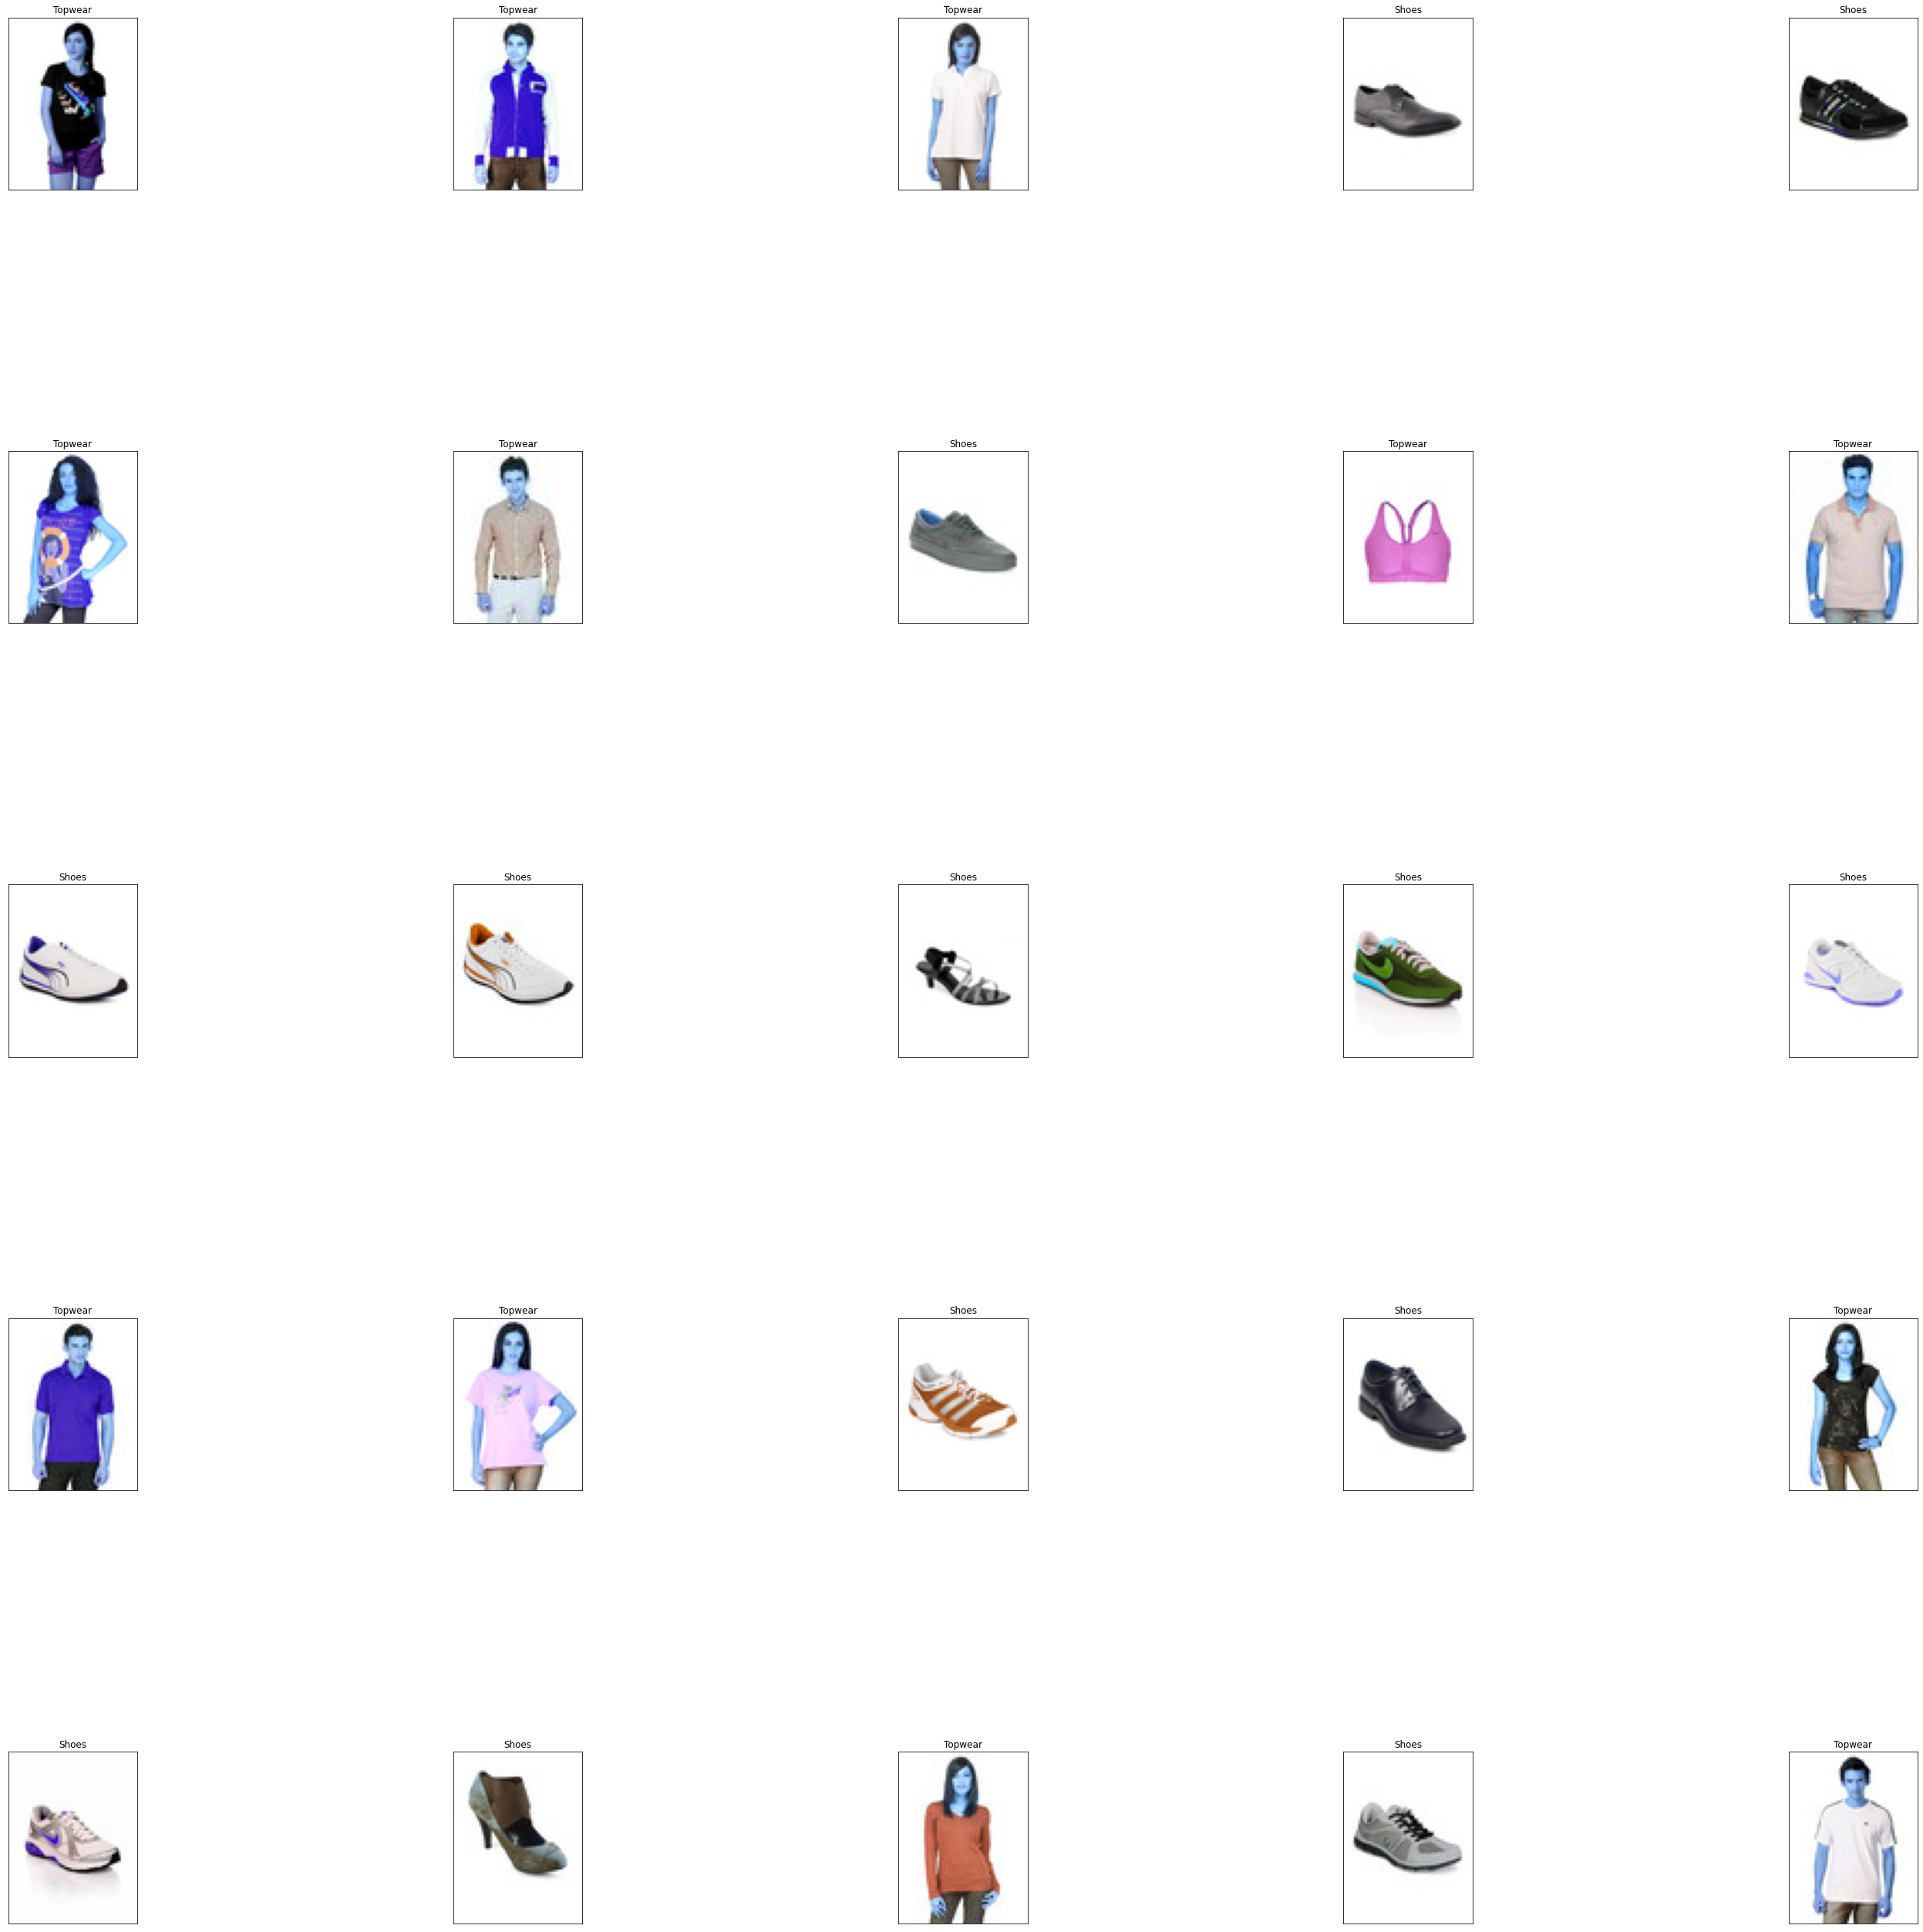

In [94]:
import matplotlib.gridspec as gridspec
from random import randint

fig = plot.figure(figsize=(50,50))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_class = get_classlabel(model.predict_classes(pred_image)[0])
    pred_prob = model.predict(pred_image).reshape(3)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
fig.show()
    